# Final Project - Stage 1
## Exploratory Data Analysis - Data Set E-Commerce Shipping
## Group 8 : Decentraland
**Group Member:**
- Dharma Setiawan
- Ilham Ibnu A.
- M. Farhan Atmawinanda
- Fikri Diva S.
- Ahmad Ilham H.

### Import Libraries

In [1]:
#Data and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import kendalltau
import plotly.express as px

## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Import Data set

Link dataset = https://www.kaggle.com/prachi13/customer-analytics

**Penjelasan variabel-variabel pada dataset**

**1. ID**: ID Number of Customers.

**2. Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

**3. Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.

**4. Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.

**5. Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

**6. Cost of the product**: Cost of the Product in US Dollars.

**7. Prior purchases**: The Number of Prior Purchase.

**8. Product importance**: The company has categorized the product in the various parameter such as low, medium, high.

**9. Gender**: Male and Female.

**10. Discount offered**: Discount offered on that specific product.

**11. Weight in gms**: It is the weight in grams.

**12. Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [ ]:
url_dataset = "https://raw.githubusercontent.com/Decentraland-Team-Final-Project/Report-Final-Project-/main/Dataset/E-Commerce%20Shipping%20Data.csv"
df_shipping = pd.read_csv(url_dataset)
df_shipping.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

# Descriptive Statistics

## Informasi general variabel-variabel pada data frame

In [ ]:
#Info semua variabel secara general
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
#Cek missing value
df_shipping.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
#Cek data double
df_shipping.duplicated().sum()

0

- Data terdiri dari 10.999 sampel (baris).
- Tidak ada null value di semua kolom.
- Tidak ada baris yang terduplikasi.
- Terdapat 10 fitur (variabel independen) dan 1 targeted variable (variabel dependen).
- Berdasarkan jenisnya, fitur terdiri dari 4 fitur kategorik (`Warehouse_block`, `Mode_of_Shipment`, `Product_importance`, dan `Gender`) dan 6 fitur numerik (`Customer_care_calls`, `Customer_rating`, `Cost_of_the_Product`, `Prior_purchases`, `Discount_offered`, dan `Weight_in_gms`).
- Satu target variabel yaitu `Reached.on.Time_Y.N` yang bertipe numerik.

## Statistical Summary

In [ ]:
#Rename variabel lama (agar rapih dan seragam)
df_shipping = df_shipping.rename(columns = { 'Warehouse_block' : 'Warehouse',
                                             'Mode_of_Shipment' : 'Shipment',
                                             'Customer_care_calls' : 'Calls',
                                             'Customer_rating' : 'Rating',
                                             'Cost_of_the_Product' : 'Cost',
                                             'Prior_purchases' : 'Purchases',
                                             'Product_importance' : 'Importance',
                                             'Discount_offered' : 'Discount',
                                            'Weight_in_gms': 'Weight (gram)',
                                            'Reached.on.Time_Y.N': 'Late'})

In [ ]:
#Pengelompokkan variabel kategorik
df_shipping_cat = df_shipping[['Warehouse', 'Shipment', 'Importance', 'Gender']]
df_shipping_cat.head()

Warehouse Shipment Importance Gender
0         D   Flight        low      F
1         F   Flight        low      M
2         A   Flight        low      M
3         B   Flight     medium      M
4         C   Flight     medium      F

In [ ]:
#Pengelompokkan variabel numerik
df_shipping_num = df_shipping[['Calls', 'Rating', 'Cost', 'Purchases', 'Discount', 'Weight (gram)']]
df_shipping_num.head()

Calls  Rating  Cost  Purchases  Discount  Weight (gram)
0      4       2   177          3        44           1233
1      4       5   216          2        59           3088
2      2       2   183          4        48           3374
3      3       3   176          4        10           1177
4      2       2   184          3        46           2484

### Variabel Kategorik

In [ ]:
#Rangkuman statistik variabel kategorik 
df_shipping_cat.describe()

Warehouse Shipment Importance Gender
count      10999    10999      10999  10999
unique         5        3          3      2
top            F     Ship        low      F
freq        3666     7462       5297   5545

- Semua variabel memiliki kardinalitas (jumlah unique values) yang rendah, sudah bagus.
- `Warehouse_block` yang paling banyak digunakan adalah gudang F (lebih dari 30%).
- Pengiriman barang didominasi moda pengiriman melalui kapal (lebih dari 65%).
- Sampel didominasi oleh kategori `Product_importance` jenis "low".
- Pada data frame ini, sampel wanita sedikit lebih banyak daripada sampel pria. Kendati demikian, perbandingannya hampir berimbang, mendekati 50%-50%.

### Variabel Numerik

In [ ]:
#Rangkuman statistik variabel numerik 
df_shipping_num.describe()

Calls        Rating          Cost     Purchases      Discount  \
count  10999.000000  10999.000000  10999.000000  10999.000000  10999.000000   
mean       4.054459      2.990545    210.196836      3.567597     13.373216   
std        1.141490      1.413603     48.063272      1.522860     16.205527   
min        2.000000      1.000000     96.000000      2.000000      1.000000   
25%        3.000000      2.000000    169.000000      3.000000      4.000000   
50%        4.000000      3.000000    214.000000      3.000000      7.000000   
75%        5.000000      4.000000    251.000000      4.000000     10.000000   
max        7.000000      5.000000    310.000000     10.000000     65.000000   

       Weight (gram)  
count   10999.000000  
mean     3634.016729  
std      1635.377251  
min      1001.000000  
25%      1839.500000  
50%      4149.000000  
75%      5050.000000  
max      7846.000000

- Variabel `Customer_care_calls` dan `Cost_of_the_Product` sudah cukup simetrik distribusinya mendekati distribusi normal (mean dan median tidak berbeda jauh).
- Variabel `Discount_offered` pola persebarannya membentuk positively skewed (mean>median), sedangkan variabel `Weight_in_gms` membentuk negatively skewed (median>mean).
- Dilihat dari nilai min, max, median, dan mean, variabel `Prior_purchases` dan `Discount_offered` tampaknya memiliki nilai outlier di titik max.
- Disini terlihat bahwa variabel `Customer_rating` bisa juga dikategorikan sebagai variabel kategorikal, 1-5 merupakan kategori rating. Untuk analisis statistik deskriptif, lebih pas untuk melihat variabel `Customer_rating` ini sebagai variabel kategorik.

In [ ]:
#Melihat perbandingan data pada variabel `Customer_rating`
df_shipping.groupby(['Rating']).agg({'ID' : ['count']})

ID
       count
Rating      
1       2235
2       2165
3       2239
4       2189
5       2171

- Setiap tingkat rating memiliki jumlah data yang hampir sama, distribusi berimbang.

### Target Variable

In [ ]:
#Rangkuman statistik targeted variabel (`Reached.on.Time_Y.N`)
df_shipping['Late'].describe()

count    10999.000000
mean         0.596691
std          0.490584
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Late, dtype: float64

- Variabel ini adalah variabel boolean/binary bertipe integer, bisa juga dijadikan variabel kategorikal, 1 adalah pengantaran barang terlambat dan 0 adalah pengantaran barang tepat waktu. Untuk analisis statistik deskriptif, lebih pas untuk melihat variabel `Reached.on.Time_Y.N` ini sebagai variabel kategorik.

In [ ]:
#Melihat perbandingan data pada variabel `Reached.on.Time_Y.N`
df_shipping.groupby(['Late']).agg({'ID' : ['count']})

ID
     count
Late      
0     4436
1     6563

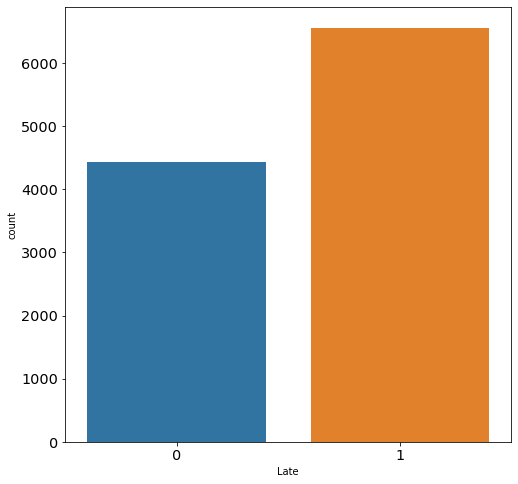

In [ ]:
# Countplot target variable visualization
plt.figure(figsize=(8, 8))
sns.countplot(x=df_shipping['Late'], data=df_shipping)

- Sampel sedikit tidak berimbang, hampir 60% data sampel termasuk ke dalam kategori pengiriman barang yang terlambat.

## Rangkuman Descriptive Statistics
A. Apakah ada kolom dengan tipe data kurang sesuai?
> Variabel `Customer_rating` dan `Reached.on.Time_Y.N` bertipe numerik bisa digunakan untuk analisis multivariat dan korelasi, namun bisa juga dikategorikan sebagai variabel kategorik untuk keperluan analisis statistik deskriptif dan univariat.

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
> Tidak ada kolom yang memiliki nilai null.

C. Apakah ada kolom yang isi nilainya tidak sesuai?
> Semua kolom tampak sudah terisi dengan nilai yang sesuai dengan tipe data.

D. Apakah ada kolom yang memiliki nilai summary agak aneh?
> - Variabel `Discount_offered` pola persebarannya membentuk positively skewed (mean>median), sedangkan variabel `Weight_in_gms` membentuk negatively skewed (median>mean).
> - Dilihat dari nilai min, max, median, dan mean, variabel `Prior_purchases` dan `Discount_offered` tampaknya memiliki nilai outlier di titik max.
> - Sampel sedikit tidak berimbang, hampir 60% data sampel termasuk ke dalam kategori pengiriman barang yang terlambat.

In [ ]:
#Menambah kolom `Customer_rating` dan `Reached.on.Time_Y.N` bertipe kategorikal
df_shipping['Customer_Rating(cat)'] = np.where(df_shipping['Rating']==1, 'Bintang 1',
                                          np.where(df_shipping['Rating']==2, 'Bintang 2',
                                                   np.where(df_shipping['Rating']==3, 'Bintang 3',
                                                            np.where(df_shipping['Rating']==4, 'Bintang 4', 'Bintang 5'))))

In [ ]:
df_shipping['Late_Shipment(cat)'] = np.where(df_shipping['Late']==0, 'No', 'Yes')

In [ ]:
#Tampilan terbaru penamaan variabel
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    10999 non-null  int64 
 1   Warehouse             10999 non-null  object
 2   Shipment              10999 non-null  object
 3   Calls                 10999 non-null  int64 
 4   Rating                10999 non-null  int64 
 5   Cost                  10999 non-null  int64 
 6   Purchases             10999 non-null  int64 
 7   Importance            10999 non-null  object
 8   Gender                10999 non-null  object
 9   Discount              10999 non-null  int64 
 10  Weight (gram)         10999 non-null  int64 
 11  Late                  10999 non-null  int64 
 12  Customer_Rating(cat)  10999 non-null  object
 13  Late_Shipment(cat)    10999 non-null  object
dtypes: int64(8), object(6)
memory usage: 1.2+ MB


In [ ]:
df_shipping.head(5)

ID Warehouse Shipment  Calls  Rating  Cost  Purchases Importance Gender  \
0   1         D   Flight      4       2   177          3        low      F   
1   2         F   Flight      4       5   216          2        low      M   
2   3         A   Flight      2       2   183          4        low      M   
3   4         B   Flight      3       3   176          4     medium      M   
4   5         C   Flight      2       2   184          3     medium      F   

   Discount  Weight (gram)  Late Customer_Rating(cat) Late_Shipment(cat)  
0        44           1233     1            Bintang 2                Yes  
1        59           3088     1            Bintang 5                Yes  
2        48           3374     1            Bintang 2                Yes  
3        10           1177     1            Bintang 3                Yes  
4        46           2484     1            Bintang 2                Yes

| Variable | Type | Definition | Example |
| ----------- | ----------- | ----------- | ----------- |
| ID | Nominal | Customer ID Number | 10, 15, 10995, 10996
| Warehouse | Nominal | Warehouse to Store the Product | A, B, C, D, F
| Shipment | Nominal | Mode of Product Shipping | Flight, Road, Ship
| Calls | Discrete | Number of Calls Made | 2, 5, 6
| Rating | Discrete | Company Rating by Customers | 5: Best - 4: Better - 3: Neutral - 2: Bad - 1: Worst
| Cost | Discrete | Cost of Product in US Dollars | 177, 216, 236, 182
| Purchases | Discrete | Number of Prior Purchase | 3, 2, 6
| Importance | Ordinal | Product Importance Parameter | Low, Medium, High
| Gender | Nominal | Customer Gender | Male, Female
| Discount | Discrete | Product Discount in US Dollars | 65, 10, 16
| Weight (gram) | Continous | Product Weight in grams | 4953, 5676, 2171
| Late | Boolean | Target Variable, 1: NOT reached on time - 0: REACHED on time | 1, 0
| Customer_Rating(cat) | Ordinal | Company Rating by Customers | Bintang 5 - Bintang 4 - Bintang 3 - Bintang 2 - Bintang 1
| Late_Shipment(cat) | Nominal | Target Variable, 1: NOT reached on time - 0: REACHED on time | Yes, No

# Univariate Analysis

In [ ]:
#Pengelompokan kolom berdasarkan jenisnya
number = ['Calls', 'Cost', 'Purchases', 'Discount', 'Weight (gram)']
category = ['Warehouse', 'Shipment', 'Importance', 'Gender', 'Customer_Rating(cat)', 'Late_Shipment(cat)']

## Analisis Boxplot - Distribusi Data pada Variabel-variabel Numerik

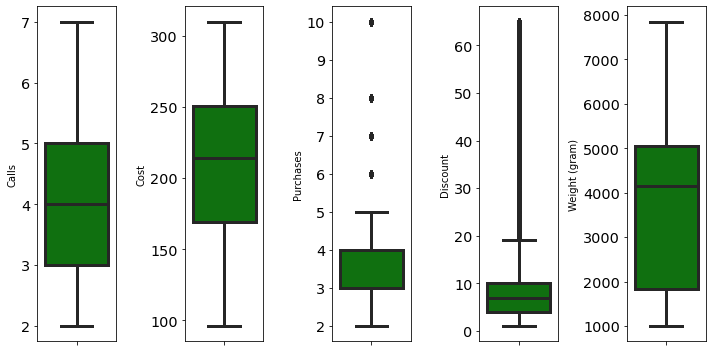

In [ ]:
features = number
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_shipping[features[i]], color='green', orient='v')
  plt.tight_layout()

- Outlier terlihat pada variabel `Prior_Purchases` dan `Discount_Offered`
- Variabel `Prior_Purchases` dan `Discount_Offered` membentuk pola positively skewed.
- Variabel `Weight_in_gms` membentuk pola negatively skewed.
- Variabel `Customer_Care_Calls` dan `Cost_of_The_Product` hampir mendekati distribusi normal walaupun polanya masih sedikit skewed.

## Analisis Distplot - Distribusi Data pada Variabel-variabel Numerik

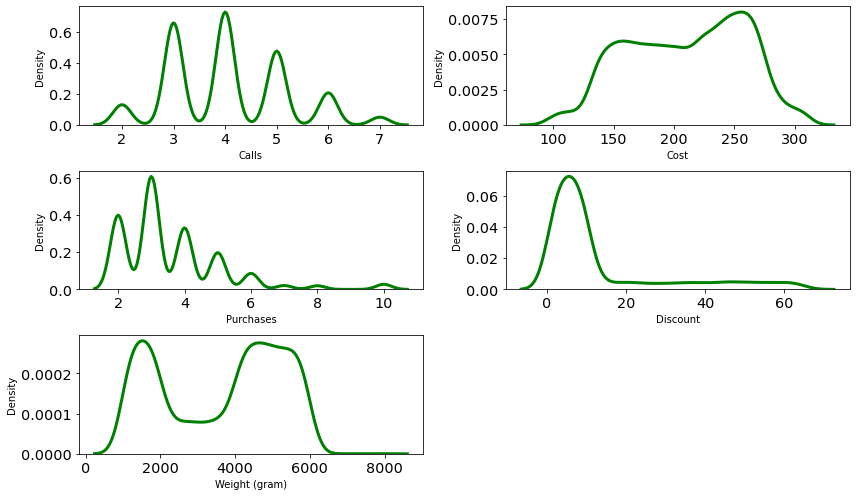

In [ ]:
features = number
plt.figure(figsize=(12, 7))
for i in range(0, len(features)):
  plt.subplot(3, len(features)/2, i+1)
  sns.kdeplot(x=df_shipping[features[i]], color='green')
  plt.xlabel(features[i])
  plt.tight_layout()

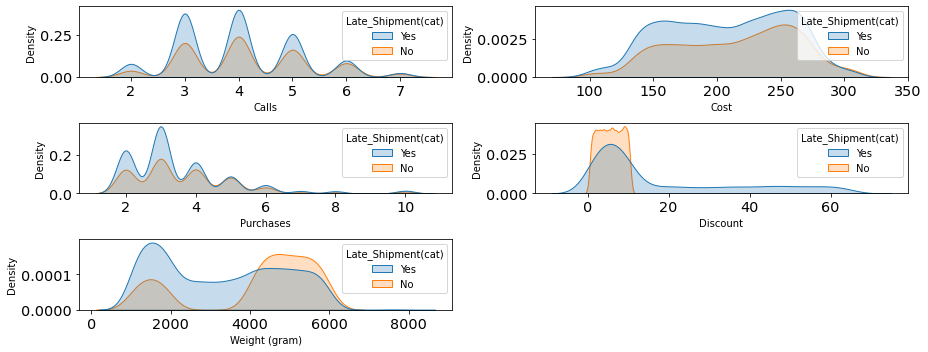

In [ ]:
# KDEplot with Target Hue
numsplot = ['Calls', 'Cost','Purchases', 'Discount', 'Weight (gram)']
plt.figure(figsize=(13, 5))
for i in range(0, len(numsplot)):
    plt.subplot(3, len(numsplot)/2, i+1)
    sns.kdeplot(data=df_shipping, x=df_shipping[numsplot[i]], hue='Late_Shipment(cat)', fill='True')
    plt.tight_layout()

- Sesuai dugaan analisis boxplot, variabel `Prior_Purchases` dan `Discount_Offered` membentuk pola positively skewed. Pada variabel `Prior_Purchases`, polanya naik turun.
- Dari analisis perbandingan mean-median dan boxplot, diduga variabel `Customer_Care_Calls` dan `Cost_of_The_Product` mendekati distribusi normal, ternyata disini polanya terlihat masih naik turun.

## Analisis Violinplot - Distribusi Data pada Variabel-variabel Numerik

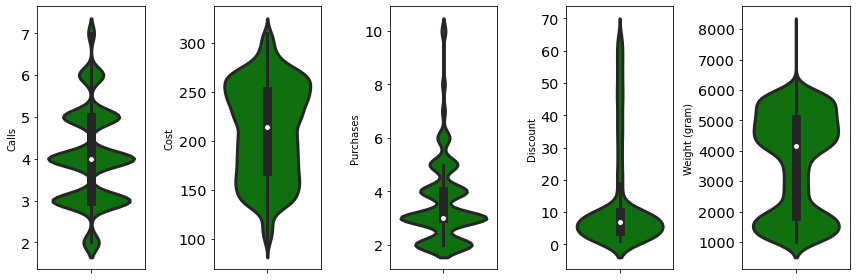

In [ ]:
for i in range(0, len(number)):
    plt.subplot(1, len(number), i+1)
    sns.violinplot(y=df_shipping[number[i]], color='green', orient='v')
    plt.tight_layout()

Kombinasi analisis boxplot dan distplot, disini hasil pengamatan pada dua analisis plot sebelumnya juga dapat terlihat.
- Variabel `Prior_Purchases` dan `Discount_Offered` membentuk pola positively skewed. Pada variabel `Prior_Purchases`, polanya naik turun.
- Variabel `Customer_Care_Calls` dan `Cost_of_The_Product` mengarah ke distribusi normal, kendati demikian polanya terlihat masih naik turun.
- Variabel `Weight_in_gms` mengarah ke pola negatively skewed, kendati demikian polanya terlihat masih naik turun.

## Analisis Countplot - Distribusi Data pada Variabel-variabel Kategorikal

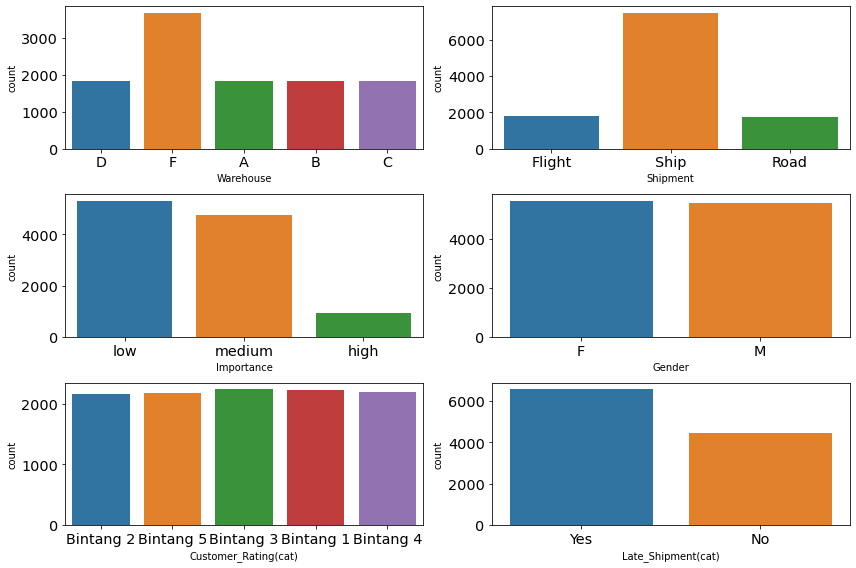

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(0, len(category)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x = df_shipping[category[i]], orient='v')
    plt.tight_layout()

- Semua variabel memiliki kardinalitas (jumlah unique values) yang rendah, sudah bagus.
- `Warehouse_Block` yang paling banyak digunakan adalah gudang F (lebih dari 30%), nilai lainnya jumlahnya hampir merata.
- Pada variabel `Warehouse_Block` tidak ada "Gudang E"?
- Pengiriman barang didominasi moda pengiriman melalui kapal (lebih dari 65%), nilai lainnya jumlahnya hampir merata.
- Sampel didominasi oleh kategori `Product_Importance` jenis "low", diikuti "medium", lalu "high" dengan jumlah yang telampau rendah bila dibandingkan dengan dua nilai lainnnya.
- Pada data frame ini, sampel wanita sedikit lebih banyak daripada sampel pria. Kendati demikian, perbandingannya hampir berimbang, mendekati 50%-50%.
- Persebaran data `Customer_Rating` terdistribusi secara merata.
- Sampel data memiliki lebih banyak transaksi pembelian yang pengirimannya terlambat(late).

# Multivariate Analysis

In [ ]:
#Buat data frame baru dimana variabel `ID` untuk sementara di drop
df_shippingcorr = df_shipping.drop(['ID'], axis=1)

## Correlation Heatmap

In [ ]:
df_shippingcorr.corr()

Calls    Rating      Cost  Purchases  Discount  \
Calls          1.000000  0.012209  0.323182   0.180771 -0.130750   
Rating         0.012209  1.000000  0.009270   0.013179 -0.003124   
Cost           0.323182  0.009270  1.000000   0.123676 -0.138312   
Purchases      0.180771  0.013179  0.123676   1.000000 -0.082769   
Discount      -0.130750 -0.003124 -0.138312  -0.082769  1.000000   
Weight (gram) -0.276615 -0.001897 -0.132604  -0.168213 -0.376067   
Late          -0.067126  0.013119 -0.073587  -0.055515  0.397108   

               Weight (gram)      Late  
Calls              -0.276615 -0.067126  
Rating             -0.001897  0.013119  
Cost               -0.132604 -0.073587  
Purchases          -0.168213 -0.055515  
Discount           -0.376067  0.397108  
Weight (gram)       1.000000 -0.268793  
Late               -0.268793  1.000000

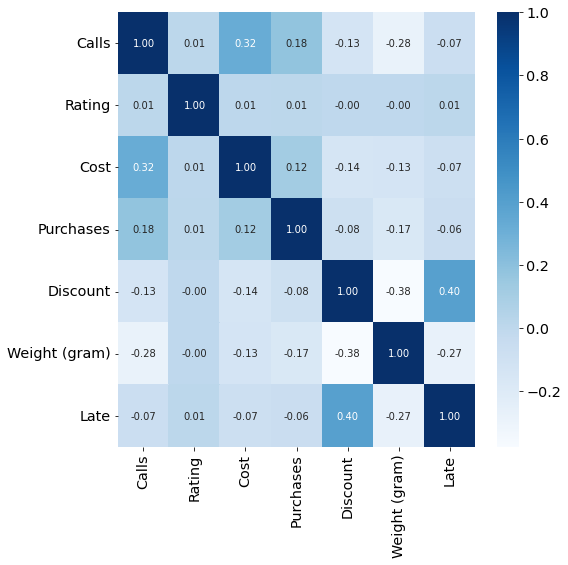

In [ ]:
# correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df_shippingcorr.corr(), cmap='Blues', annot=True, fmt='.2f')

- Variabel `Customer_care_calls`, `Cost_of_The_Product`, `Prior_Purchases`, dan `Weight_in_gms` memiliki korelasi negatif yang lemah terhadap target variabel (`Late_Shipment`).
- Variabel `Discount_Offered` dan `Customer_Rating` memiliki korelasi positif yang lemah terhadap target variabel (`Late_Shipment`).
- Variabel `Weight_in_gms` dan `Discount_offered` memiliki korelasi negatif lemah.
- Variabel `Cost_of_The_Product` dan `Customer_Care_Calls` memiliki korelasi positif lemah.
- Tidak ada features yang redundant karena tidak ada features yang memiliki korelasi > 0.7

## Pair Plot

<Figure size 1080x1080 with 0 Axes>

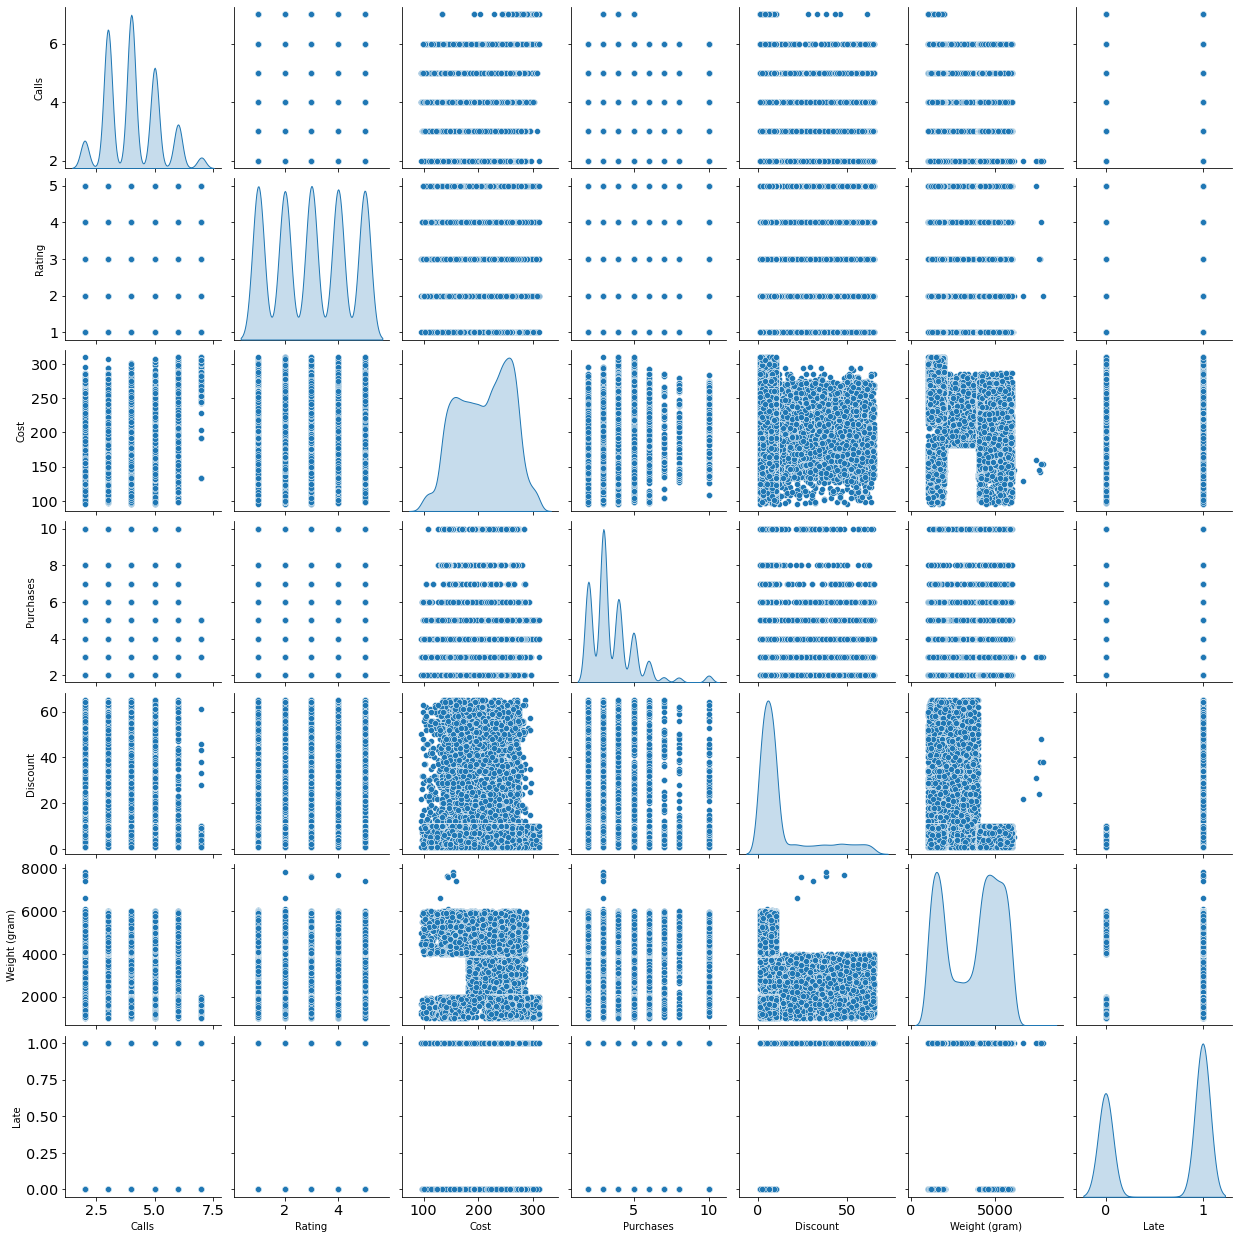

In [ ]:
# Pair Plot
plt.figure(figsize=(15, 15))
sns.pairplot(df_shippingcorr, diag_kind='kde')

<Figure size 1080x1080 with 0 Axes>

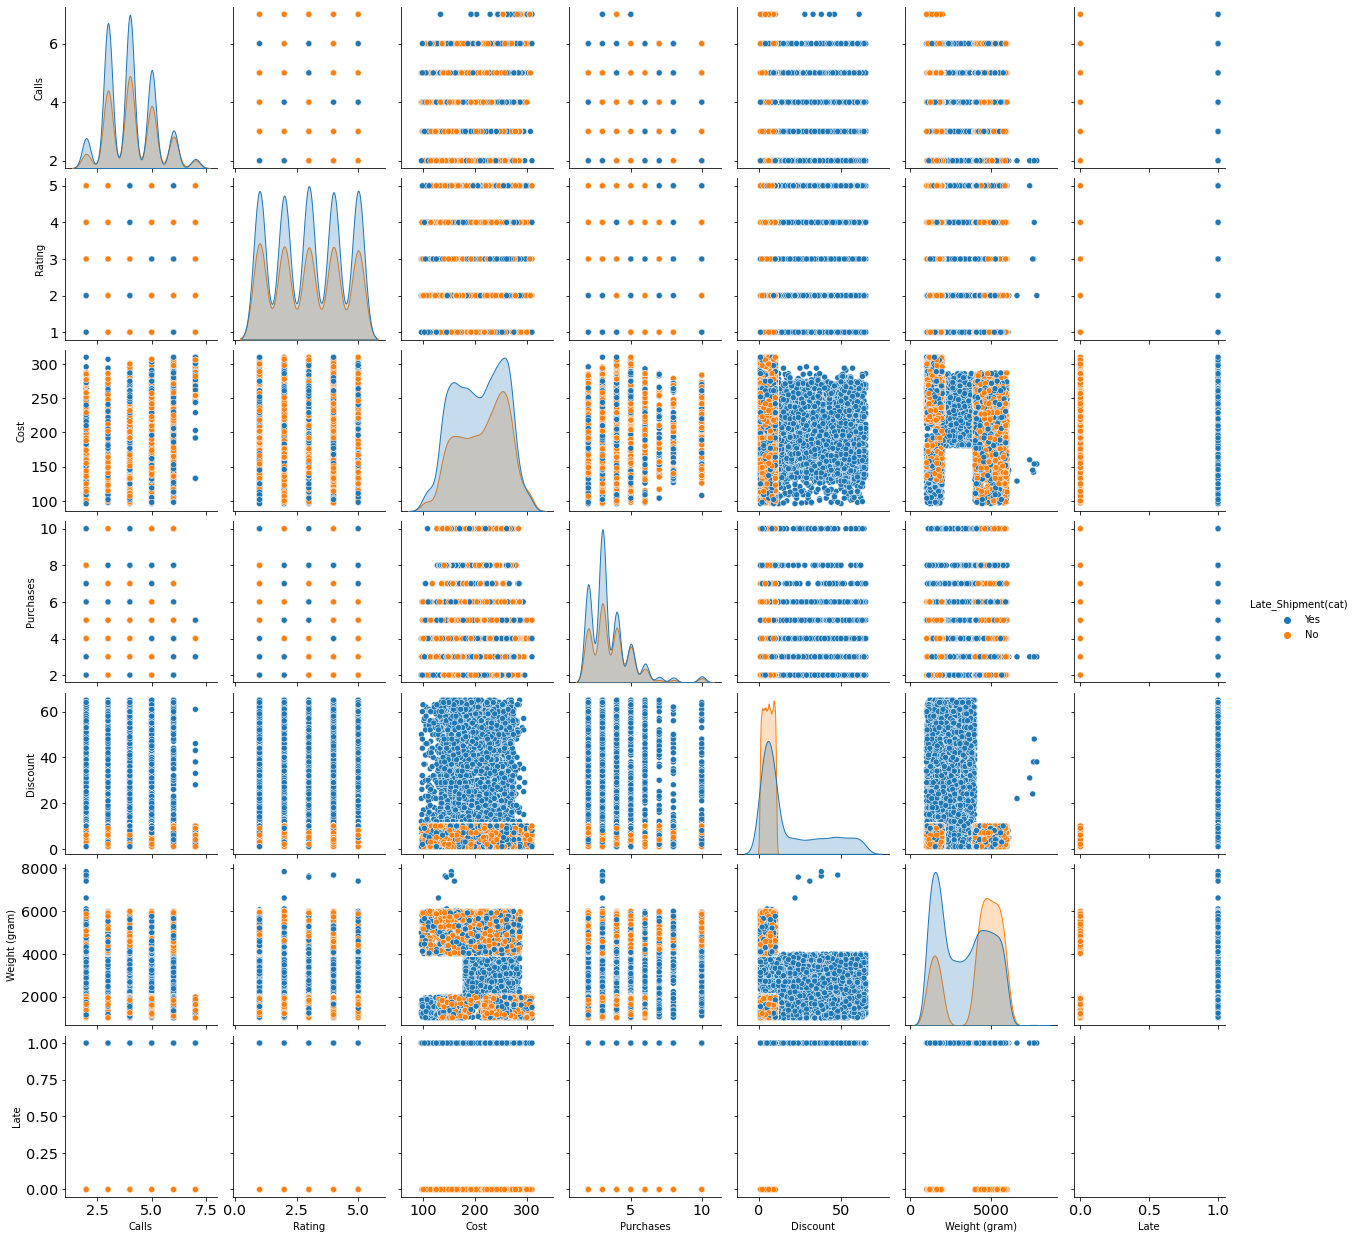

In [ ]:
# di sini kita juga hanya menggunakan sample dari full dataset
plt.figure(figsize=(15, 15))
sns.pairplot(df_shippingcorr, diag_kind='kde', hue='Late_Shipment(cat)')

Dari pair plot di atas, kita juga dapat melilhat hal yang mirip:

Late cenderung lebih tinggi untuk Weight 2-4 kg dan Discount >10%.

## Kendall

In [ ]:
corr = df_shippingcorr.corr(method='kendall')

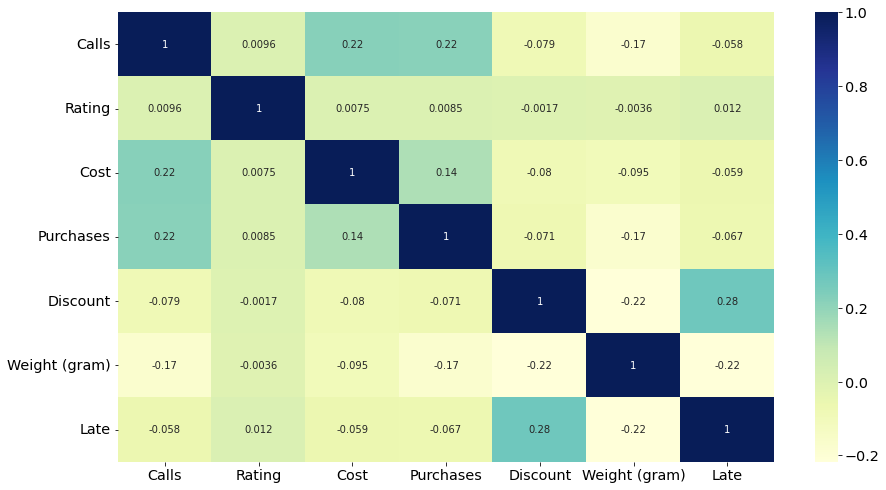

In [ ]:
rcParams['figure.figsize'] = 14.7,8.27
sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

## Variabel Kategorik Vs Target Variable

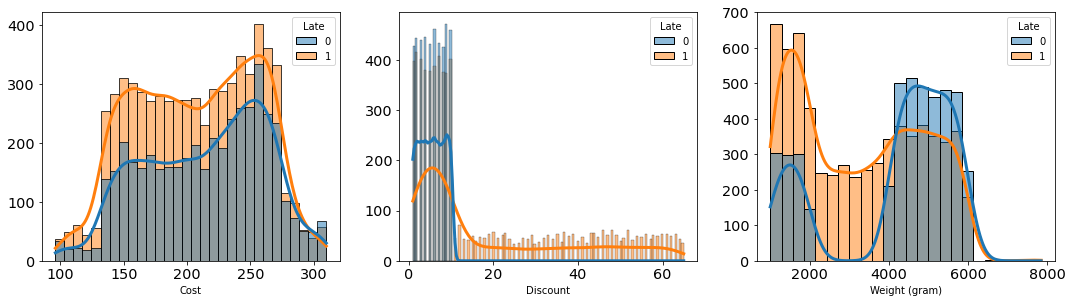

In [ ]:
# Histplot Visualization with Target Hue
flag = ['Cost', 'Discount', 'Weight (gram)']

plt.figure(figsize=(15, 12))
for i in range(0, len(flag)):
    plt.subplot(len(flag), 3, i+1)
    sns.histplot(data=df_shipping, x=df_shipping[flag[i]], hue=df_shipping['Late'], fill=True, kde='True')
    plt.tight_layout()
    plt.ylabel(None)

Pengamatan
* Discount yang lebih dari 10 persen terkonfirmasi terlambat. Hal ini bisa mengindikasikan beberapa bulan dimana promo diberikan besar-besaran sehingga pengiriman.
* Regarding Weight, barang yang berkisar 2-4 kg terkonfirmasi terlambat.
* Cost dari barang tidak mempengaruhi keterlambatan.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


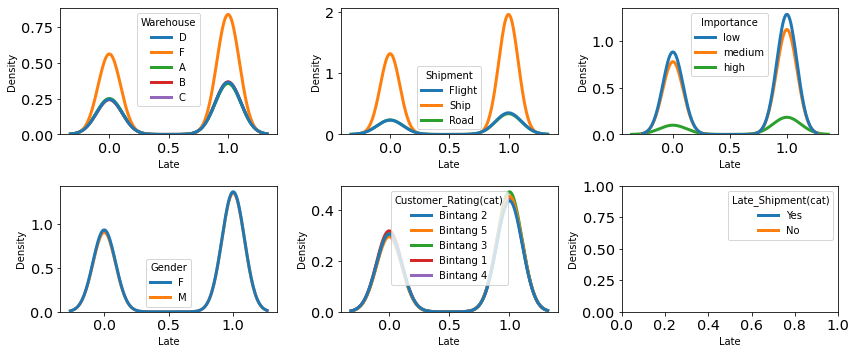

In [ ]:
features = category
plt.figure(figsize=(12, 7))
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1) 
    sns.kdeplot(data=df_shippingcorr, x='Late', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
# Calls Late Percentage
df_calls = df_shipping.groupby(['Calls', 'Late']).agg({'ID' : 'count' }).reset_index()
df_calls.columns = ['Calls', 'Late', 'Count']
df_calls['Total'] = df_calls.groupby(['Calls'])['Count'].transform('sum')
df_calls['Percentage'] = round(df_calls['Count'] / df_calls['Total'] * 100, 2)
df_calls

Calls  Late  Count  Total  Percentage
0       2     0    222    638       34.80
1       2     1    416    638       65.20
2       3     0   1206   3217       37.49
3       3     1   2011   3217       62.51
4       4     0   1431   3557       40.23
5       4     1   2126   3557       59.77
6       5     0    968   2328       41.58
7       5     1   1360   2328       58.42
8       6     0    490   1013       48.37
9       6     1    523   1013       51.63
10      7     0    119    246       48.37
11      7     1    127    246       51.63

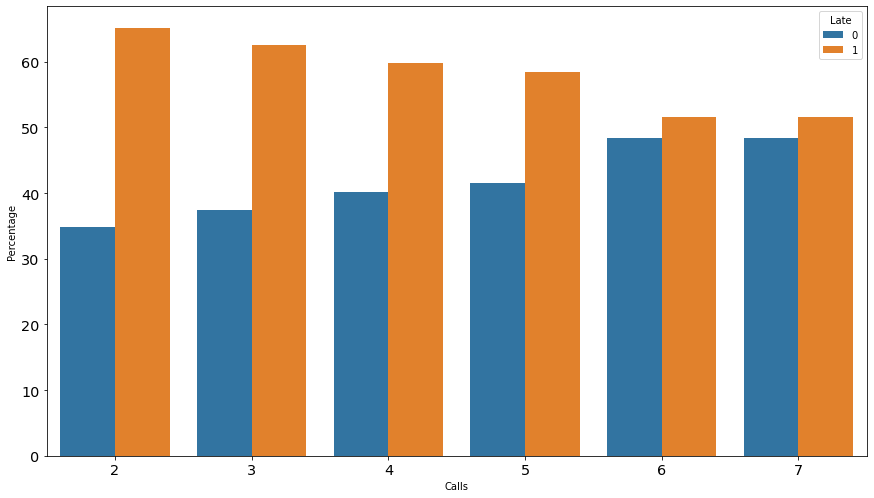

In [ ]:
sns.barplot(x='Calls', y ='Percentage', data = df_calls, hue='Late')

Semakin banyak call yang terjadi maka tingkat keterlambatan menurun.

In [ ]:
# Purchase Late Percentage 
df_purchase = df_shipping.groupby(['Purchases', 'Late']).agg({'ID' : 'count' }).reset_index()
df_purchase.columns = ['Purchase', 'Late', 'Count']
df_purchase['Total'] = df_purchase.groupby(['Purchase'])['Count'].transform('sum')
df_purchase['Percentage'] = round(df_purchase['Count'] / df_purchase['Total'] * 100, 2)
df_purchase

Purchase  Late  Count  Total  Percentage
0          2     0    974   2599       37.48
1          2     1   1625   2599       62.52
2          3     0   1421   3955       35.93
3          3     1   2534   3955       64.07
4          4     0    984   2155       45.66
5          4     1   1171   2155       54.34
6          5     0    645   1287       50.12
7          5     1    642   1287       49.88
8          6     0    247    561       44.03
9          6     1    314    561       55.97
10         7     0     44    136       32.35
11         7     1     92    136       67.65
12         8     0     45    128       35.16
13         8     1     83    128       64.84
14        10     0     76    178       42.70
15        10     1    102    178       57.30

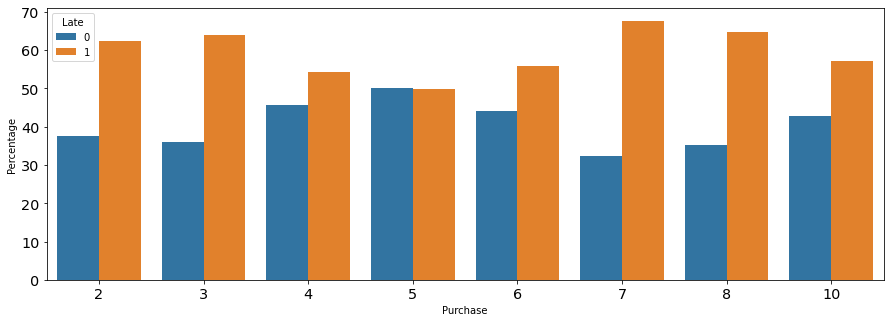

In [ ]:
# Discount Late Frequency
plt.figure(figsize=(15, 5))
sns.barplot(x = 'Purchase', y = 'Percentage', data = df_purchase , hue = 'Late')

- tidak ada kolom yang menarik untuk kategorikal.
- analisis lebih lanjut menggunakan bar plot/hist plot  dan percentage masing-masing data akan coba dilanjutkan di business insight analysis.

# Business Insights

## Discount Offered dengan Variabel Target (Late Shipment)

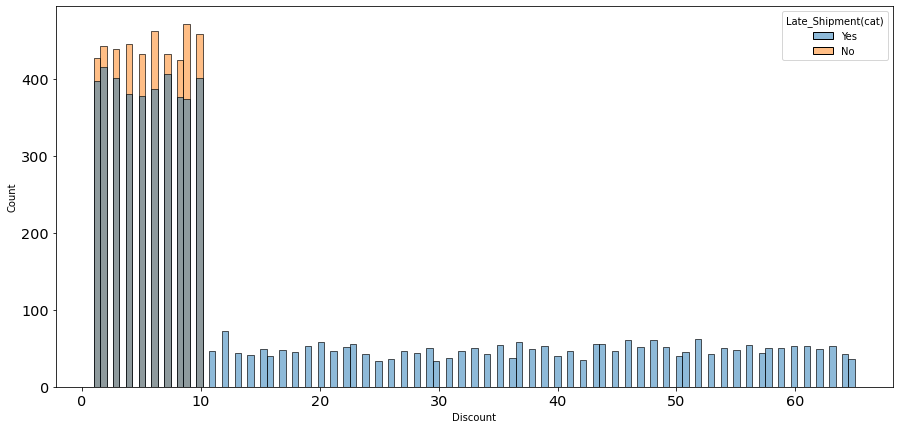

In [ ]:
#Pola persebaran transaksi berdasarkan besaran diskon dan pengiriman telat/tidak
plt.figure(figsize=(15,7))
sns.histplot(data=df_shipping, x='Discount', hue='Late_Shipment(cat)')

- Diskon >10% kecenderungannya pengiriman telat.

In [ ]:
#Pengelompokkan rata-rata Discount Offered pada pengiriman barang telat dan tidak
df_shipping.groupby('Late_Shipment(cat)').agg({'Discount' : [ 'mean']})

Discount
                         mean
Late_Shipment(cat)           
No                   5.545987
Yes                 18.663721

- Secara rata-rata, Discount Offered pada transaksi yang pengiriman barangnya telat lebih tinggi.

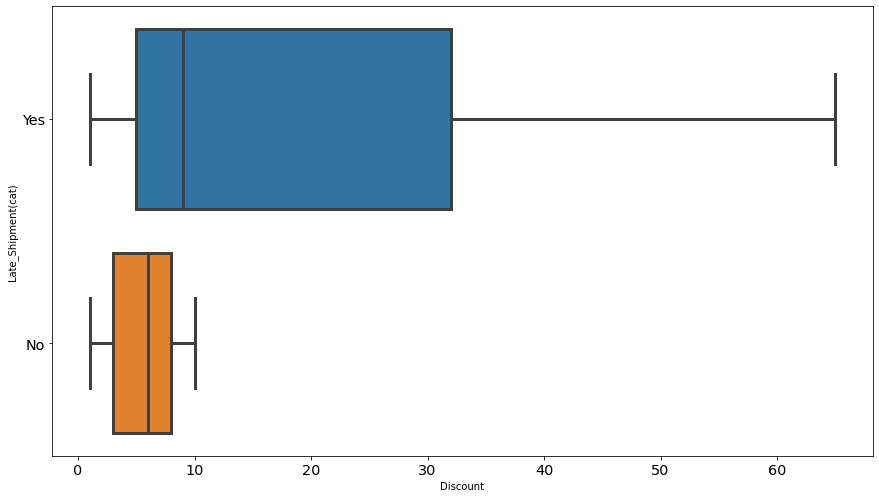

In [ ]:
#Pembuatan grafik menggunakan seaborn
sns.boxplot(x = 'Discount', 
            y = 'Late_Shipment(cat)', 
            data = df_shipping)

- Dari boxplot diatas, kita dapat melihat distribusi data Discount Offered pada pengiriman barang telat lebih besar dibandingkan dengan yang tepat waktu. Nilai q1, q2, q3 kelompok telat lebih besar juga lebih besar.

Transaksi pembelian yang memiliki diskon 10% atau kurang, kecenderungannya adalah barang yang dikirim tepat waktu lebih banyak daripada yang pengirimannya terlambat. Keadaan justru berbalik ketika transaksi memiliki diskon lebih dari 10%, barang justru cenderung terlambat pengirimannya. Hal ini bisa disebabkan karena semakin besar diskon harga mengakibatkan semakin besar pula minat customer untuk berbelanja (contoh: promo diskon hari raya atau promo harbolnas), alhasil muatan barang digudang dan ekspedisi menjadi overloaded dan pengiriman barang menjadi telat. Patut diperhatikan pula gudang penyimpanan barang, tenaga kerja, dan moda pengiriman barang tertentu pastinya mempunyai kapasitas dalam pengiriman barang, ketika pengiriman barang overloaded kemungkinan pengiriman barang bisa terlambat.
> Solusi : Lebih ke masalah teknis operasional pengiriman, diskon yang besar menyebabkan transaksi pembelian overloaded dan berpotensi menyebabkan barang terlambat. Harus dicari tahu teknis operasional (moda pengiriman dan lokasi gudang) apa yang paling berpotensi besar terjadinya pengiriman yang terlambat. 

## Rasio Perbandingan Pengiriman Barang Telat/Tidak di Setiap Variabel Kategorik yang Berkaitan dengan Teknis Operasional

### Rasio Pengiriman Telat/Tidak berdasarkan Lokasi Gudang

In [ ]:
#Data aggregation 1
df_shipping_warehouse1 = df_shipping.groupby(['Warehouse', 'Late_Shipment(cat)']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah Shipping'})
df_shipping_warehouse1

Warehouse Late_Shipment(cat)  Jumlah Shipping
0         A                 No              758
1         A                Yes             1075
2         B                 No              729
3         B                Yes             1104
4         C                 No              739
5         C                Yes             1094
6         D                 No              738
7         D                Yes             1096
8         F                 No             1472
9         F                Yes             2194

In [ ]:
#Data aggregation 2
df_shipping_warehouse2 = df_shipping.groupby(['Warehouse']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah Shipping'})
df_shipping_warehouse2

Warehouse  Jumlah Shipping
0         A             1833
1         B             1833
2         C             1833
3         D             1834
4         F             3666

In [ ]:
#Merge
df_shipping_warehouse = df_shipping_warehouse1.merge(df_shipping_warehouse2,
                              left_on = ['Warehouse'],
                              right_on = ['Warehouse'],
                              how = 'inner'
                              )
df_shipping_warehouse

Warehouse Late_Shipment(cat)  Jumlah Shipping_x  Jumlah Shipping_y
0         A                 No                758               1833
1         A                Yes               1075               1833
2         B                 No                729               1833
3         B                Yes               1104               1833
4         C                 No                739               1833
5         C                Yes               1094               1833
6         D                 No                738               1834
7         D                Yes               1096               1834
8         F                 No               1472               3666
9         F                Yes               2194               3666

In [ ]:
#Buat kolom rasio
df_shipping_warehouse['Ratio'] = np.round(df_shipping_warehouse['Jumlah Shipping_x']*100 / df_shipping_warehouse['Jumlah Shipping_y'], 3)
df_shipping_warehouse

Warehouse Late_Shipment(cat)  Jumlah Shipping_x  Jumlah Shipping_y   Ratio
0         A                 No                758               1833  41.353
1         A                Yes               1075               1833  58.647
2         B                 No                729               1833  39.771
3         B                Yes               1104               1833  60.229
4         C                 No                739               1833  40.316
5         C                Yes               1094               1833  59.684
6         D                 No                738               1834  40.240
7         D                Yes               1096               1834  59.760
8         F                 No               1472               3666  40.153
9         F                Yes               2194               3666  59.847

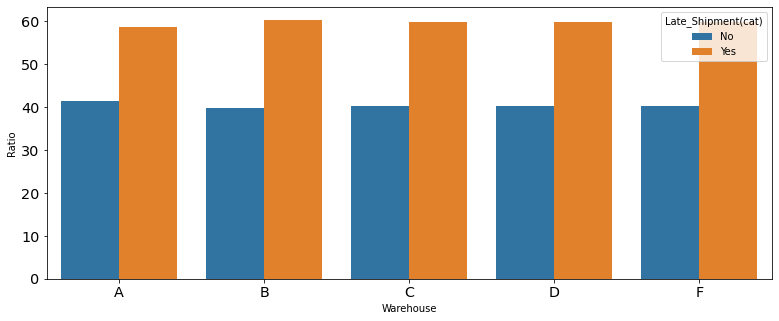

In [ ]:
#Barchart perbandingan rasio peluang terjadinya keterlambatan di setiap gudang
x = df_shipping_warehouse['Warehouse']
y = df_shipping_warehouse['Ratio']
plt.figure(figsize=(13,5))
sns.barplot(x='Warehouse', y='Ratio', hue='Late_Shipment(cat)', data=df_shipping_warehouse)
plt.show()

- Secara rasio, semua gudang relatif berimbang rasio peluang untuk terjadinya keterlambatan pengiriman. Semua gudang sama-sama lebih berpeluang untuk terjadi keterlambatan pengiriman.

### Mencari gudang mana yang lebih sering mengalami keterlambatan dengan nilai diskon yang lebih dari 10%

In [ ]:
#Mengetahui nilai-niali diskon
pd.unique(df_shipping['Discount'])

array([44, 59, 48, 10, 46, 12,  3, 11, 29, 32,  1, 43, 45,  6, 36, 18, 38,
       51,  2, 28, 24, 31, 61, 22,  4, 62, 16, 56, 15,  9, 40, 37, 41, 17,
       64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57,  7, 35,  8,  5, 53, 55,
       47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30])

In [ ]:
#Filter data frame khusus untuk transaksi dengan diskon diatas 10%
df_shipping10disc = df_shipping[df_shipping['Discount'] > 10]
df_shipping10disc

ID Warehouse Shipment  Calls  Rating  Cost  Purchases Importance  \
0        1         D   Flight      4       2   177          3        low   
1        2         F   Flight      4       5   216          2        low   
2        3         A   Flight      2       2   183          4        low   
4        5         C   Flight      2       2   184          3     medium   
5        6         F   Flight      3       1   162          3     medium   
...    ...       ...      ...    ...     ...   ...        ...        ...   
3129  3130         B     Road      3       4   248          2     medium   
3130  3131         C     Road      6       5   246          4     medium   
3131  3132         F     Road      4       1   232          3     medium   
3132  3133         D     Road      3       5   251          3        low   
3133  3134         F     Road      3       4   163          3     medium   

     Gender  Discount  Weight (gram)  Late Customer_Rating(cat)  \
0         F        44           1233     1            Bintang 2   
1         M        59           3088     1            Bintang 5   
2         M        48           3374     1            Bintang 2   
4         F        46           2484     1            Bintang 2   
5         F        12           1417     1            Bintang 1   
...     ...       ...            ...   ...                  ...   
3129      F        15           2983     1            Bintang 4   
3130      M        50           3618     1            Bintang 5   
3131      M        55           2686     1            Bintang 1   
3132      F        21           2476     1            Bintang 5   
3133      M        58           1443     1            Bintang 4   

     Late_Shipment(cat)  
0                   Yes  
1                   Yes  
2                   Yes  
4                   Yes  
5                   Yes  
...                 ...  
3129                Yes  
3130                Yes  
3131                Yes  
3132                Yes  
3133                Yes  

[2647 rows x 14 columns]

In [ ]:
#Mengetahui value yang ada pada variabel 'Late_Shipment(cat)'
df_shipping10disc['Late_Shipment(cat)'].value_counts()

Yes    2647
Name: Late_Shipment(cat), dtype: int64

Data transaksi dengan nilai diskon diatas 10% semuanya mengalami keterlambatan, tidak peduli dikirim dari gudang apa.

In [ ]:
#Aggregasi jumlah berdasarkan telat/tidak
df_shipping10discagg1 = df_shipping10disc.groupby(['Warehouse', 'Late_Shipment(cat)']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah Shipping'})
df_shipping10discagg1

Warehouse Late_Shipment(cat)  Jumlah Shipping
0         A                Yes              433
1         B                Yes              439
2         C                Yes              445
3         D                Yes              438
4         F                Yes              892

Pengiriman barang paling banyak terjadi dari gudang F

In [ ]:
#Aggregasi jumlah berdasarkan gudang
df_shipping10discagg2 = df_shipping10disc.groupby(['Warehouse']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah Shipping'})
df_shipping10discagg2

Warehouse  Jumlah Shipping
0         A              433
1         B              439
2         C              445
3         D              438
4         F              892

In [ ]:
#Merge
df_shipping10discagg = df_shipping10discagg1.merge(df_shipping10discagg2,
                              left_on = ['Warehouse'],
                              right_on = ['Warehouse'],
                              how = 'inner'
                              )
df_shipping10discagg

Warehouse Late_Shipment(cat)  Jumlah Shipping_x  Jumlah Shipping_y
0         A                Yes                433                433
1         B                Yes                439                439
2         C                Yes                445                445
3         D                Yes                438                438
4         F                Yes                892                892

In [ ]:
#Pembentukan rasio
df_shipping10discagg['Ratio'] = np.round(df_shipping10discagg['Jumlah Shipping_x']*100 / df_shipping10discagg['Jumlah Shipping_y'].sum(), 3)
df_shipping10discagg

Warehouse Late_Shipment(cat)  Jumlah Shipping_x  Jumlah Shipping_y   Ratio
0         A                Yes                433                433  16.358
1         B                Yes                439                439  16.585
2         C                Yes                445                445  16.811
3         D                Yes                438                438  16.547
4         F                Yes                892                892  33.699

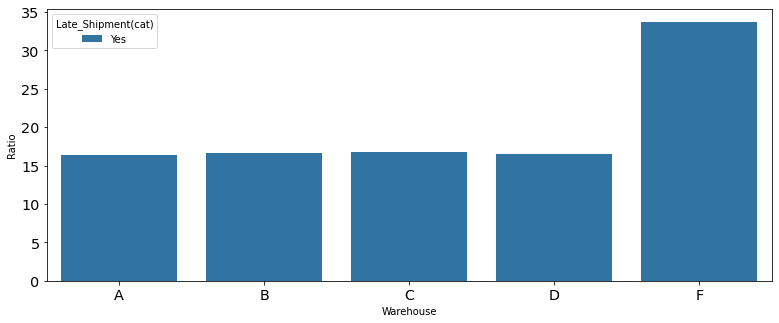

In [ ]:
#Grafik rasio barchart
x = df_shipping10discagg['Warehouse']
y = df_shipping10discagg['Ratio']
plt.figure(figsize=(13,5))
sns.barplot(x='Warehouse', y='Ratio', hue='Late_Shipment(cat)', data=df_shipping10discagg)
plt.show()

Menarik, data transaksi dengan nilai diskon diatas 10% semuanya mengalami keterlambatan, tidak peduli dikirim dari gudang apa. Pengiriman paling banyak terjadi dari gudang F, hal itu wajar karena secara sampling data, gudang f memang paling banyak jumlahnya. Perlu diselidiki lebih lanjut, jumlah sampel tiap gudang harus kita samakan terlebih dahulu, kita lakukan random sampling dan cari tahu, barang transaksi dengan diskon>10% paling banyak dikirim dari gudang apa?


### Rasio Pengiriman Telat/Tidak berdasarkan Moda Pengiriman

In [ ]:
#Data aggregation 1
df_shipping_mode1 = df_shipping.groupby(['Shipment', 'Late_Shipment(cat)']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah Shipping'})
df_shipping_mode1

Shipment Late_Shipment(cat)  Jumlah Shipping
0   Flight                 No              708
1   Flight                Yes             1069
2     Road                 No              725
3     Road                Yes             1035
4     Ship                 No             3003
5     Ship                Yes             4459

In [ ]:
#Data aggregation 2
df_shipping_mode2 = df_shipping.groupby(['Shipment']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah Shipping'})
df_shipping_mode2

Shipment  Jumlah Shipping
0   Flight             1777
1     Road             1760
2     Ship             7462

In [ ]:
#Merge
df_shipping_mode = df_shipping_mode1.merge(df_shipping_mode2,
                              left_on = ['Shipment'],
                              right_on = ['Shipment'],
                              how = 'inner'
                              )
df_shipping_mode

Shipment Late_Shipment(cat)  Jumlah Shipping_x  Jumlah Shipping_y
0   Flight                 No                708               1777
1   Flight                Yes               1069               1777
2     Road                 No                725               1760
3     Road                Yes               1035               1760
4     Ship                 No               3003               7462
5     Ship                Yes               4459               7462

In [ ]:
#Buat kolom rasio
df_shipping_mode['Ratio'] = round(df_shipping_mode['Jumlah Shipping_x'] / df_shipping_mode['Jumlah Shipping_y'], 2)
df_shipping_mode

Shipment Late_Shipment(cat)  Jumlah Shipping_x  Jumlah Shipping_y  Ratio
0   Flight                 No                708               1777   0.40
1   Flight                Yes               1069               1777   0.60
2     Road                 No                725               1760   0.41
3     Road                Yes               1035               1760   0.59
4     Ship                 No               3003               7462   0.40
5     Ship                Yes               4459               7462   0.60

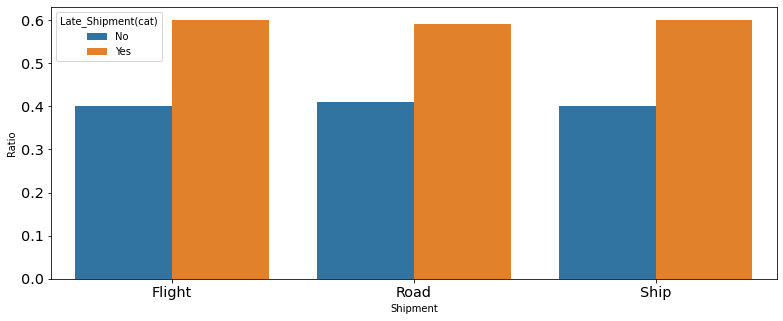

In [ ]:
x = df_shipping_mode['Shipment']
y = df_shipping_mode['Ratio']
plt.figure(figsize=(13,5))
sns.barplot(x='Shipment', y='Ratio', hue='Late_Shipment(cat)', data=df_shipping_mode)
plt.show()

- Secara rasio, semua moda relatif berimbang rasio peluang untuk terjadinya keterlambatan pengiriman. Semua moda pengiriman sama-sama lebih berpeluang untuk terjadi keterlambatan pengiriman.

### Mencari moda pengiriman mana yang lebih sering mengalami keterlambatan dengan nilai diskon yang lebih dari 10%

In [ ]:
#Aggregasi jumlah berdasarkan telat/tidak
df_shipping10discagg3 = df_shipping10disc.groupby(['Shipment', 'Late_Shipment(cat)']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah Shipping'})
df_shipping10discagg3

Shipment Late_Shipment(cat)  Jumlah Shipping
0   Flight                Yes              433
1     Road                Yes              406
2     Ship                Yes             1808

Semua transaksi pembelian dengan diskon diatas 10% mengalami keterlambatan.

In [ ]:
#Rasio
df_shipping10discagg3['Ratio'] = np.round(df_shipping10discagg3['Jumlah Shipping']*100 / df_shipping10discagg3['Jumlah Shipping'].sum(), 3)
df_shipping10discagg3

Shipment Late_Shipment(cat)  Jumlah Shipping   Ratio
0   Flight                Yes              433  16.358
1     Road                Yes              406  15.338
2     Ship                Yes             1808  68.304

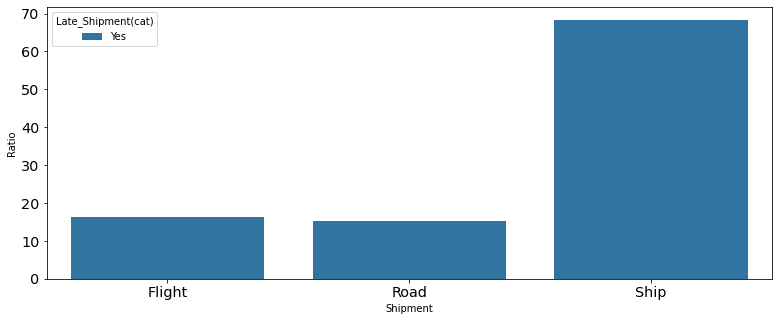

In [ ]:
#Grafik rasio barchart
x = df_shipping10discagg3['Shipment']
y = df_shipping10discagg3['Ratio']
plt.figure(figsize=(13,5))
sns.barplot(x='Shipment', y='Ratio', hue='Late_Shipment(cat)', data=df_shipping10discagg3)
plt.show()

Data transaksi dengan nilai diskon diatas 10% semuanya mengalami keterlambatan, tidak peduli dikirim dengan moda transportasi apa. Pengiriman paling banyak terjadi dengan moda kapal, hal itu wajar karena secara sampling data, moda kapal memang paling banyak jumlahnya. Perlu diselidiki lebih lanjut, jumlah sampel tiap moda transportasi harus kita samakan terlebih dahulu, kita lakukan random sampling dan cari tahu, barang transaksi dengan diskon>10% paling banyak dikirim melalui moda transportasi apa?

## Berat Paket Vs Target Variabel

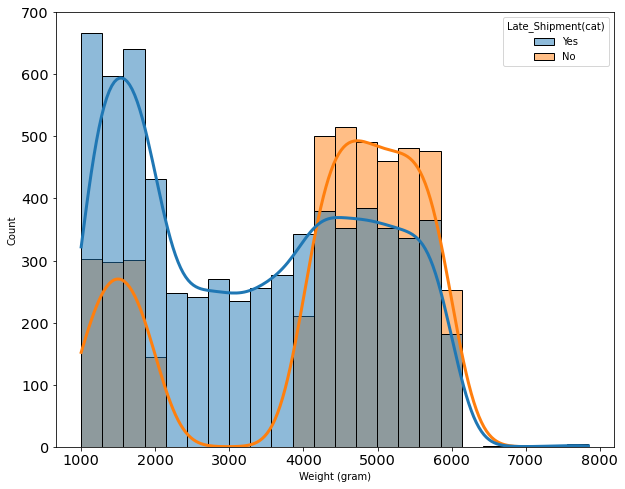

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=df_shipping, x='Weight (gram)', hue='Late_Shipment(cat)', kde=True)

- Pengiriman barang dengan berat < 4000 gram cenderung telat, perlu digali lebih lanjut data pengiriman barang dengan berat <4000 gram dan 2000-4000 gram.

## Hubungan Keterlambatan Pengiriman Barang dengan Pelayanan Customer

### Late Shipment vs Customer Care Calls

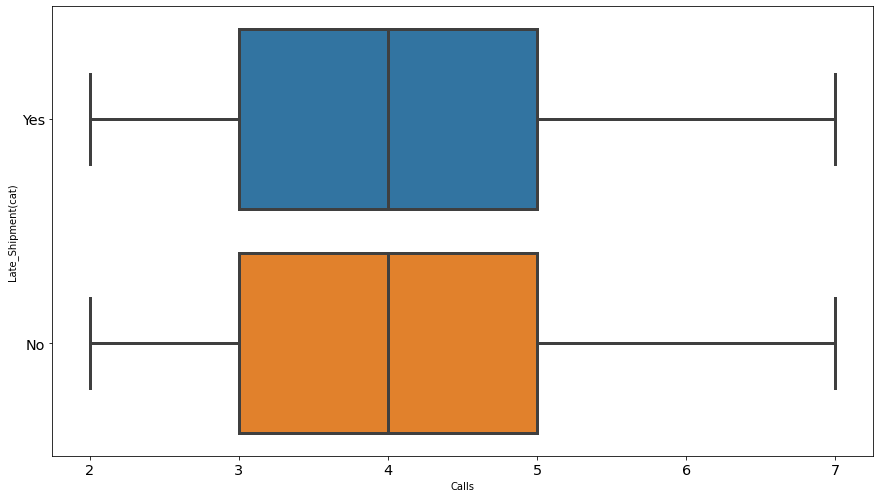

In [ ]:
#Pembuatan grafik menggunakan seaborn
sns.boxplot(x = 'Calls', 
            y = 'Late_Shipment(cat)', 
            data = df_shipping)

### Late Shipment vs Customer Rating

In [ ]:
df_shipping_rat = df_shipping.groupby(['Late_Shipment(cat)', 'Customer_Rating(cat)']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah pelanggan'})
df_shipping_rat

Late_Shipment(cat) Customer_Rating(cat)  Jumlah pelanggan
0                 No            Bintang 1               922
1                 No            Bintang 2               892
2                 No            Bintang 3               882
3                 No            Bintang 4               886
4                 No            Bintang 5               854
5                Yes            Bintang 1              1313
6                Yes            Bintang 2              1273
7                Yes            Bintang 3              1357
8                Yes            Bintang 4              1303
9                Yes            Bintang 5              1317

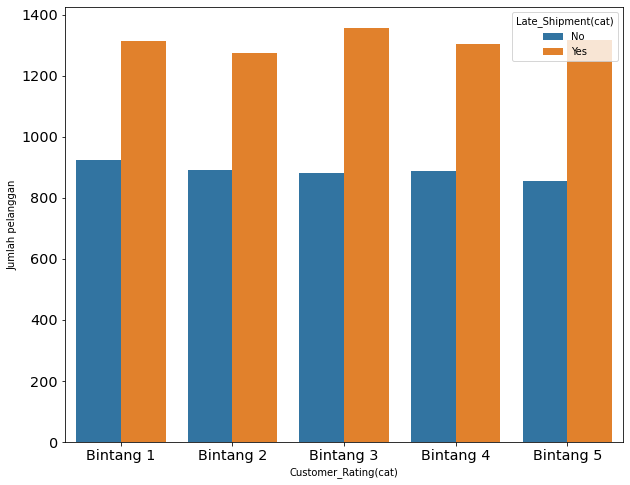

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Customer_Rating(cat)', y='Jumlah pelanggan', data=df_shipping_rat, hue='Late_Shipment(cat)')

- Keterlambatan tidak mempengaruhi rating

## MULTIVARIATE ? BUSINESS INSIGHT 2 (TAMBAHAN)

Hubungan feature categorical dengan waktu kedatangan

In [ ]:
# membuat list kolom categorical

object_columns = df_shipping.select_dtypes(include = ['object'])
object_columns.head()

Warehouse Shipment Importance Gender Customer_Rating(cat) Late_Shipment(cat)
0         D   Flight        low      F            Bintang 2                Yes
1         F   Flight        low      M            Bintang 5                Yes
2         A   Flight        low      M            Bintang 2                Yes
3         B   Flight     medium      M            Bintang 3                Yes
4         C   Flight     medium      F            Bintang 2                Yes

1. Warehouse Block

In [ ]:
# Melihat distribusi Warehouse Block
warehouse = object_columns['Warehouse'].value_counts().reset_index()
warehouse.columns = ['warehouse', 'value_counts']
fig = px.pie(warehouse, names = 'warehouse', values = 'value_counts', 
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
             hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



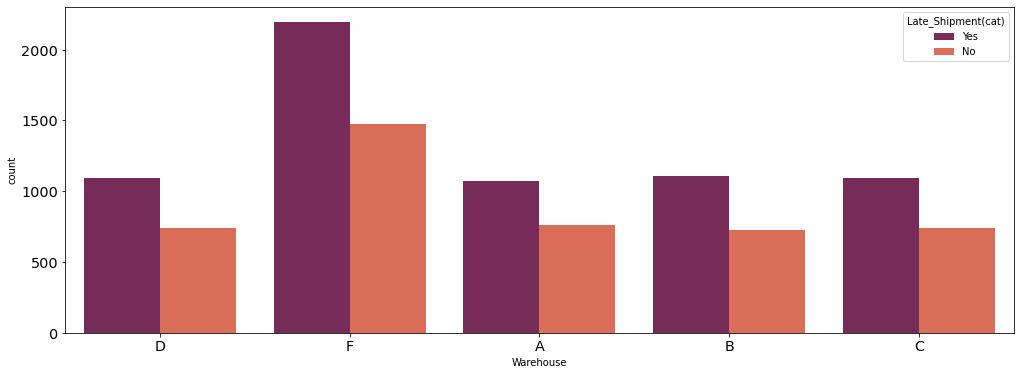

In [ ]:
# melihat gudang mana yang berpotensi untuk terlambat
plt.figure(figsize = (17, 6))
sns.countplot('Warehouse', hue = 'Late_Shipment(cat)', data = df_shipping, palette='rocket')
plt.show()

Pada semua gudang mengalami keterlambatan, tetapi pada gudang F lebih banyak yang terlambat

2. Gender

In [ ]:
# Melihat distribusi Gender

gender = object_columns['Gender'].value_counts().reset_index()
gender.columns = ['Gender', 'value_counts']
fig = px.pie(gender, names = 'Gender', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



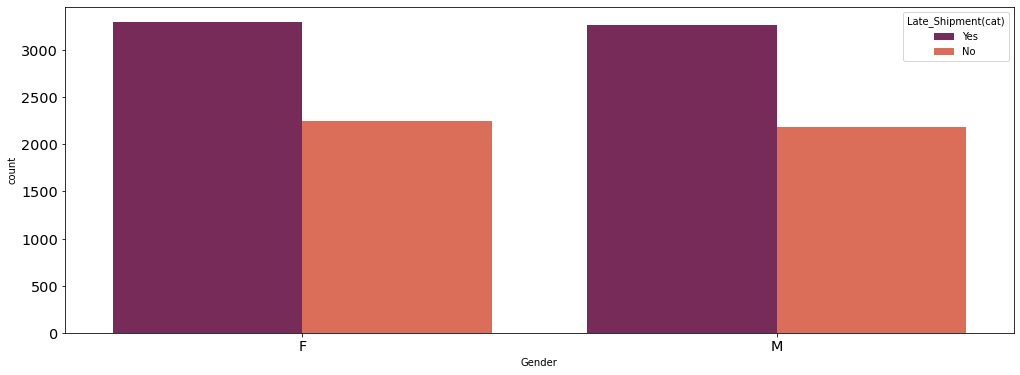

In [ ]:
# Apakah Gender mempengaruhi keterlambatan
plt.figure(figsize = (17, 6))
sns.countplot('Gender', hue = 'Late_Shipment(cat)', data = df_shipping, palette='rocket')
plt.show()

Keterlambatan tidak dipengaruhi oleh gender

3. Product Importance

In [ ]:
# Melihat distribusi Product Importance

product_imp = object_columns['Importance'].value_counts().reset_index()
product_imp.columns = ['Importance', 'value_counts']
fig = px.pie(product_imp, names = 'Importance', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.Darkmint_r, width = 650, height = 400,
             hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



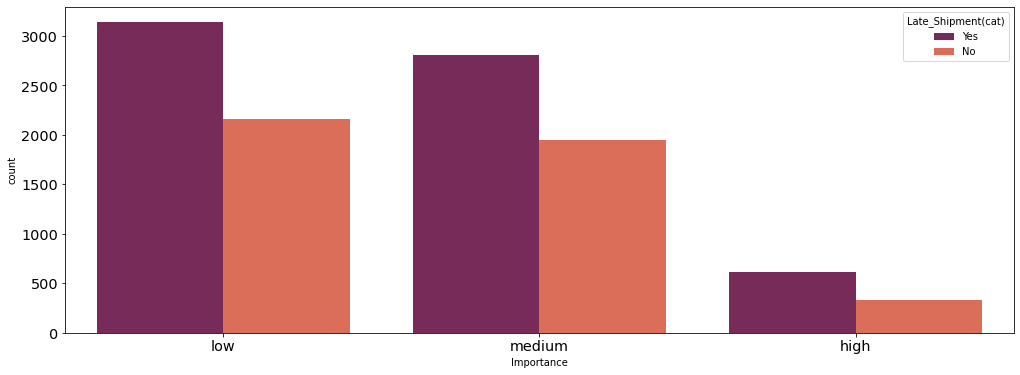

In [ ]:
# Apakah product importance mempengaruhi keterlambatan

plt.figure(figsize = (17, 6))
sns.countplot('Importance', hue = 'Late_Shipment(cat)', data = df_shipping, palette='rocket')
plt.show()

Product Importance juga tidak mempengaruhi keterlambatan. Pada setiap kategori memiliki jumlah keterlambatan yang lebih banyak daripada yang tepat waktu.

4. Prior Purchasing

In [ ]:
# Melihat distribusi kolom prior purchases

prior_purchases = df_shipping['Purchases'].value_counts().reset_index()
prior_purchases.columns = ['Purchases', 'value_counts']
fig = px.pie(prior_purchases, names = 'Purchases', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
            hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



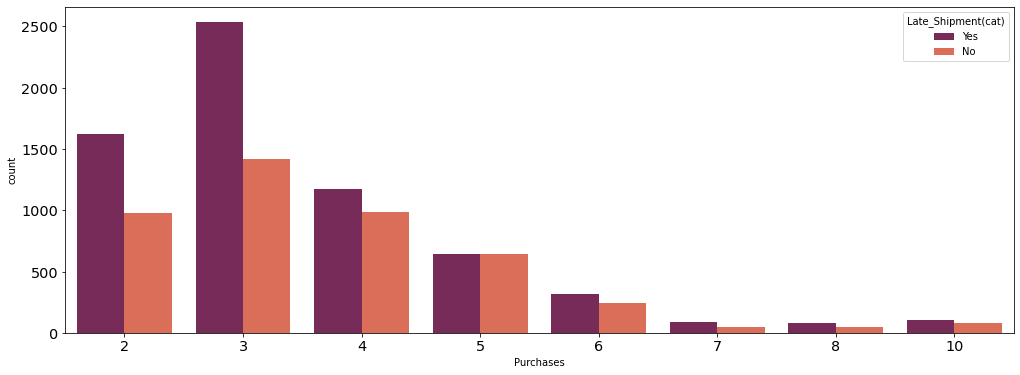

In [ ]:
# Apakah kolom prior purchases mempengaruhi keterlambatan

plt.figure(figsize = (17, 6))
sns.countplot('Purchases', hue = 'Late_Shipment(cat)', data = df_shipping, palette='rocket')
plt.show()

Pada semua kolom prior purchase mengelami keterlambatan, kecuali prior purchase yang bernilai 5. Paling banyak terlambat di kolom bernilai 2 dan 3.

5. Hubungan antara Gender, Prior Purchase dan Keterlambatan

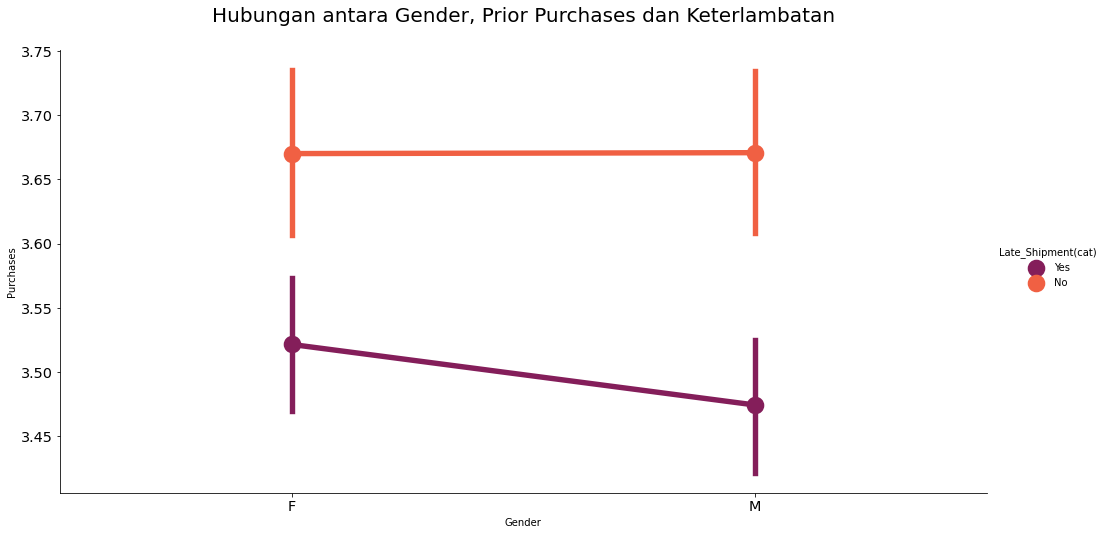

In [ ]:
# Membuat line plot untuk melihat hubungan antara Gender, Prior Purchases dan Keterlambatan

sns.catplot(x = 'Gender', y = 'Purchases', hue = 'Late_Shipment(cat)', data = df_shipping, kind = 'point', height = 7, aspect = 2,
            palette = 'rocket')
plt.title('Hubungan antara Gender, Prior Purchases dan Keterlambatan\n', fontsize = 20)
plt.show()

Dari gambar diatas disimpulkan bahwa tingkat keterlambatan pada wanita lebih tinggi dengan nilai prior purchase lebih tinggi

6. Hubungan antara Diskon, Prior Purchase dan Keterlambatan

In [ ]:
# membuat boxplot antara diskon, prior purchases dan keterlambatan

px.box(x = 'Purchases', y = 'Discount', data_frame = df_shipping, color = 'Late_Shipment(cat)', template = 'plotly_dark')

# Final Project - Stage 2
## Pre-Processing - Data Set E-Commerce Shipping
## Group 8 : Decentraland
**Group Member:**
- Dharma Setiawan
- Ilham Ibnu A.
- M. Farhan Atmawinanda
- Fikri Diva S.
- Ahmad Ilham H.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
df_shipping = pd.read_excel("https://raw.githubusercontent.com/Decentraland-Team-Final-Project/Report-Final-Project-/main/Dataset/df_shipping_stage_1.xlsx")
df_shipping.head()

ID Warehouse_Block Mode_of_Shipment  Customer_Care_Calls  \
0   1               D           Flight                    4   
1   2               F           Flight                    4   
2   3               A           Flight                    2   
3   4               B           Flight                    3   
4   5               C           Flight                    2   

   Customer_Rating(num)  Cost_of_The_Product  Prior_Purchases  \
0                     2                  177                3   
1                     5                  216                2   
2                     2                  183                4   
3                     3                  176                4   
4                     2                  184                3   

  Product_Importance Gender  Discount_Offered  Weight_in_gms  \
0                low      F                44           1233   
1                low      M                59           3088   
2                low      M                48           3374   
3             medium      M                10           1177   
4             medium      F                46           2484   

   Late_Shipment(num) Customer_Rating(cat) Late_Shipment(cat)  
0                   1            Bintang 2                Yes  
1                   1            Bintang 5                Yes  
2                   1            Bintang 2                Yes  
3                   1            Bintang 3                Yes  
4                   1            Bintang 2                Yes

In [ ]:
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    10999 non-null  int64 
 1   Warehouse_Block       10999 non-null  object
 2   Mode_of_Shipment      10999 non-null  object
 3   Customer_Care_Calls   10999 non-null  int64 
 4   Customer_Rating(num)  10999 non-null  int64 
 5   Cost_of_The_Product   10999 non-null  int64 
 6   Prior_Purchases       10999 non-null  int64 
 7   Product_Importance    10999 non-null  object
 8   Gender                10999 non-null  object
 9   Discount_Offered      10999 non-null  int64 
 10  Weight_in_gms         10999 non-null  int64 
 11  Late_Shipment(num)    10999 non-null  int64 
 12  Customer_Rating(cat)  10999 non-null  object
 13  Late_Shipment(cat)    10999 non-null  object
dtypes: int64(8), object(6)
memory usage: 1.2+ MB


In [ ]:
#Pengelompokan kolom berdasarkan jenisnya
number = ['Customer_Care_Calls', 'Cost_of_The_Product', 'Prior_Purchases', 'Discount_Offered', 'Weight_in_gms', 'Customer_Rating(num)', 'Late_Shipment(num)']
category = ['Warehouse_Block', 'Mode_of_Shipment', 'Product_Importance', 'Gender', 'Customer_Rating(cat)', 'Late_Shipment(cat)']

## Feature Encoding

In [ ]:
#Melihat value setiap variabel/feature 
category_encoding = ['Warehouse_Block', 'Mode_of_Shipment', 'Product_Importance', 'Gender']

for column in category_encoding:
  print(f'value counts of column {column}')
  print(df_shipping[column].value_counts())
  print('---'*10, '\n')

value counts of column Warehouse_Block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_Block, dtype: int64
------------------------------ 

value counts of column Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
------------------------------ 

value counts of column Product_Importance
low       5297
medium    4754
high       948
Name: Product_Importance, dtype: int64
------------------------------ 

value counts of column Gender
F    5545
M    5454
Name: Gender, dtype: int64
------------------------------ 



Strategi Feature Encoding:
   - 'Product_Importance' dan 'Gender' : label encoding
   - 'Warehouse_Block' dan 'Mode_of_Shipment' : one hot encoding

In [ ]:
#Label encoding
mapping_gender = {
    'F' : 0,
    'M' : 1
}

mapping_product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}

df_shipping['Gender(num)'] = df_shipping['Gender'].map(mapping_gender)
df_shipping['Product_Importance(num)'] = df_shipping['Product_Importance'].map(mapping_product_importance)

In [ ]:
#One hot encoding
# WARNING: run code ini sekali saja
for cat in ['Warehouse_Block', 'Mode_of_Shipment']:
    onehots = pd.get_dummies(df_shipping[cat], prefix=cat)
    df_shipping = df_shipping.join(onehots)

In [ ]:
#Tampilan dataset setelah beberapa variabel diencoding
df_shipping.head()

ID Warehouse_Block Mode_of_Shipment  Customer_Care_Calls  \
0   1               D           Flight                    4   
1   2               F           Flight                    4   
2   3               A           Flight                    2   
3   4               B           Flight                    3   
4   5               C           Flight                    2   

   Customer_Rating(num)  Cost_of_The_Product  Prior_Purchases  \
0                     2                  177                3   
1                     5                  216                2   
2                     2                  183                4   
3                     3                  176                4   
4                     2                  184                3   

  Product_Importance Gender  Discount_Offered  ...  Gender(num)  \
0                low      F                44  ...            0   
1                low      M                59  ...            1   
2                low      M                48  ...            1   
3             medium      M                10  ...            1   
4             medium      F                46  ...            0   

   Product_Importance(num) Warehouse_Block_A Warehouse_Block_B  \
0                        0                 0                 0   
1                        0                 0                 0   
2                        0                 1                 0   
3                        1                 0                 1   
4                        1                 0                 0   

   Warehouse_Block_C  Warehouse_Block_D  Warehouse_Block_F  \
0                  0                  1                  0   
1                  0                  0                  1   
2                  0                  0                  0   
3                  0                  0                  0   
4                  1                  0                  0   

   Mode_of_Shipment_Flight  Mode_of_Shipment_Road  Mode_of_Shipment_Ship  
0                        1                      0                      0  
1                        1                      0                      0  
2                        1                      0                      0  
3                        1                      0                      0  
4                        1                      0                      0  

[5 rows x 24 columns]

In [ ]:
#Info dataset setelah beberapa variabel diencoding
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       10999 non-null  int64 
 1   Warehouse_Block          10999 non-null  object
 2   Mode_of_Shipment         10999 non-null  object
 3   Customer_Care_Calls      10999 non-null  int64 
 4   Customer_Rating(num)     10999 non-null  int64 
 5   Cost_of_The_Product      10999 non-null  int64 
 6   Prior_Purchases          10999 non-null  int64 
 7   Product_Importance       10999 non-null  object
 8   Gender                   10999 non-null  object
 9   Discount_Offered         10999 non-null  int64 
 10  Weight_in_gms            10999 non-null  int64 
 11  Late_Shipment(num)       10999 non-null  int64 
 12  Customer_Rating(cat)     10999 non-null  object
 13  Late_Shipment(cat)       10999 non-null  object
 14  Gender(num)              10999 non-nul

In [ ]:
df_shipping.describe()

ID  Customer_Care_Calls  Customer_Rating(num)  \
count  10999.00000         10999.000000          10999.000000   
mean    5500.00000             4.054459              2.990545   
std     3175.28214             1.141490              1.413603   
min        1.00000             2.000000              1.000000   
25%     2750.50000             3.000000              2.000000   
50%     5500.00000             4.000000              3.000000   
75%     8249.50000             5.000000              4.000000   
max    10999.00000             7.000000              5.000000   

       Cost_of_The_Product  Prior_Purchases  Discount_Offered  Weight_in_gms  \
count         10999.000000     10999.000000      10999.000000   10999.000000   
mean            210.196836         3.567597         13.373216    3634.016729   
std              48.063272         1.522860         16.205527    1635.377251   
min              96.000000         2.000000          1.000000    1001.000000   
25%             169.000000         3.000000          4.000000    1839.500000   
50%             214.000000         3.000000          7.000000    4149.000000   
75%             251.000000         4.000000         10.000000    5050.000000   
max             310.000000        10.000000         65.000000    7846.000000   

       Late_Shipment(num)   Gender(num)  Product_Importance(num)  \
count        10999.000000  10999.000000             10999.000000   
mean             0.596691      0.495863                 0.604600   
std              0.490584      0.500006                 0.641464   
min              0.000000      0.000000                 0.000000   
25%              0.000000      0.000000                 0.000000   
50%              1.000000      0.000000                 1.000000   
75%              1.000000      1.000000                 1.000000   
max              1.000000      1.000000                 2.000000   

       Warehouse_Block_A  Warehouse_Block_B  Warehouse_Block_C  \
count       10999.000000       10999.000000       10999.000000   
mean            0.166652           0.166652           0.166652   
std             0.372681           0.372681           0.372681   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           0.000000           0.000000   
max             1.000000           1.000000           1.000000   

       Warehouse_Block_D  Warehouse_Block_F  Mode_of_Shipment_Flight  \
count       10999.000000       10999.000000             10999.000000   
mean            0.166742           0.333303                 0.161560   
std             0.372763           0.471415                 0.368064   
min             0.000000           0.000000                 0.000000   
25%             0.000000           0.000000                 0.000000   
50%             0.000000           0.000000                 0.000000   
75%             0.000000           1.000000                 0.000000   
max             1.000000           1.000000                 1.000000   

       Mode_of_Shipment_Road  Mode_of_Shipment_Ship  
count           10999.000000           10999.000000  
mean                0.160015               0.678425  
std                 0.366636               0.467102  
min                 0.000000               0.000000  
25%                 0.000000               0.000000  
50%                 0.000000               1.000000  
75%                 0.000000               1.000000  
max                 1.000000               1.000000

- Variabel `Customer_care_calls` dan `Cost_of_the_Product` sudah cukup simetrik distribusinya mendekati distribusi normal (mean dan median tidak berbeda jauh).
- Variabel `Discount_offered` pola persebarannya membentuk positively skewed (mean>median), sedangkan variabel `Weight_in_gms` membentuk negatively skewed (median>mean).
- Dilihat dari nilai min, max, median, dan mean, variabel `Prior_purchases` dan `Discount_offered` tampaknya memiliki nilai outlier di titik max.

## Correlation Heatmap (Setelah Feature Encoding)

In [ ]:
#Buat data frame baru dimana variabel `ID` untuk sementara di drop
df_shippingcorr = df_shipping.drop(['ID'], axis=1)

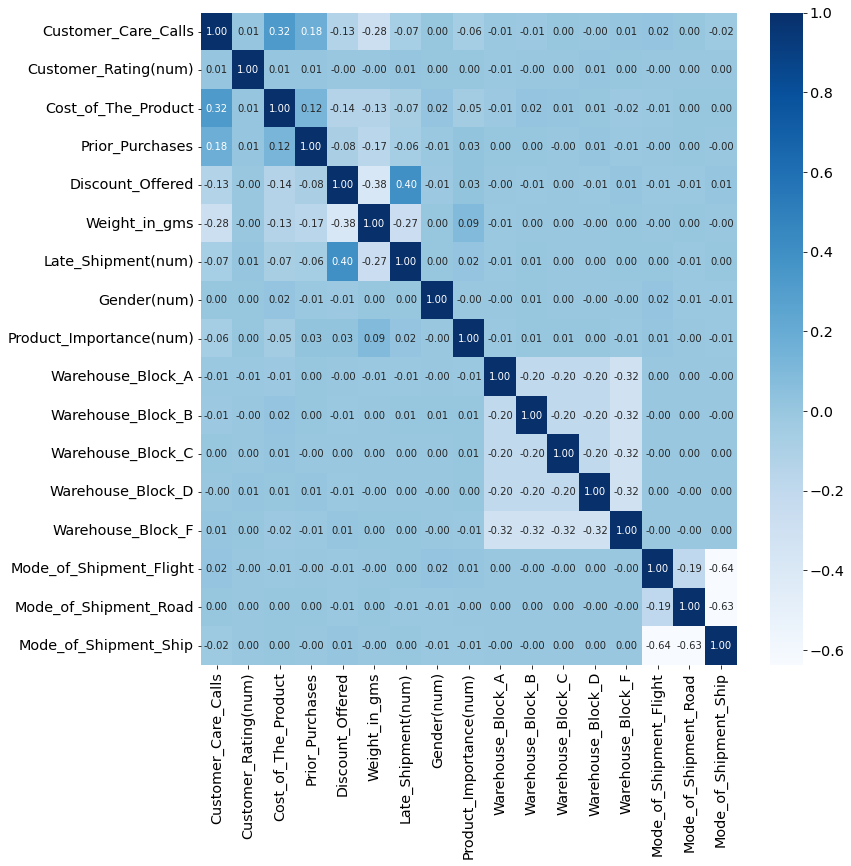

In [ ]:
# correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_shippingcorr.corr(), cmap='Blues', annot=True, fmt='.2f')

## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# semua variabel numerik coba kita re-scale
df_shipping['norm_Customer_Care_Calls'] = MinMaxScaler().fit_transform(df_shipping['Customer_Care_Calls'].values.reshape(len(df_shipping), 1))
df_shipping['norm_Cost_of_The_Product'] = MinMaxScaler().fit_transform(df_shipping['Cost_of_The_Product'].values.reshape(len(df_shipping), 1))
df_shipping['norm_Prior_Purchases'] = MinMaxScaler().fit_transform(df_shipping['Prior_Purchases'].values.reshape(len(df_shipping), 1))
df_shipping['norm_Discount_Offered'] = MinMaxScaler().fit_transform(df_shipping['Discount_Offered'].values.reshape(len(df_shipping), 1))
df_shipping['norm_Weight_in_gms'] = MinMaxScaler().fit_transform(df_shipping['Weight_in_gms'].values.reshape(len(df_shipping), 1))

In [ ]:
df_shipping[{'Customer_Care_Calls', 'Cost_of_The_Product', 'Prior_Purchases', 'Discount_Offered', 'Weight_in_gms',
             'norm_Customer_Care_Calls', 'norm_Cost_of_The_Product', 'norm_Prior_Purchases', 'norm_Discount_Offered', 'norm_Weight_in_gms'}].describe()

Customer_Care_Calls  norm_Discount_Offered  norm_Cost_of_The_Product  \
count         10999.000000           10999.000000              10999.000000   
mean              4.054459               0.193331                  0.533630   
std               1.141490               0.253211                  0.224595   
min               2.000000               0.000000                  0.000000   
25%               3.000000               0.046875                  0.341121   
50%               4.000000               0.093750                  0.551402   
75%               5.000000               0.140625                  0.724299   
max               7.000000               1.000000                  1.000000   

       Discount_Offered  Weight_in_gms  norm_Customer_Care_Calls  \
count      10999.000000   10999.000000              10999.000000   
mean          13.373216    3634.016729                  0.410892   
std           16.205527    1635.377251                  0.228298   
min            1.000000    1001.000000                  0.000000   
25%            4.000000    1839.500000                  0.200000   
50%            7.000000    4149.000000                  0.400000   
75%           10.000000    5050.000000                  0.600000   
max           65.000000    7846.000000                  1.000000   

       norm_Prior_Purchases  Cost_of_The_Product  norm_Weight_in_gms  \
count          10999.000000         10999.000000        10999.000000   
mean               0.195950           210.196836            0.384663   
std                0.190358            48.063272            0.238916   
min                0.000000            96.000000            0.000000   
25%                0.125000           169.000000            0.122498   
50%                0.125000           214.000000            0.459898   
75%                0.250000           251.000000            0.591527   
max                1.000000           310.000000            1.000000   

       Prior_Purchases  
count     10999.000000  
mean          3.567597  
std           1.522860  
min           2.000000  
25%           3.000000  
50%           3.000000  
75%           4.000000  
max          10.000000

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
# semua variabel numerik coba kita standardisasi
df_shipping['std_Customer_Care_Calls'] = StandardScaler().fit_transform(df_shipping['Customer_Care_Calls'].values.reshape(len(df_shipping), 1))
df_shipping['std_Cost_of_The_Product'] = StandardScaler().fit_transform(df_shipping['Cost_of_The_Product'].values.reshape(len(df_shipping), 1))
df_shipping['std_Prior_Purchases'] = StandardScaler().fit_transform(df_shipping['Prior_Purchases'].values.reshape(len(df_shipping), 1))
df_shipping['std_Discount_Offered'] = StandardScaler().fit_transform(df_shipping['Discount_Offered'].values.reshape(len(df_shipping), 1))
df_shipping['std_Weight_in_gms'] = StandardScaler().fit_transform(df_shipping['Weight_in_gms'].values.reshape(len(df_shipping), 1))

In [ ]:
df_shipping[{'Customer_Care_Calls', 'Cost_of_The_Product', 'Prior_Purchases', 'Discount_Offered', 'Weight_in_gms',
             'std_Customer_Care_Calls', 'std_Cost_of_The_Product', 'std_Prior_Purchases', 'std_Discount_Offered', 'std_Weight_in_gms'}].describe()

Customer_Care_Calls  Discount_Offered  Weight_in_gms  \
count         10999.000000      10999.000000   10999.000000   
mean              4.054459         13.373216    3634.016729   
std               1.141490         16.205527    1635.377251   
min               2.000000          1.000000    1001.000000   
25%               3.000000          4.000000    1839.500000   
50%               4.000000          7.000000    4149.000000   
75%               5.000000         10.000000    5050.000000   
max               7.000000         65.000000    7846.000000   

       std_Customer_Care_Calls  std_Cost_of_The_Product  std_Weight_in_gms  \
count             1.099900e+04             1.099900e+04       1.099900e+04   
mean              1.128796e-15            -2.113653e-16      -4.676483e-16   
std               1.000045e+00             1.000045e+00       1.000045e+00   
min              -1.799887e+00            -2.376077e+00      -1.610109e+00   
25%              -9.237994e-01            -8.571765e-01      -1.097360e+00   
50%              -4.771132e-02             7.913188e-02       3.149161e-01   
75%               8.283768e-01             8.489855e-01       8.658844e-01   
max               2.580553e+00             2.076590e+00       2.575659e+00   

       Cost_of_The_Product  std_Discount_Offered  std_Prior_Purchases  \
count         10999.000000          1.099900e+04         1.099900e+04   
mean            210.196836         -1.286048e-14        -2.054180e-15   
std              48.063272          1.000045e+00         1.000045e+00   
min              96.000000         -7.635530e-01        -1.029424e+00   
25%             169.000000         -5.784225e-01        -3.727348e-01   
50%             214.000000         -3.932921e-01        -3.727348e-01   
75%             251.000000         -2.081616e-01         2.839543e-01   
max             310.000000          3.185896e+00         4.224088e+00   

       Prior_Purchases  
count     10999.000000  
mean          3.567597  
std           1.522860  
min           2.000000  
25%           3.000000  
50%           3.000000  
75%           4.000000  
max          10.000000

## Log/Exp Transformation

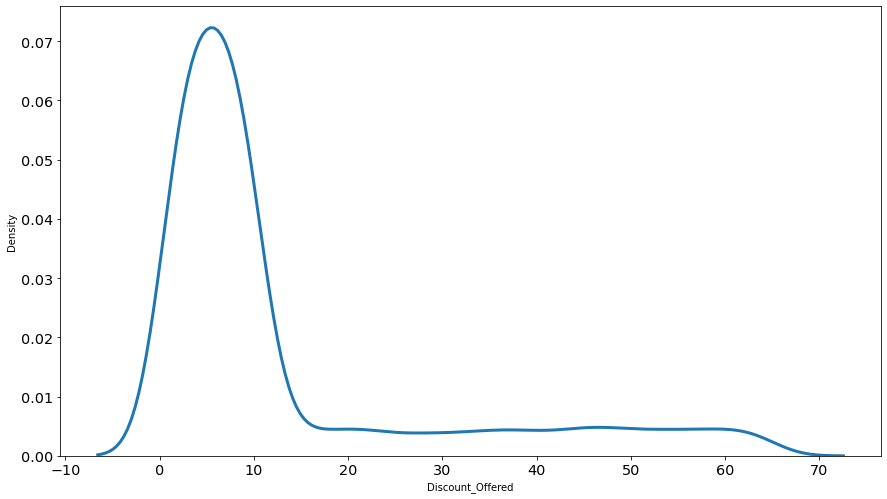

In [ ]:
#distribusi Discount_Offered (nilai asli)
sns.kdeplot(df_shipping['Discount_Offered'])

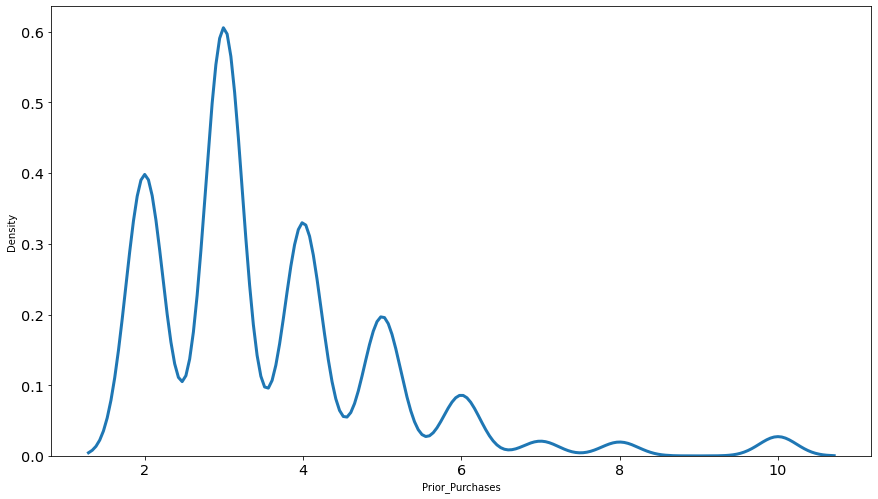

In [ ]:
#distribusi Prior_Purchases (nilai asli)
sns.kdeplot(df_shipping['Prior_Purchases'])

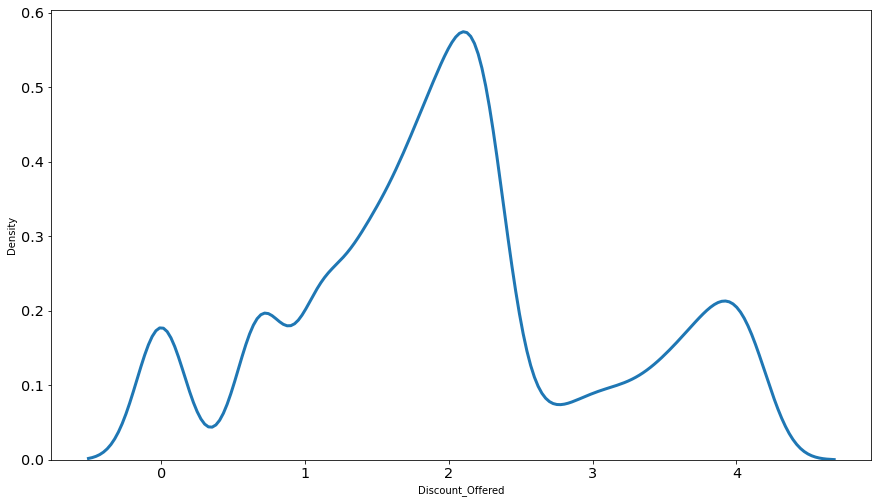

In [ ]:
#distribusi Discount_Offered (setelah log transformation)
sns.kdeplot(np.log(df_shipping['Discount_Offered']))

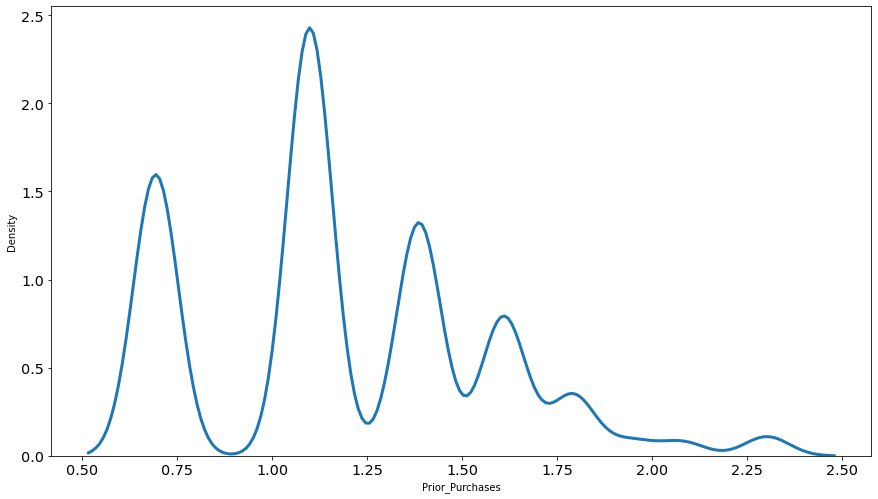

In [ ]:
#distribusi Prior_Purchases (setelah log transformation)
sns.kdeplot(np.log(df_shipping['Prior_Purchases']))

In [ ]:
#tranformasi log
df_shipping['log_Discount_Offered'] = np.log(df_shipping['Discount_Offered'])
df_shipping['log_Prior_Purchases'] = np.log(df_shipping['Prior_Purchases'])

In [ ]:
df_shipping[{'Discount_Offered', 'log_Discount_Offered', 'Prior_Purchases', 'log_Prior_Purchases'}].describe()

Discount_Offered  log_Discount_Offered  log_Prior_Purchases  \
count      10999.000000          10999.000000         10999.000000   
mean          13.373216              1.998420             1.195669   
std           16.205527              1.083692             0.379769   
min            1.000000              0.000000             0.693147   
25%            4.000000              1.386294             1.098612   
50%            7.000000              1.945910             1.098612   
75%           10.000000              2.302585             1.386294   
max           65.000000              4.174387             2.302585   

       Prior_Purchases  
count     10999.000000  
mean          3.567597  
std           1.522860  
min           2.000000  
25%           3.000000  
50%           3.000000  
75%           4.000000  
max          10.000000

## Standardization

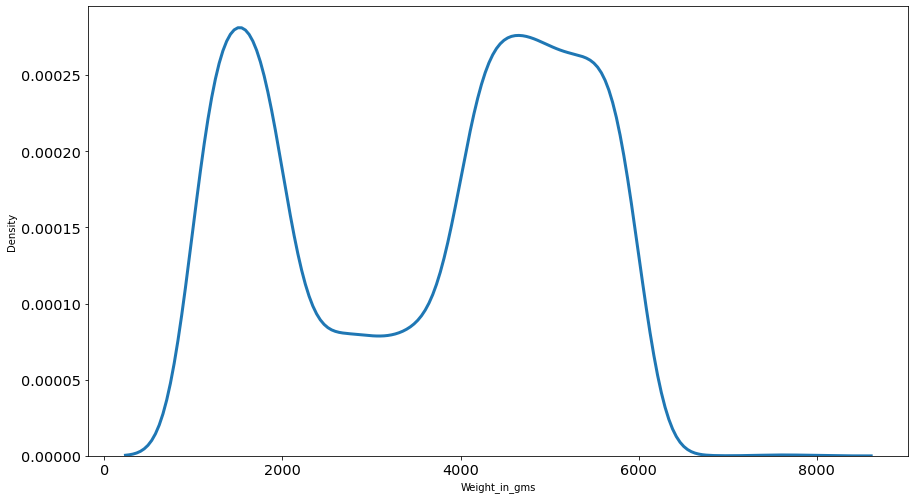

In [ ]:
#distribusi Discount_Offered (nilai asli)
sns.kdeplot(df_shipping['Weight_in_gms'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# standardisasi Weight_in_gms
df_shipping['std_Weight_in_gms'] = StandardScaler().fit_transform(df_shipping['Weight_in_gms'].values.reshape(len(df_shipping), 1))

In [ ]:
df_shipping[{'Weight_in_gms', 'std_Weight_in_gms'}].describe()

Weight_in_gms  std_Weight_in_gms
count   10999.000000       1.099900e+04
mean     3634.016729      -4.676483e-16
std      1635.377251       1.000045e+00
min      1001.000000      -1.610109e+00
25%      1839.500000      -1.097360e+00
50%      4149.000000       3.149161e-01
75%      5050.000000       8.658844e-01
max      7846.000000       2.575659e+00

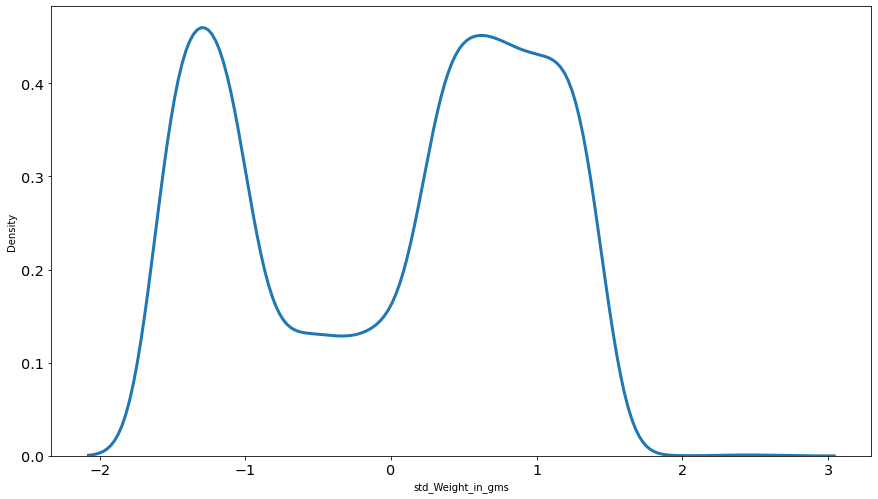

In [ ]:
sns.kdeplot(df_shipping['std_Weight_in_gms'])

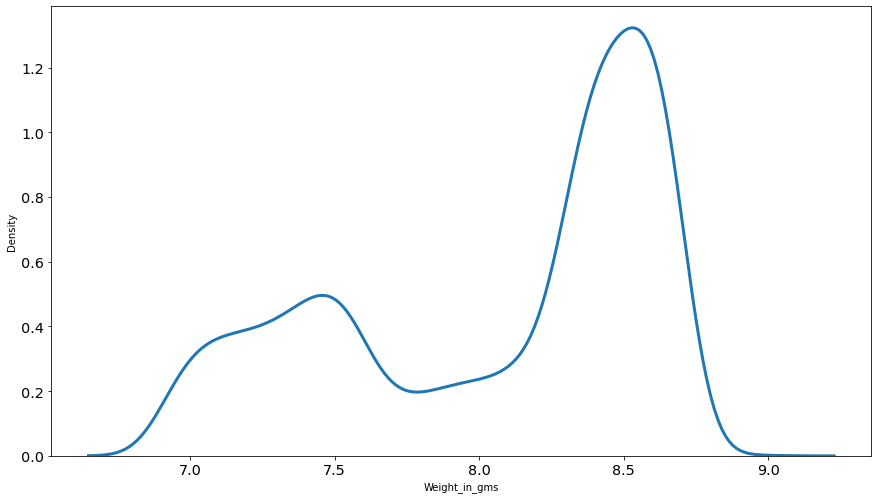

In [ ]:
#coba log transformation Weight_in_gms
sns.kdeplot(np.log(df_shipping['Weight_in_gms']))

In [ ]:
#coba root square Weight_in_gms
df_shipping['rts_Weight_in_gms'] = np.sqrt(df_shipping['Weight_in_gms'])

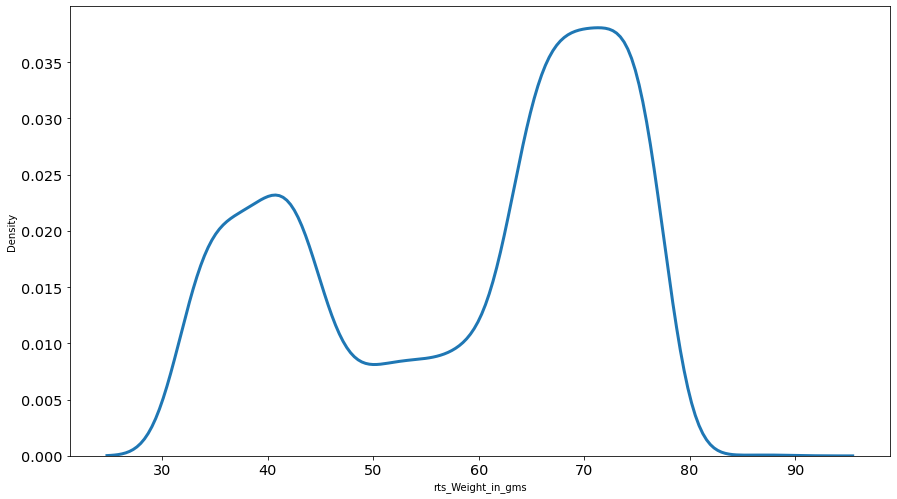

In [ ]:
sns.kdeplot(df_shipping['rts_Weight_in_gms'])

## Pengelompokkan kolom pada Data base

In [ ]:
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10999 non-null  int64  
 1   Warehouse_Block           10999 non-null  object 
 2   Mode_of_Shipment          10999 non-null  object 
 3   Customer_Care_Calls       10999 non-null  int64  
 4   Customer_Rating(num)      10999 non-null  int64  
 5   Cost_of_The_Product       10999 non-null  int64  
 6   Prior_Purchases           10999 non-null  int64  
 7   Product_Importance        10999 non-null  object 
 8   Gender                    10999 non-null  object 
 9   Discount_Offered          10999 non-null  int64  
 10  Weight_in_gms             10999 non-null  int64  
 11  Late_Shipment(num)        10999 non-null  int64  
 12  Customer_Rating(cat)      10999 non-null  object 
 13  Late_Shipment(cat)        10999 non-null  object 
 14  Gender

In [ ]:
#Pengelompokan kolom berdasarkan jenisnya
integer = ['Customer_Care_Calls', 'Cost_of_The_Product', 'Prior_Purchases', 'Discount_Offered', 'Weight_in_gms']
category = ['Warehouse_Block', 'Mode_of_Shipment', 'Product_Importance', 'Gender', 'Customer_Rating(cat)', 'Late_Shipment(cat)']
normalization = ['norm_Customer_Care_Calls', 'norm_Cost_of_The_Product', 'norm_Prior_Purchases', 'norm_Discount_Offered', 'norm_Weight_in_gms']
standardization = ['std_Customer_Care_Calls', 'std_Cost_of_The_Product', 'std_Prior_Purchases', 'std_Discount_Offered', 'std_Weight_in_gms']
log = ['log_Discount_Offered', 'log_Prior_Purchases']
rts = ['rts_Weight_in_gms']
binary = ['Late_Shipment(num)', 'Gender(num)', 'Warehouse_Block_A', 'Warehouse_Block_B', 'Warehouse_Block_C', 'Warehouse_Block_D', 'Warehouse_Block_F',
          'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship']
ordinal = ['Customer_Rating(num)', 'Product_Importance(num)']

## Outliers Handling

In [ ]:
#Info dataset setelah feature encoding dan enginering
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10999 non-null  int64  
 1   Warehouse_Block           10999 non-null  object 
 2   Mode_of_Shipment          10999 non-null  object 
 3   Customer_Care_Calls       10999 non-null  int64  
 4   Customer_Rating(num)      10999 non-null  int64  
 5   Cost_of_The_Product       10999 non-null  int64  
 6   Prior_Purchases           10999 non-null  int64  
 7   Product_Importance        10999 non-null  object 
 8   Gender                    10999 non-null  object 
 9   Discount_Offered          10999 non-null  int64  
 10  Weight_in_gms             10999 non-null  int64  
 11  Late_Shipment(num)        10999 non-null  int64  
 12  Customer_Rating(cat)      10999 non-null  object 
 13  Late_Shipment(cat)        10999 non-null  object 
 14  Gender

In [ ]:
#Pengelompokan kolom berdasarkan jenisnya
number = ['Customer_Care_Calls', 'Cost_of_The_Product', 'Prior_Purchases', 'Discount_Offered', 'Weight_in_gms', 
          'Customer_Rating(num)', 'Late_Shipment(num)', 'log_Discount_Offered', 'log_Prior_Purchases']
category = ['Warehouse_Block', 'Mode_of_Shipment', 'Product_Importance', 'Gender', 'Customer_Rating(cat)', 'Late_Shipment(cat)']

In [ ]:
#menghilangkan outliers menggunakan z-score
from scipy import stats

In [ ]:
print(f'Jumlah baris sebelum outlier dihilangkan: {len(df_shipping)}')

filtered_entries = np.array([True] * len(df_shipping))

for column in number:
    zscore = abs(stats.zscore(df_shipping[column])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_outlierhandling = df_shipping[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_outlierhandling)}')

Jumlah baris sebelum outlier dihilangkan: 10999
Jumlah baris setelah memfilter outlier: 10642


In [ ]:
df_outlierhandling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10642 entries, 0 to 10998
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10642 non-null  int64  
 1   Warehouse_Block           10642 non-null  object 
 2   Mode_of_Shipment          10642 non-null  object 
 3   Customer_Care_Calls       10642 non-null  int64  
 4   Customer_Rating(num)      10642 non-null  int64  
 5   Cost_of_The_Product       10642 non-null  int64  
 6   Prior_Purchases           10642 non-null  int64  
 7   Product_Importance        10642 non-null  object 
 8   Gender                    10642 non-null  object 
 9   Discount_Offered          10642 non-null  int64  
 10  Weight_in_gms             10642 non-null  int64  
 11  Late_Shipment(num)        10642 non-null  int64  
 12  Customer_Rating(cat)      10642 non-null  object 
 13  Late_Shipment(cat)        10642 non-null  object 
 14  Gender

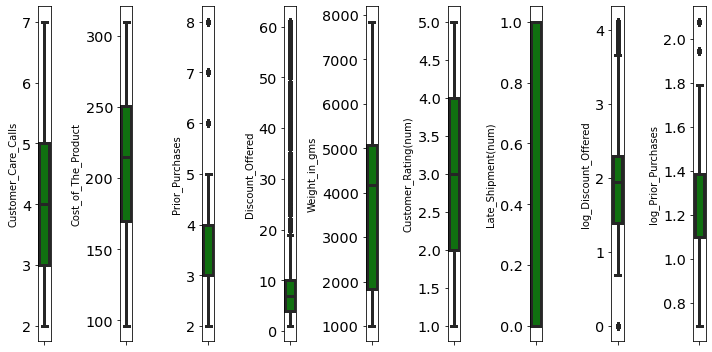

In [ ]:
#boxplot
features = number
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_outlierhandling[features[i]], color='green', orient='v')
  plt.tight_layout()

In [ ]:
#menghilangkan outliers pada log_Prior_Purchases menggunakan batas atas dan bawah IQR
Q1 = df_outlierhandling['log_Prior_Purchases'].quantile(0.25)
Q3 = df_outlierhandling['log_Prior_Purchases'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df_outlierhandling['log_Prior_Purchases'] >= low_limit) 
                        & (df_outlierhandling['log_Prior_Purchases'] <= high_limit))
df_outlierhandling = df_outlierhandling[filtered_entries]

In [ ]:
df_outlierhandling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10386 entries, 0 to 10998
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10386 non-null  int64  
 1   Warehouse_Block           10386 non-null  object 
 2   Mode_of_Shipment          10386 non-null  object 
 3   Customer_Care_Calls       10386 non-null  int64  
 4   Customer_Rating(num)      10386 non-null  int64  
 5   Cost_of_The_Product       10386 non-null  int64  
 6   Prior_Purchases           10386 non-null  int64  
 7   Product_Importance        10386 non-null  object 
 8   Gender                    10386 non-null  object 
 9   Discount_Offered          10386 non-null  int64  
 10  Weight_in_gms             10386 non-null  int64  
 11  Late_Shipment(num)        10386 non-null  int64  
 12  Customer_Rating(cat)      10386 non-null  object 
 13  Late_Shipment(cat)        10386 non-null  object 
 14  Gender

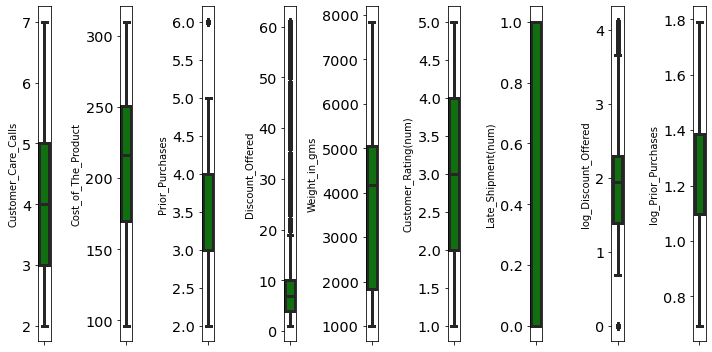

In [ ]:
#boxplot
features = number
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_outlierhandling[features[i]], color='green', orient='v')
  plt.tight_layout()

In [ ]:
#menghilangkan outliers pada log_Discount_Offered menggunakan batas atas dan bawah IQR
Q11 = df_outlierhandling['log_Discount_Offered'].quantile(0.25)
Q31 = df_outlierhandling['log_Discount_Offered'].quantile(0.75)
IQR1 = Q31-Q11
low_limit1 = Q11 - (1.5*IQR1)
high_limit1 = Q31 + (1.5*IQR1)
filtered_entries = ((df_outlierhandling['log_Discount_Offered'] >= low_limit) 
                        & (df_outlierhandling['log_Discount_Offered'] <= high_limit))
df_outlierhandling = df_outlierhandling[filtered_entries]

In [ ]:
df_outlierhandling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4033 entries, 6 to 10998
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        4033 non-null   int64  
 1   Warehouse_Block           4033 non-null   object 
 2   Mode_of_Shipment          4033 non-null   object 
 3   Customer_Care_Calls       4033 non-null   int64  
 4   Customer_Rating(num)      4033 non-null   int64  
 5   Cost_of_The_Product       4033 non-null   int64  
 6   Prior_Purchases           4033 non-null   int64  
 7   Product_Importance        4033 non-null   object 
 8   Gender                    4033 non-null   object 
 9   Discount_Offered          4033 non-null   int64  
 10  Weight_in_gms             4033 non-null   int64  
 11  Late_Shipment(num)        4033 non-null   int64  
 12  Customer_Rating(cat)      4033 non-null   object 
 13  Late_Shipment(cat)        4033 non-null   object 
 14  Gender(

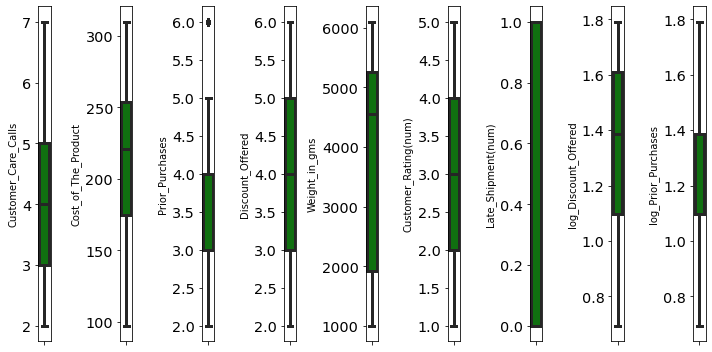

In [ ]:
#boxplot
features = number
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_outlierhandling[features[i]], color='green', orient='v')
  plt.tight_layout()

# Final Project - Stage 3
## Modelling Experiments - Data Set E-Commerce Shipping
## Group 8 : Decentraland
**Group Member:**
- Dharma Setiawan
- Ilham Ibnu A.
- M. Farhan Atmawinanda
- Fikri Diva S.
- Ahmad Ilham H.

Keterangan target data ecommerce shipping:

0: On time

1: Late

=========================

metrics evaluation yang ingin digunakan:

**MAIN:**
**ROC-AUC**, dikarenakan skor matriks ROC-AUC sudah mengakomodir false positive dan false negative, dua nilai penduga yang ingin kami minimalisir nilainya. Selain itu, karakteristik ROC-AUC yang robust terhadap imbalance juga cocok dengan sebaran label target (Late Shipment) kami yang sedikit imbalance (59%-41%) 

**SECONDARY:**
**Precission, Recall, dan Average Precision**

In [5]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , roc_curve, auc, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [198]:
url_dataset = "https://raw.githubusercontent.com/Decentraland-Team-Final-Project/Report-Final-Project-/main/Dataset/E-Commerce%20Shipping%20Data.csv"
df_shipping = pd.read_csv(url_dataset)
df_shipping.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [199]:
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [200]:
#Rename variabel lama (agar rapih dan seragam)
df_shipping = df_shipping.rename(columns = { 'Warehouse_block' : 'Warehouse',
                                             'Mode_of_Shipment' : 'Shipment',
                                             'Customer_care_calls' : 'Calls',
                                             'Customer_rating' : 'Rating',
                                             'Cost_of_the_Product' : 'Cost',
                                             'Prior_purchases' : 'Purchases',
                                             'Product_importance' : 'Importance',
                                             'Discount_offered' : 'Discount',
                                            'Weight_in_gms': 'Weight (gram)',
                                            'Reached.on.Time_Y.N': 'Late'})

In [201]:
# membagi data berdasarkan type datanya
df_shipping.drop(columns="ID", inplace=True)
category = df_shipping.select_dtypes(include='object')
numerical = df_shipping.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['Calls', 'Rating', 'Cost', 'Purchases', 'Discount', 'Weight (gram)', 'Late']
Data category:  ['Warehouse', 'Shipment', 'Importance', 'Gender']


In [202]:
df_shipping[numerical_cols].describe()

Calls        Rating          Cost     Purchases      Discount  \
count  10999.000000  10999.000000  10999.000000  10999.000000  10999.000000   
mean       4.054459      2.990545    210.196836      3.567597     13.373216   
std        1.141490      1.413603     48.063272      1.522860     16.205527   
min        2.000000      1.000000     96.000000      2.000000      1.000000   
25%        3.000000      2.000000    169.000000      3.000000      4.000000   
50%        4.000000      3.000000    214.000000      3.000000      7.000000   
75%        5.000000      4.000000    251.000000      4.000000     10.000000   
max        7.000000      5.000000    310.000000     10.000000     65.000000   

       Weight (gram)          Late  
count   10999.000000  10999.000000  
mean     3634.016729      0.596691  
std      1635.377251      0.490584  
min      1001.000000      0.000000  
25%      1839.500000      0.000000  
50%      4149.000000      1.000000  
75%      5050.000000      1.000000  
max      7846.000000      1.000000

In [203]:
df_shipping[category_cols].describe()

Warehouse Shipment Importance Gender
count      10999    10999      10999  10999
unique         5        3          3      2
top            F     Ship        low      F
freq        3666     7462       5297   5545

In [204]:
for column in category_cols:
  print(f'value counts of column {column}')
  print(df_shipping[column].value_counts())
  print('---'*10, '\n')

value counts of column Warehouse
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse, dtype: int64
------------------------------ 

value counts of column Shipment
Ship      7462
Flight    1777
Road      1760
Name: Shipment, dtype: int64
------------------------------ 

value counts of column Importance
low       5297
medium    4754
high       948
Name: Importance, dtype: int64
------------------------------ 

value counts of column Gender
F    5545
M    5454
Name: Gender, dtype: int64
------------------------------ 



## Label Encoding

In [205]:
#Label encoding
mapping_gender = {
    'F' : 0,
    'M' : 1
}

mapping_product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}

df_shipping['Gender(num)'] = df_shipping['Gender'].map(mapping_gender)
df_shipping['Product_Importance(num)'] = df_shipping['Importance'].map(mapping_product_importance)

In [206]:
df_shipping.drop(columns=["Gender", "Importance"], inplace=True)

In [207]:
df_shipping.head()

Warehouse Shipment  Calls  Rating  Cost  Purchases  Discount  Weight (gram)  \
0         D   Flight      4       2   177          3        44           1233   
1         F   Flight      4       5   216          2        59           3088   
2         A   Flight      2       2   183          4        48           3374   
3         B   Flight      3       3   176          4        10           1177   
4         C   Flight      2       2   184          3        46           2484   

   Late  Gender(num)  Product_Importance(num)  
0     1            0                        0  
1     1            1                        0  
2     1            1                        0  
3     1            1                        1  
4     1            0                        1

## One Hot Encoding

In [208]:
for cat in ['Warehouse', 'Shipment']:
    onehots = pd.get_dummies(df_shipping[cat], prefix=cat)
    df_shipping = df_shipping.join(onehots)

In [209]:
df_shipping.drop(columns=["Warehouse", "Shipment", "Rating"], inplace=True)

In [210]:
df_shipping.head()

Calls  Cost  Purchases  Discount  Weight (gram)  Late  Gender(num)  \
0      4   177          3        44           1233     1            0   
1      4   216          2        59           3088     1            1   
2      2   183          4        48           3374     1            1   
3      3   176          4        10           1177     1            1   
4      2   184          3        46           2484     1            0   

   Product_Importance(num)  Warehouse_A  Warehouse_B  Warehouse_C  \
0                        0            0            0            0   
1                        0            0            0            0   
2                        0            1            0            0   
3                        1            0            1            0   
4                        1            0            0            1   

   Warehouse_D  Warehouse_F  Shipment_Flight  Shipment_Road  Shipment_Ship  
0            1            0                1              0              0  
1            0            1                1              0              0  
2            0            0                1              0              0  
3            0            0                1              0              0  
4            0            0                1              0              0

In [211]:
# hapus warehouse block f dan mode of shipment ship dikarenakan nilai tersebut memiliki multikolinearitas yang tinggi
df_shipping.drop(columns=["Warehouse_F", "Shipment_Ship"], inplace=True)

In [212]:
df_shipping.head()

Calls  Cost  Purchases  Discount  Weight (gram)  Late  Gender(num)  \
0      4   177          3        44           1233     1            0   
1      4   216          2        59           3088     1            1   
2      2   183          4        48           3374     1            1   
3      3   176          4        10           1177     1            1   
4      2   184          3        46           2484     1            0   

   Product_Importance(num)  Warehouse_A  Warehouse_B  Warehouse_C  \
0                        0            0            0            0   
1                        0            0            0            0   
2                        0            1            0            0   
3                        1            0            1            0   
4                        1            0            0            1   

   Warehouse_D  Shipment_Flight  Shipment_Road  
0            1                1              0  
1            0                1              0  
2            0                1              0  
3            0                1              0  
4            0                1              0

In [213]:
# hapus Gender
df_shipping.drop(columns="Gender(num)", inplace=True)

In [214]:
df_shipping.describe()

Calls          Cost     Purchases      Discount  Weight (gram)  \
count  10999.000000  10999.000000  10999.000000  10999.000000   10999.000000   
mean       4.054459    210.196836      3.567597     13.373216    3634.016729   
std        1.141490     48.063272      1.522860     16.205527    1635.377251   
min        2.000000     96.000000      2.000000      1.000000    1001.000000   
25%        3.000000    169.000000      3.000000      4.000000    1839.500000   
50%        4.000000    214.000000      3.000000      7.000000    4149.000000   
75%        5.000000    251.000000      4.000000     10.000000    5050.000000   
max        7.000000    310.000000     10.000000     65.000000    7846.000000   

               Late  Product_Importance(num)   Warehouse_A   Warehouse_B  \
count  10999.000000             10999.000000  10999.000000  10999.000000   
mean       0.596691                 0.604600      0.166652      0.166652   
std        0.490584                 0.641464      0.372681      0.372681   
min        0.000000                 0.000000      0.000000      0.000000   
25%        0.000000                 0.000000      0.000000      0.000000   
50%        1.000000                 1.000000      0.000000      0.000000   
75%        1.000000                 1.000000      0.000000      0.000000   
max        1.000000                 2.000000      1.000000      1.000000   

        Warehouse_C   Warehouse_D  Shipment_Flight  Shipment_Road  
count  10999.000000  10999.000000     10999.000000   10999.000000  
mean       0.166652      0.166742         0.161560       0.160015  
std        0.372681      0.372763         0.368064       0.366636  
min        0.000000      0.000000         0.000000       0.000000  
25%        0.000000      0.000000         0.000000       0.000000  
50%        0.000000      0.000000         0.000000       0.000000  
75%        0.000000      0.000000         0.000000       0.000000  
max        1.000000      1.000000         1.000000       1.000000

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

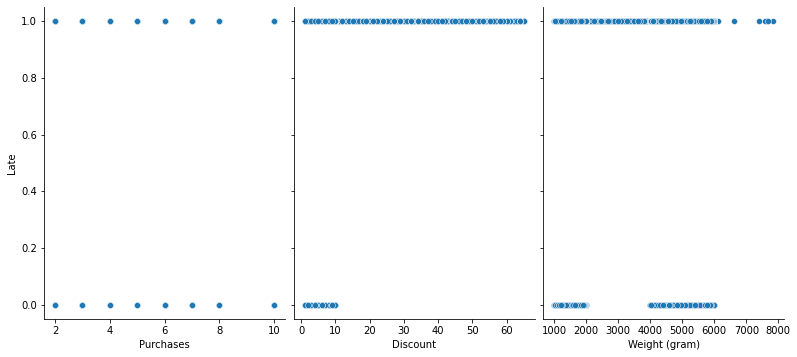

In [215]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df_shipping, x_vars=['Purchases', 'Discount', 'Weight (gram)'], y_vars=['Late'], size=5, aspect=0.75)

# 1. Data asli tanpa remove outlier

In [216]:
dfori = df_shipping.copy()

dfori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Calls                    10999 non-null  int64
 1   Cost                     10999 non-null  int64
 2   Purchases                10999 non-null  int64
 3   Discount                 10999 non-null  int64
 4   Weight (gram)            10999 non-null  int64
 5   Late                     10999 non-null  int64
 6   Product_Importance(num)  10999 non-null  int64
 7   Warehouse_A              10999 non-null  uint8
 8   Warehouse_B              10999 non-null  uint8
 9   Warehouse_C              10999 non-null  uint8
 10  Warehouse_D              10999 non-null  uint8
 11  Shipment_Flight          10999 non-null  uint8
 12  Shipment_Road            10999 non-null  uint8
dtypes: int64(7), uint8(6)
memory usage: 666.1 KB


In [24]:
#model evaluation automatization function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score #import evaluation matrix from sklearn

def eval_classification(model, Xtrain, Ytrain, Xtest, Ytest):                 #define a model evaluation function
    print("Test Data Evaluation:")
    Ypred = model.predict(Xtest)                                              #predict Y using testing data
    print("Accuracy (Test Set): %.3f" % accuracy_score(Ytest, Ypred))         #accuracy score
    print("Precision (Test Set): %.3f" % precision_score(Ytest, Ypred))       #precision score
    print("Recall (Test Set): %.3f" % recall_score(Ytest, Ypred))             #recall score
    print("F1-Score (Test Set): %.3f" % f1_score(Ytest, Ypred))               #f1 score
    
    Ypred_proba = model.predict_proba(Xtest)                                                          #predict Y (probability) using testing data 
    print("AUC (Test Set) : %.3f" % roc_auc_score(Ytest, Ypred_proba[:, 1]))                          #roc auc score
    print("Average Precision (Test Set) : %.3f" % average_precision_score(Ytest, Ypred_proba[:, 1]))  #average precision score
    print(" ")
    
    print("Train Data Evaluation:")
    Ypred_train = model.predict(Xtrain)                                          #predict Y using training data
    print("Accuracy (Train Set): %.3f" % accuracy_score(Ytrain, Ypred_train))    #accuracy score
    print("Precision (Train Set): %.3f" % precision_score(Ytrain, Ypred_train))  #precision score
    print("Recall (Train Set): %.3f" % recall_score(Ytrain, Ypred_train))        #recall score
    print("F1-Score (Train Set): %.3f" % f1_score(Ytrain, Ypred_train))          #f1 score
    
    Ypred_train_proba = model.predict_proba(Xtrain)                                                            #predict Y (probability) using training data
    print("AUC (Train Set) : %.3f" % roc_auc_score(Ytrain, Ypred_train_proba[:, 1]))                           #roc auc score
    print("Average Precision (Train Set) : %.3f" % average_precision_score(Ytrain, Ypred_train_proba[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [25]:
# Splitting Features & Target
xlr1 = dfori.drop(columns = ['Late']) # Features
ylr1 = dfori['Late'] # Target

# Splitting Data Train & Data Test
xlrtrain1, xlrtest1, ylrtrain1, ylrtest1 = train_test_split(xlr1, ylr1, test_size = 0.3, random_state = 33)

## Logistic Regression

In [26]:
# Modeling
modelLR1 = LogisticRegression(random_state=33)
modelLR1.fit(xlrtrain1, ylrtrain1)

LogisticRegression(random_state=33)

In [27]:
# Model Prediction
y_pred_trainLR1 = modelLR1.predict(xlrtrain1)
y_pred_trainLR1

array([0, 1, 1, ..., 1, 1, 0])

In [28]:
y_predLR1 = modelLR1.predict(xlrtest1)
y_predLR1

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
# Model Prediction Probability
modelLR1.predict_proba(xlrtest1)

array([[0.54125156, 0.45874844],
       [0.66966045, 0.33033955],
       [0.66833145, 0.33166855],
       ...,
       [0.51056447, 0.48943553],
       [0.51072755, 0.48927245],
       [0.56866034, 0.43133966]])

In [30]:
# Model Evaluation
eval_classification(modelLR1, xlrtrain1, ylrtrain1, xlrtest1, ylrtest1)

Test Data Evaluation:
Accuracy (Test Set): 0.646
Precision (Test Set): 0.711
Recall (Test Set): 0.698
F1-Score (Test Set): 0.704
AUC (Test Set) : 0.735
Average Precision (Test Set) : 0.850
 
Train Data Evaluation:
Accuracy (Train Set): 0.623
Precision (Train Set): 0.691
Recall (Train Set): 0.659
F1-Score (Train Set): 0.674
AUC (Train Set) : 0.707
Average Precision (Train Set) : 0.826


In [31]:
# Model Validation Average Precision
print('AP test score : ',average_precision_score(ylrtest1, y_predLR1))
print('AP train score : ',average_precision_score(ylrtrain1, y_pred_trainLR1))

AP test score :  0.6786773752563227
AP train score :  0.6576182319351164


In [32]:
# Model Validation Accuracy
print('train Accuracy : ',modelLR1.score(xlrtrain1, ylrtrain1))
print('test Accuracy : ',modelLR1.score(xlrtest1, ylrtest1))

train Accuracy :  0.6226782699051825
test Accuracy :  0.6457575757575758


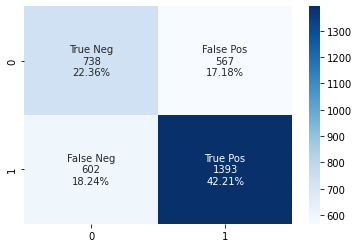

In [33]:
# Confusion Matrix
cf_matrixa = confusion_matrix(ylrtest1, y_predLR1)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

AP : 0.679


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.68')

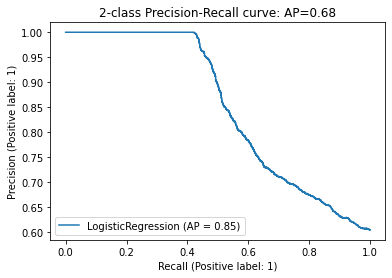

In [34]:
# Average Precision Plot
average_precision = average_precision_score(ylrtest1, y_predLR1)
print('AP : %.3f'% average_precision)

disp = plot_precision_recall_curve(modelLR1, xlrtest1, ylrtest1)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [35]:
# Logistic Regression Intercept
print(modelLR1.intercept_)

[0.06008549]


In [36]:
# Logistic Regression Coefficient
print(modelLR1.coef_)

[[-0.05969999  0.00027501 -0.03051536  0.11918164 -0.00014985  0.05256343
   0.13528986 -0.00180844  0.02127934  0.00643922  0.01198634  0.02452206
   0.00844027]]


In [37]:
# Logistic Regression Coefficient Table
koef2={'Feature':['Calls', 'Rating', 'Cost', 'Purchase', 'Importance', 'Gender','Discount',
       'Weight','Warehouse_A', 'Warehouse_B', 'Warehouse_C',
       'Warehouse_D', 'Warehouse_F', 'Shipment_Flight', 'Shipment_Road',
       'Shipment_Ship'],
     'Coefficient':[-5.59874633e-01 , 1.07227510e-01, -4.16402236e-01, -5.89193486e-01,
   2.09167717e-01, -3.19677572e-02 , 6.34152939e+00 ,-1.59915957e+00,
  -2.79614790e-02  ,2.35711612e-02, -4.61884188e-03 , 4.85396819e-03,
   3.80010177e-03 , 2.21622610e-02, -8.01170261e-03, -1.45056481e-02] }
koef_table=pd.DataFrame.from_dict(koef2).sort_values(by=['Coefficient'],ascending=False).reset_index(drop=True)
koef_table

Feature  Coefficient
0          Discount     6.341529
1        Importance     0.209168
2            Rating     0.107228
3       Warehouse_B     0.023571
4   Shipment_Flight     0.022162
5       Warehouse_D     0.004854
6       Warehouse_F     0.003800
7       Warehouse_C    -0.004619
8     Shipment_Road    -0.008012
9     Shipment_Ship    -0.014506
10      Warehouse_A    -0.027961
11           Gender    -0.031968
12             Cost    -0.416402
13            Calls    -0.559875
14         Purchase    -0.589193
15           Weight    -1.599160

## Tuning Hyperparameter Logistic Regression

In [38]:
# Splitting Features & Target
xlr1 = dfori.drop(columns = ['Late']) # Features
ylr1 = dfori['Late'] # Target

# Splitting Data Train & Data Test
xlrtrain1, xlrtest1, ylrtrain1, ylrtest1 = train_test_split(xlr1, ylr1, test_size = 0.3, random_state = 33)

In [39]:
#Tuning hyperparameter
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1','l2']
C = [0.0001,0.001,0.002]
hyperparams = dict(penalty = penalty, C=C)

lr = LogisticRegression()
rs = RandomizedSearchCV(lr, hyperparams, cv=5,random_state=42, scoring='roc_auc')
rs.fit(xlrtrain1,ylrtrain1)
y_pred = rs.predict(xlrtest1)
y_pred_proba = rs.predict_proba(xlrtest1)

# Model Evaluation
eval_classification(rs, xlrtrain1, ylrtrain1, xlrtest1, ylrtest1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test Data Evaluation:
Accuracy (Test Set): 0.646
Precision (Test Set): 0.709
Recall (Test Set): 0.701
F1-Score (Test Set): 0.705
AUC (Test Set) : 0.735
Average Precision (Test Set) : 0.849
 
Train Data Evaluation:
Accuracy (Train Set): 0.627
Precision (Train Set): 0.693
Recall (Train Set): 0.666
F1-Score (Train Set): 0.679
AUC (Train Set) : 0.707
Average Precision (Train Set) : 0.826


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

## KNN

In [40]:
# train test split
xk1 = dfori.drop(columns="Late")
yk1 = dfori['Late']
xktrain1, xktest1, yktrain1, yktest1 = train_test_split(xk1, yk1, test_size=0.3, random_state=42)
print("training: ", xktrain1.shape[0])
print("testing: ", yktest1.shape[0])

training:  7699
testing:  3300


In [41]:
from sklearn.neighbors import KNeighborsClassifier  #import knn from sklearn
knn = KNeighborsClassifier()                        #initialize algorithm with specified name model
knn.fit(xktrain1, yktrain1)                           #fit algorithm with train data
eval_classification(knn, xktrain1, yktrain1, xktest1, yktest1)

Test Data Evaluation:
Accuracy (Test Set): 0.649
Precision (Test Set): 0.724
Recall (Test Set): 0.673
F1-Score (Test Set): 0.698
AUC (Test Set) : 0.730
Average Precision (Test Set) : 0.815
 
Train Data Evaluation:
Accuracy (Train Set): 0.782
Precision (Train Set): 0.834
Recall (Train Set): 0.789
F1-Score (Train Set): 0.811
AUC (Train Set) : 0.867
Average Precision (Train Set) : 0.895


## Tuning Hyperparameter KNN

In [42]:
# train test split
xk1 = dfori.drop(columns="Late")
yk1 = dfori['Late']
xktrain1, xktest1, yktrain1, yktest1 = train_test_split(xk1, yk1, test_size=0.3, random_state=42)
print("training: ", xktrain1.shape[0])
print("testing: ", yktest1.shape[0])

training:  7699
testing:  3300


In [43]:
#list of hyperparameter
n_neighbors = list(range(1,51))
p=[1,2,3]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

#init model
knn_model = KNeighborsClassifier()
knn_model_tun = RandomizedSearchCV(knn_model, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

#fit model & evaluation
knn_model_tun.fit(xktrain1, yktrain1)
eval_classification(knn_model_tun, xktrain1, yktrain1, xktest1, yktest1)


Test Data Evaluation:
Accuracy (Test Set): 0.658
Precision (Test Set): 0.759
Recall (Test Set): 0.634
F1-Score (Test Set): 0.691
AUC (Test Set) : 0.748
Average Precision (Test Set) : 0.858
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [44]:
# best param
knn_model_tun.best_params_

{'algorithm': 'auto', 'n_neighbors': 21, 'p': 1, 'weights': 'distance'}

In [45]:
y_pred = knn_model_tun.predict(xktest1)

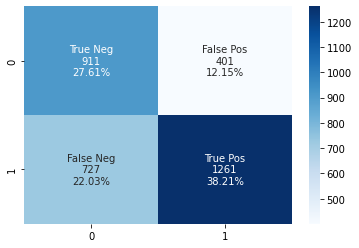

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(yktest1, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

## Decision Tree

In [47]:
# train test split
X = dfori.drop(columns="Late")
y = dfori['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  7699
testing:  3300


In [48]:
from sklearn.tree import DecisionTreeClassifier       #import decision tree from sklearn
dt = DecisionTreeClassifier(random_state=42)     #initialize algorithm with specified name model
dt.fit(X_train, y_train)                         #fit algorithm with train data
eval_classification(dt, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.654
Precision (Test Set): 0.712
Recall (Test Set): 0.716
F1-Score (Test Set): 0.714
AUC (Test Set) : 0.638
Average Precision (Test Set) : 0.681
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


## Tuning Hyperparmater Decision Tree

In [49]:
# train test split
X = dfori.drop(columns="Late")
y = dfori['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  7699
testing:  3300


In [50]:
#list of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] #maximum number of levels in tree
min_samples_split = [2, 5, 10, 100, 200] #minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50, 100] #minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2'] #number of features to consider at every split
criterion = ['gini', 'entropy'] #the function to measure the quality of a split
splitter = ['best', 'random'] #the strategy used to choose the split at each node

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )


In [51]:
#initiate model
dt = DecisionTreeClassifier(random_state=42)
dt_tun = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
dt_tun.fit(X_train, y_train) #fit model

eval_classification(dt_tun, X_train, y_train, X_test, y_test)


Test Data Evaluation:
Accuracy (Test Set): 0.658
Precision (Test Set): 0.754
Recall (Test Set): 0.641
F1-Score (Test Set): 0.693
AUC (Test Set) : 0.732
Average Precision (Test Set) : 0.848
 
Train Data Evaluation:
Accuracy (Train Set): 0.719
Precision (Train Set): 0.813
Recall (Train Set): 0.684
F1-Score (Train Set): 0.743
AUC (Train Set) : 0.808
Average Precision (Train Set) : 0.883


In [52]:
dt_tun.best_params_

{'criterion': 'gini',
 'max_depth': 79,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 100,
 'splitter': 'best'}

In [53]:
y_pred = dt_tun.predict(X_test)

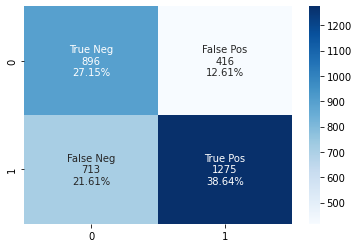

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(yktest1, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

## XGBoost

In [55]:
# Splitting Features & Target
xlr2 = dfori.drop(columns = ['Late']) # Features
ylr2 = dfori['Late'] # Target

# Splitting data Train & data Test
xltrain2, xltest2, yltrain2, yltest2 = train_test_split(xlr2, ylr2, test_size = 0.3, random_state = 3)

In [56]:
model_xg = XGBClassifier(random_state = 42)
model_xg.fit(xltrain2,yltrain2)
eval_classification(model_xg, xltrain2, yltrain2, xltest2, yltest2)

Test Data Evaluation:
Accuracy (Test Set): 0.685
Precision (Test Set): 0.862
Recall (Test Set): 0.552
F1-Score (Test Set): 0.673
AUC (Test Set) : 0.738
Average Precision (Test Set) : 0.849
 
Train Data Evaluation:
Accuracy (Train Set): 0.706
Precision (Train Set): 0.890
Recall (Train Set): 0.582
F1-Score (Train Set): 0.704
AUC (Train Set) : 0.799
Average Precision (Train Set) : 0.884


## Tuning Hyperparameter XGBoost

In [57]:
# Splitting Features & Target
xl3 = dfori.drop(columns = ['Late'])
yl3 = dfori['Late']

# Splitting Data Train & Data Test
xltrain3, xltest3, yltrain3, yltest3 = train_test_split(xl3, yl3, test_size = 0.3, random_state = 42)

In [58]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
xg_tuned.fit(xltrain3,yltrain3)
eval_classification(xg_tuned, xltrain3, yltrain3, xltest3, yltest3)

Test Data Evaluation:
Accuracy (Test Set): 0.665
Precision (Test Set): 0.781
Recall (Test Set): 0.615
F1-Score (Test Set): 0.688
AUC (Test Set) : 0.739
Average Precision (Test Set) : 0.855
 
Train Data Evaluation:
Accuracy (Train Set): 0.757
Precision (Train Set): 0.878
Recall (Train Set): 0.686
F1-Score (Train Set): 0.770
AUC (Train Set) : 0.852
Average Precision (Train Set) : 0.910


In [59]:
# best param
xg_tuned.best_params_

{'alpha': 0.8,
 'colsample_bytree': 0.30000000000000004,
 'eta': 0.33333333333333337,
 'gamma': 0.5,
 'lambda': 0.8,
 'max_depth': 50,
 'min_child_weight': 18,
 'tree_method': 'approx'}

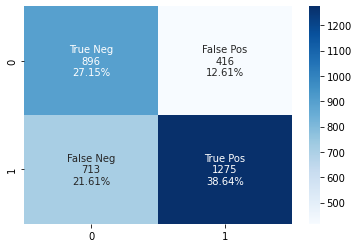

In [60]:
y_pred = dt_tun.predict(xltest3)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(yltest3, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

## AdaBoost

In [61]:
# train test split
X = dfori.drop(columns="Late")
y = dfori['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])


training:  7699
testing:  3300


In [62]:
model_ab = AdaBoostClassifier()
model_ab.fit(X_train,y_train)
eval_classification(model_ab, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.682
Precision (Test Set): 0.868
Recall (Test Set): 0.558
F1-Score (Test Set): 0.679
AUC (Test Set) : 0.750
Average Precision (Test Set) : 0.858
 
Train Data Evaluation:
Accuracy (Train Set): 0.693
Precision (Train Set): 0.878
Recall (Train Set): 0.561
F1-Score (Train Set): 0.685
AUC (Train Set) : 0.761
Average Precision (Train Set) : 0.859


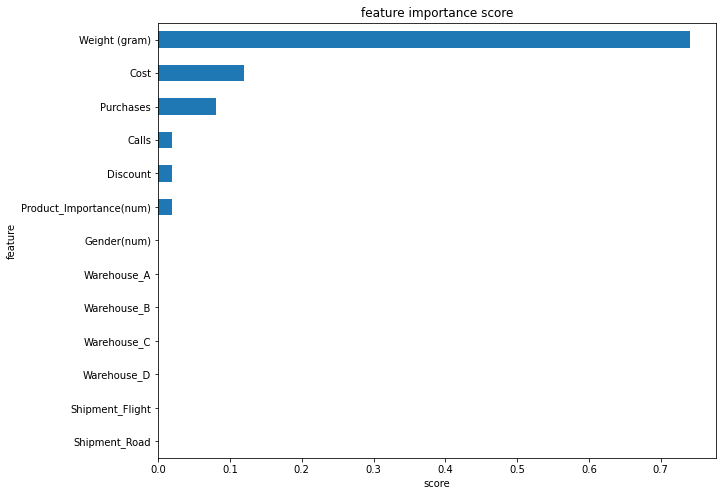

In [63]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

show_feature_importance(model_ab)

## Tuning Hyperparameter AdaBoost

In [64]:
# train test split
X = dfori.drop(columns="Late")
y = dfori['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  7699
testing:  3300


In [65]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

In [66]:
# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
ab_tuned.fit(X_train,y_train)
eval_classification(ab_tuned, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.678
Precision (Test Set): 0.805
Recall (Test Set): 0.615
F1-Score (Test Set): 0.697
AUC (Test Set) : 0.747
Average Precision (Test Set) : 0.852
 
Train Data Evaluation:
Accuracy (Train Set): 0.678
Precision (Train Set): 0.796
Recall (Train Set): 0.616
F1-Score (Train Set): 0.695
AUC (Train Set) : 0.753
Average Precision (Train Set) : 0.851


In [67]:
# best param
ab_tuned.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.08358291457286432,
 'n_estimators': 225}

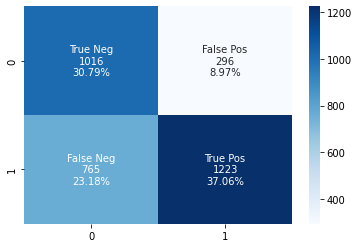

In [68]:
y_pred = ab_tuned.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

## Random Forest

In [69]:
# Splitting Features & Target
xr4 = dfori.drop(columns = ['Late'])
yr4 = dfori['Late']

# Splitting Data Train & Data Test
xrtrain4, xrtest4, yrtrain4, yrtest4 = train_test_split(xr4, yr4, test_size = 0.3, random_state = 10)

In [70]:
# Evaluation Metrics
RFr4 = RandomForestClassifier(random_state = 42)
RFr4.fit(xrtrain4, yrtrain4)
predictionr4 = RFr4.predict(xrtest4)
eval_classification(RFr4, xrtrain4, yrtrain4, xrtest4, yrtest4)

Test Data Evaluation:
Accuracy (Test Set): 0.660
Precision (Test Set): 0.750
Recall (Test Set): 0.648
F1-Score (Test Set): 0.696
AUC (Test Set) : 0.739
Average Precision (Test Set) : 0.852
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


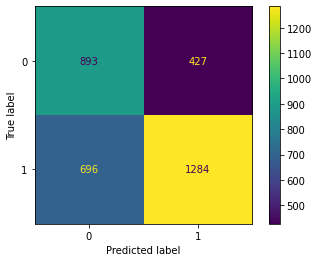

In [71]:
# Confusion Matrix
plot_confusion_matrix(RFr4, xrtest4, yrtest4)
plt.grid(False)
plt.show() 

## Tuning Hyperparameter Random Forest

In [72]:
# Splitting Features & Target
xr4 = dfori.drop(columns = ['Late'])
yr4 = dfori['Late']

# Splitting Data Train & Data Test
xrtrain4, xrtest4, yrtrain4, yrtest4 = train_test_split(xr4, yr4, test_size = 0.3, random_state = 10)

In [73]:
hyperparameters_rf = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], #the number of features to consider when looking for the best split
                       n_jobs = [-1] #the number of jobs to run in parallel computation. -1 means using all processors
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters_rf, cv=5, random_state=42, scoring='roc_auc')
rf_tuned.fit(xrtrain4,yrtrain4)
eval_classification(rf_tuned, xrtrain4, yrtrain4, xrtest4, yrtest4)


Test Data Evaluation:
Accuracy (Test Set): 0.676
Precision (Test Set): 0.866
Recall (Test Set): 0.544
F1-Score (Test Set): 0.668
AUC (Test Set) : 0.737
Average Precision (Test Set) : 0.853
 
Train Data Evaluation:
Accuracy (Train Set): 0.754
Precision (Train Set): 0.954
Recall (Train Set): 0.616
F1-Score (Train Set): 0.749
AUC (Train Set) : 0.912
Average Precision (Train Set) : 0.943


In [74]:
# best param
rf_tuned.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'n_estimators': 1100,
 'n_jobs': -1}

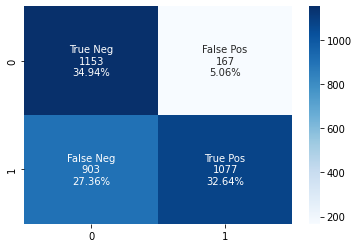

In [75]:
y_pred = rf_tuned.predict(xrtest4)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(yrtest4, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

# 2. Data dengan Log Transfirmation

In [76]:
df_log = df_shipping.copy()

df_log.head()

Calls  Cost  Purchases  Discount  Weight (gram)  Late  Gender(num)  \
0      4   177          3        44           1233     1            0   
1      4   216          2        59           3088     1            1   
2      2   183          4        48           3374     1            1   
3      3   176          4        10           1177     1            1   
4      2   184          3        46           2484     1            0   

   Product_Importance(num)  Warehouse_A  Warehouse_B  Warehouse_C  \
0                        0            0            0            0   
1                        0            0            0            0   
2                        0            1            0            0   
3                        1            0            1            0   
4                        1            0            0            1   

   Warehouse_D  Shipment_Flight  Shipment_Road  
0            1                1              0  
1            0                1              0  
2            0                1              0  
3            0                1              0  
4            0                1              0

In [77]:
#tranformasi log
df_log['log_Discount_Offered'] = np.log(df_shipping['Discount'])
df_log['log_Prior_Purchases'] = np.log(df_shipping['Purchases'])

In [78]:
df_log[{'Discount', 'log_Discount_Offered', 'Purchases', 'log_Prior_Purchases'}].describe()

log_Prior_Purchases  log_Discount_Offered      Discount     Purchases
count         10999.000000          10999.000000  10999.000000  10999.000000
mean              1.195669              1.998420     13.373216      3.567597
std               0.379769              1.083692     16.205527      1.522860
min               0.693147              0.000000      1.000000      2.000000
25%               1.098612              1.386294      4.000000      3.000000
50%               1.098612              1.945910      7.000000      3.000000
75%               1.386294              2.302585     10.000000      4.000000
max               2.302585              4.174387     65.000000     10.000000

In [79]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Calls                    10999 non-null  int64  
 1   Cost                     10999 non-null  int64  
 2   Purchases                10999 non-null  int64  
 3   Discount                 10999 non-null  int64  
 4   Weight (gram)            10999 non-null  int64  
 5   Late                     10999 non-null  int64  
 6   Gender(num)              10999 non-null  int64  
 7   Product_Importance(num)  10999 non-null  int64  
 8   Warehouse_A              10999 non-null  uint8  
 9   Warehouse_B              10999 non-null  uint8  
 10  Warehouse_C              10999 non-null  uint8  
 11  Warehouse_D              10999 non-null  uint8  
 12  Shipment_Flight          10999 non-null  uint8  
 13  Shipment_Road            10999 non-null  uint8  
 14  log_Discount_Offered  

In [89]:
#model evaluation automatization function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score #import evaluation matrix from sklearn

def eval_classification(model, Xtrain, Ytrain, Xtest, Ytest):                 #define a model evaluation function
    print("Test Data Evaluation:")
    Ypred = model.predict(Xtest)                                              #predict Y using testing data
    print("Accuracy (Test Set): %.3f" % accuracy_score(Ytest, Ypred))         #accuracy score
    print("Precision (Test Set): %.3f" % precision_score(Ytest, Ypred))       #precision score
    print("Recall (Test Set): %.3f" % recall_score(Ytest, Ypred))             #recall score
    print("F1-Score (Test Set): %.3f" % f1_score(Ytest, Ypred))               #f1 score
    
    Ypred_proba = model.predict_proba(Xtest)                                                          #predict Y (probability) using testing data 
    print("AUC (Test Set) : %.3f" % roc_auc_score(Ytest, Ypred_proba[:, 1]))                          #roc auc score
    print("Average Precision (Test Set) : %.3f" % average_precision_score(Ytest, Ypred_proba[:, 1]))  #average precision score
    print(" ")
    
    print("Train Data Evaluation:")
    Ypred_train = model.predict(Xtrain)                                          #predict Y using training data
    print("Accuracy (Train Set): %.3f" % accuracy_score(Ytrain, Ypred_train))    #accuracy score
    print("Precision (Train Set): %.3f" % precision_score(Ytrain, Ypred_train))  #precision score
    print("Recall (Train Set): %.3f" % recall_score(Ytrain, Ypred_train))        #recall score
    print("F1-Score (Train Set): %.3f" % f1_score(Ytrain, Ypred_train))          #f1 score
    
    Ypred_train_proba = model.predict_proba(Xtrain)                                                            #predict Y (probability) using training data
    print("AUC (Train Set) : %.3f" % roc_auc_score(Ytrain, Ypred_train_proba[:, 1]))                           #roc auc score
    print("Average Precision (Train Set) : %.3f" % average_precision_score(Ytrain, Ypred_train_proba[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [81]:
df_log.columns

Index(['Calls', 'Cost', 'Purchases', 'Discount', 'Weight (gram)', 'Late',
       'Gender(num)', 'Product_Importance(num)', 'Warehouse_A', 'Warehouse_B',
       'Warehouse_C', 'Warehouse_D', 'Shipment_Flight', 'Shipment_Road',
       'log_Discount_Offered', 'log_Prior_Purchases'],
      dtype='object')

In [90]:
# Split Feature and Label
X = df_log.drop(columns=['Purchases','Discount','Late'])
y = df_log['Late'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [91]:
df_log.head()

Calls  Cost  Purchases  Discount  Weight (gram)  Late  Gender(num)  \
0      4   177          3        44           1233     1            0   
1      4   216          2        59           3088     1            1   
2      2   183          4        48           3374     1            1   
3      3   176          4        10           1177     1            1   
4      2   184          3        46           2484     1            0   

   Product_Importance(num)  Warehouse_A  Warehouse_B  Warehouse_C  \
0                        0            0            0            0   
1                        0            0            0            0   
2                        0            1            0            0   
3                        1            0            1            0   
4                        1            0            0            1   

   Warehouse_D  Shipment_Flight  Shipment_Road  log_Discount_Offered  \
0            1                1              0              3.784190   
1            0                1              0              4.077537   
2            0                1              0              3.871201   
3            0                1              0              2.302585   
4            0                1              0              3.828641   

   log_Prior_Purchases  
0             1.098612  
1             0.693147  
2             1.386294  
3             1.386294  
4             1.098612

## Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [93]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [94]:
model.predict_proba(X_test)

array([[0.129318  , 0.870682  ],
       [0.52516063, 0.47483937],
       [0.57678558, 0.42321442],
       ...,
       [0.37538917, 0.62461083],
       [0.21376114, 0.78623886],
       [0.4220758 , 0.5779242 ]])

In [95]:
y_pred_train = model.predict(X_train)
y_pred_train

array([1, 1, 1, ..., 0, 1, 0])

In [96]:
eval_classification(model, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.628
Precision (Test Set): 0.675
Recall (Test Set): 0.737
F1-Score (Test Set): 0.705
AUC (Test Set) : 0.715
Average Precision (Test Set) : 0.836
 
Train Data Evaluation:
Accuracy (Train Set): 0.631
Precision (Train Set): 0.674
Recall (Train Set): 0.733
F1-Score (Train Set): 0.702
AUC (Train Set) : 0.720
Average Precision (Train Set) : 0.836


## Hyperparameter Tuning

In [97]:
# Split Feature and Label
X = df_log.drop(columns=['Purchases','Discount','Late'])
y = df_log['Late'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [98]:
# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

Test Data Evaluation:
Accuracy (Test Set): 0.624
Precision (Test Set): 0.665
Recall (Test Set): 0.755
F1-Score (Test Set): 0.707
AUC (Test Set) : 0.717
Average Precision (Test Set) : 0.837
 
Train Data Evaluation:
Accuracy (Train Set): 0.633
Precision (Train Set): 0.665
Recall (Train Set): 0.769
F1-Score (Train Set): 0.713
AUC (Train Set) : 0.714
Average Precision (Train Set) : 0.830


In [99]:
y_pred_train = model.predict(X_train)
print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

Precision (Train Set): 0.67


In [100]:
print('Best penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 0.002


In [101]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.6654683065279092
Test score:0.6653368794326241


## Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.650
Precision (Test Set): 0.710
Recall (Test Set): 0.709
F1-Score (Test Set): 0.709
AUC (Test Set) : 0.635
Average Precision (Test Set) : 0.678
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [103]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.65


## Hyperparameter Tuning with RandomSearch

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.664
Precision (Test Set): 0.843
Recall (Test Set): 0.543
F1-Score (Test Set): 0.660
AUC (Test Set) : 0.739
Average Precision (Test Set) : 0.841
 
Train Data Evaluation:
Accuracy (Train Set): 0.693
Precision (Train Set): 0.887
Recall (Train Set): 0.553
F1-Score (Train Set): 0.681
AUC (Train Set) : 0.773
Average Precision (Train Set) : 0.859


In [105]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 8
Best min_samples_split: 5
Best min_samples_leaf: 1
Best max_features: sqrt


In [106]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.8865546218487395
Test score:0.84296875


Text(0.5, 1.0, 'feature importance score')

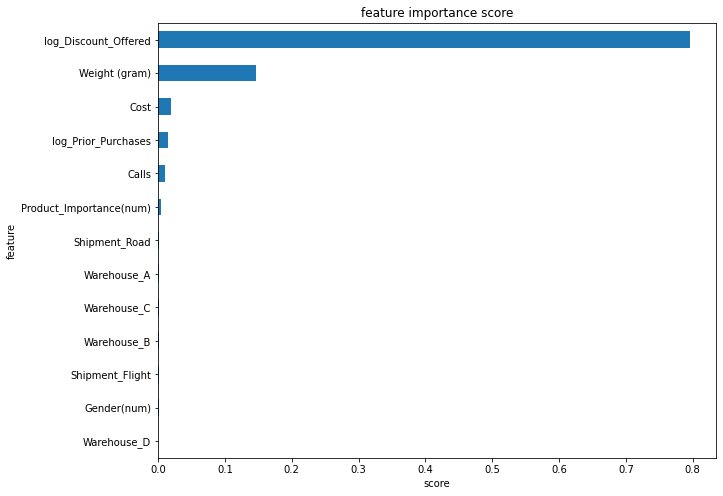

In [107]:
# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

## Random Forest

In [108]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
eval_classification(rf, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.664
Precision (Test Set): 0.757
Recall (Test Set): 0.650
F1-Score (Test Set): 0.700
AUC (Test Set) : 0.746
Average Precision (Test Set) : 0.856
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [109]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.8865546218487395
Test score:0.84296875


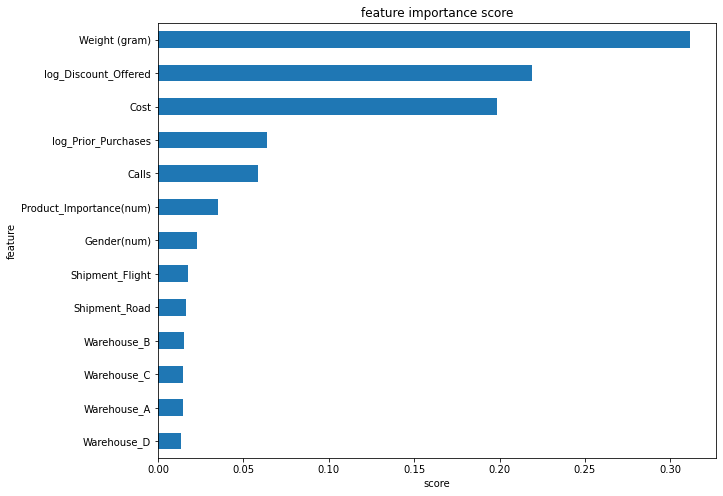

In [110]:
show_feature_importance(rf)

## Hyperparameter yang biasa di tuning pada Random Forest

In [111]:
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(rf_tuned, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.656
Precision (Test Set): 0.753
Recall (Test Set): 0.639
F1-Score (Test Set): 0.691
AUC (Test Set) : 0.745
Average Precision (Test Set) : 0.857
 
Train Data Evaluation:
Accuracy (Train Set): 0.999
Precision (Train Set): 0.999
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [112]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.8865546218487395
Test score:0.84296875


In [113]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


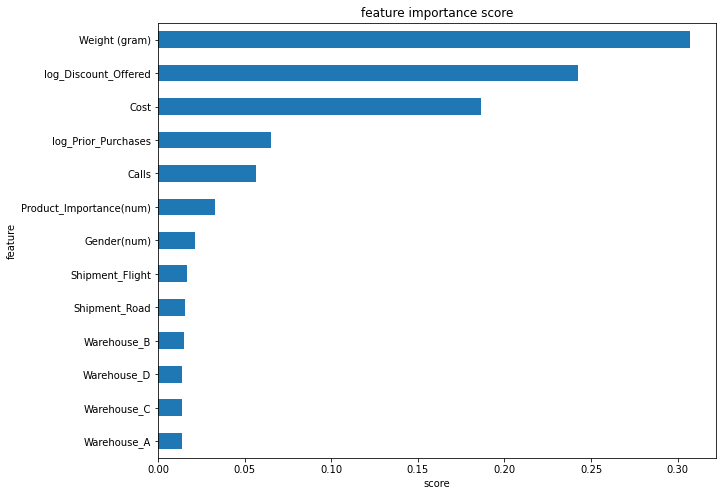

In [114]:
show_feature_importance(rf_tuned.best_estimator_)

## AdaBost

In [115]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)

eval_classification(ab, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.682
Precision (Test Set): 0.868
Recall (Test Set): 0.558
F1-Score (Test Set): 0.679
AUC (Test Set) : 0.750
Average Precision (Test Set) : 0.858
 
Train Data Evaluation:
Accuracy (Train Set): 0.693
Precision (Train Set): 0.878
Recall (Train Set): 0.561
F1-Score (Train Set): 0.685
AUC (Train Set) : 0.761
Average Precision (Train Set) : 0.859


In [116]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.8865546218487395
Test score:0.84296875


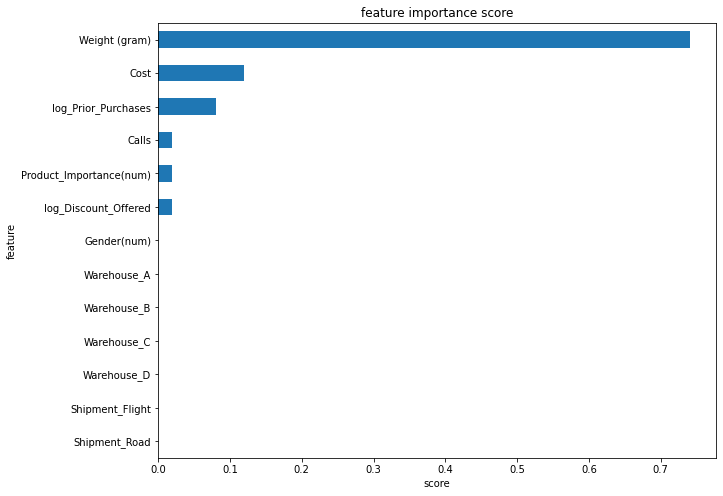

In [117]:
show_feature_importance(ab)

## Hyperparameter yang biasa di tuning pada Adaboost

In [118]:
# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ab_tuned, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.678
Precision (Test Set): 0.800
Recall (Test Set): 0.621
F1-Score (Test Set): 0.700
AUC (Test Set) : 0.743
Average Precision (Test Set) : 0.810
 
Train Data Evaluation:
Accuracy (Train Set): 0.670
Precision (Train Set): 0.780
Recall (Train Set): 0.620
F1-Score (Train Set): 0.691
AUC (Train Set) : 0.735
Average Precision (Train Set) : 0.801


In [119]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.8865546218487395
Test score:0.84296875


In [120]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1842
Best learning_rate: 0.09154271356783919
Best algorithm: SAMME


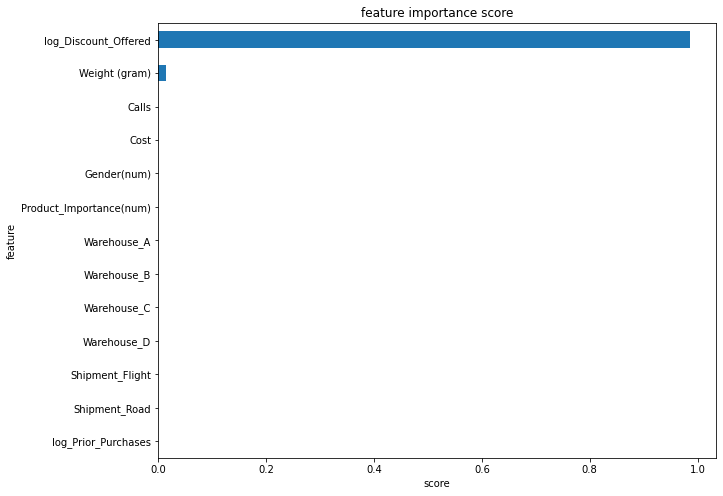

In [121]:
show_feature_importance(ab_tuned.best_estimator_)

## XGBoost

In [122]:
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

eval_classification(xg, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.685
Precision (Test Set): 0.900
Recall (Test Set): 0.537
F1-Score (Test Set): 0.673
AUC (Test Set) : 0.745
Average Precision (Test Set) : 0.859
 
Train Data Evaluation:
Accuracy (Train Set): 0.706
Precision (Train Set): 0.929
Recall (Train Set): 0.547
F1-Score (Train Set): 0.689
AUC (Train Set) : 0.806
Average Precision (Train Set) : 0.885


In [123]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.8865546218487395
Test score:0.84296875


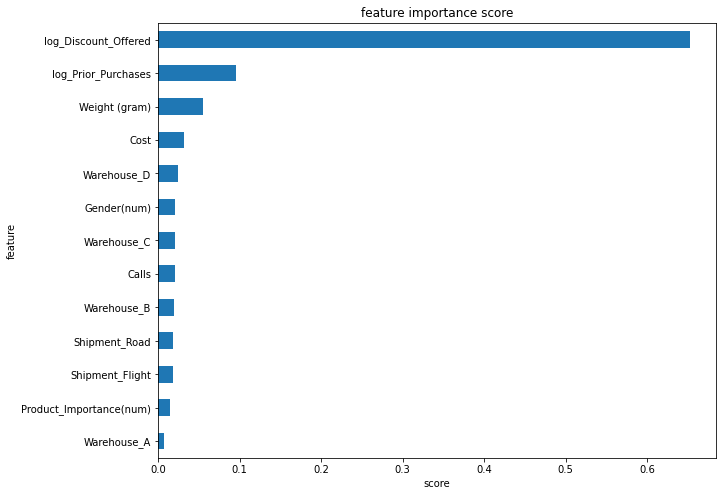

In [124]:
show_feature_importance(xg)

## Hyperparameter yang umum di tuning pada XGBoost

In [125]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.648
Precision (Test Set): 0.716
Recall (Test Set): 0.688
F1-Score (Test Set): 0.702
AUC (Test Set) : 0.735
Average Precision (Test Set) : 0.852
 
Train Data Evaluation:
Accuracy (Train Set): 0.717
Precision (Train Set): 0.776
Recall (Train Set): 0.737
F1-Score (Train Set): 0.756
AUC (Train Set) : 0.804
Average Precision (Train Set) : 0.884


In [126]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.8865546218487395
Test score:0.84296875


In [127]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 90
Best min_child_weight: 6
Best gamma: 0.4
Best tree_method: hist
Best colsample_bytree: 0.1
Best eta: 0.13131313131313133
Best lambda: 0.0
Best alpha: 0.30000000000000004


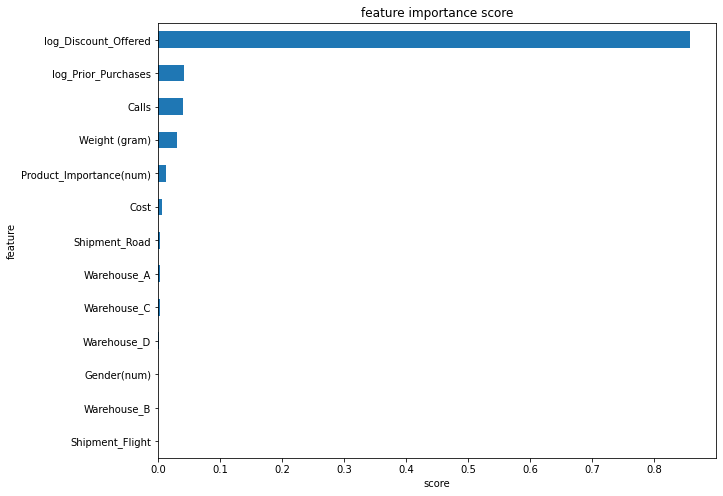

In [128]:
show_feature_importance(xg_tuned.best_estimator_)

# 3. Remove outlier using IQR Discount

In [129]:
new_num_col = df_shipping.columns.to_list()

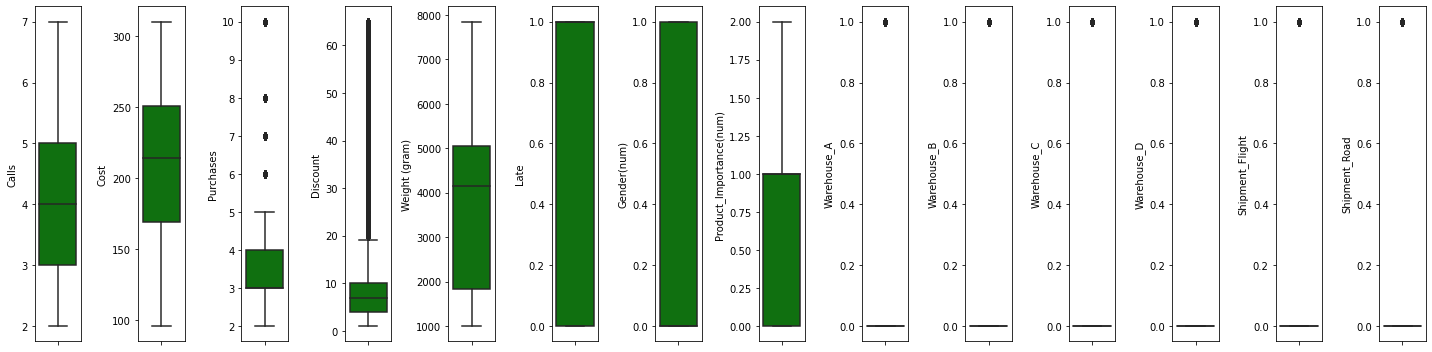

In [130]:
plt.figure(figsize=(20,5))
for i in range(0, len(new_num_col)):
  plt.subplot(1, len(new_num_col), i+1)
  sns.boxplot(y=df_shipping[new_num_col[i]], color='green', orient='v')
  plt.tight_layout()

In [133]:
df_remot = df_shipping.copy()

Q1 = df_remot['Discount'].quantile(0.25)
Q3 = df_remot['Discount'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df_remot['Discount'] >= low_limit) & (df_remot['Discount'] <= high_limit))
df_remot = df_remot[filtered_entries]

In [134]:
df_remot.shape

(8790, 14)

In [135]:
df_remot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 3 to 10998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Calls                    8790 non-null   int64
 1   Cost                     8790 non-null   int64
 2   Purchases                8790 non-null   int64
 3   Discount                 8790 non-null   int64
 4   Weight (gram)            8790 non-null   int64
 5   Late                     8790 non-null   int64
 6   Gender(num)              8790 non-null   int64
 7   Product_Importance(num)  8790 non-null   int64
 8   Warehouse_A              8790 non-null   uint8
 9   Warehouse_B              8790 non-null   uint8
 10  Warehouse_C              8790 non-null   uint8
 11  Warehouse_D              8790 non-null   uint8
 12  Shipment_Flight          8790 non-null   uint8
 13  Shipment_Road            8790 non-null   uint8
dtypes: int64(8), uint8(6)
memory usage: 669.6 KB


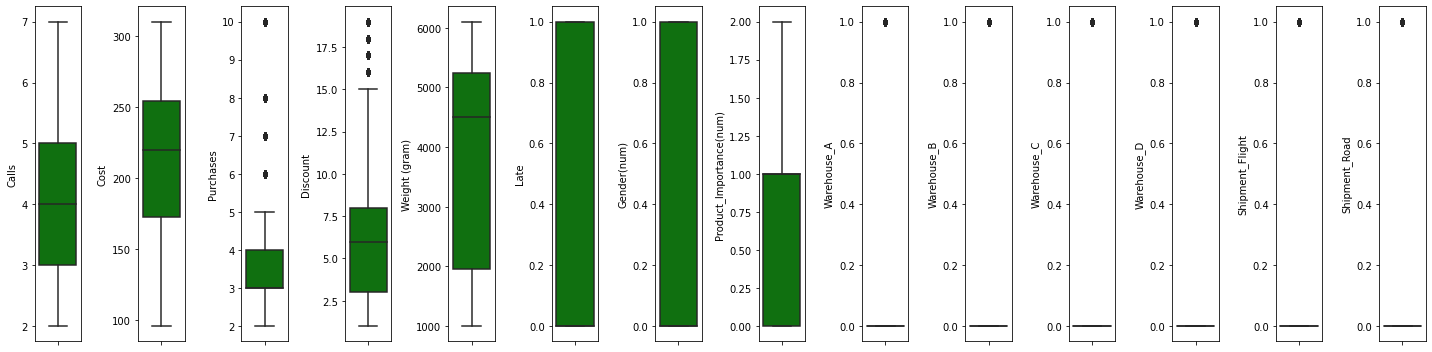

In [136]:
new_nums_col = df_remot.columns.to_list()

plt.figure(figsize=(20,5))
for i in range(0, len(new_nums_col)):
  plt.subplot(1, len(new_nums_col), i+1)
  sns.boxplot(y=df_remot[new_nums_col[i]], color='green', orient='v')
  plt.tight_layout()

In [137]:
df_remot['Late'].value_counts()

0    4436
1    4354
Name: Late, dtype: int64

In [138]:
df_remot.describe()

Calls         Cost    Purchases     Discount  Weight (gram)  \
count  8790.000000  8790.000000  8790.000000  8790.000000    8790.000000   
mean      4.129693   213.739590     3.632309     5.975085    3951.409556   
std       1.164683    48.075808     1.513681     3.523850    1620.529287   
min       2.000000    96.000000     2.000000     1.000000    1001.000000   
25%       3.000000   173.000000     3.000000     3.000000    1949.250000   
50%       4.000000   220.000000     3.000000     6.000000    4512.000000   
75%       5.000000   254.000000     4.000000     8.000000    5243.750000   
max       7.000000   310.000000    10.000000    19.000000    6102.000000   

              Late  Gender(num)  Product_Importance(num)  Warehouse_A  \
count  8790.000000  8790.000000              8790.000000  8790.000000   
mean      0.495336     0.498976                 0.595449     0.168032   
std       0.500007     0.500027                 0.635848     0.373916   
min       0.000000     0.000000                 0.000000     0.000000   
25%       0.000000     0.000000                 0.000000     0.000000   
50%       0.000000     0.000000                 1.000000     0.000000   
75%       1.000000     1.000000                 1.000000     0.000000   
max       1.000000     1.000000                 2.000000     1.000000   

       Warehouse_B  Warehouse_C  Warehouse_D  Shipment_Flight  Shipment_Road  
count  8790.000000  8790.000000  8790.000000      8790.000000    8790.000000  
mean      0.167122     0.166325     0.169056         0.162230       0.159613  
std       0.373106     0.372394     0.374822         0.368682       0.366268  
min       0.000000     0.000000     0.000000         0.000000       0.000000  
25%       0.000000     0.000000     0.000000         0.000000       0.000000  
50%       0.000000     0.000000     0.000000         0.000000       0.000000  
75%       0.000000     0.000000     0.000000         0.000000       0.000000  
max       1.000000     1.000000     1.000000         1.000000       1.000000

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

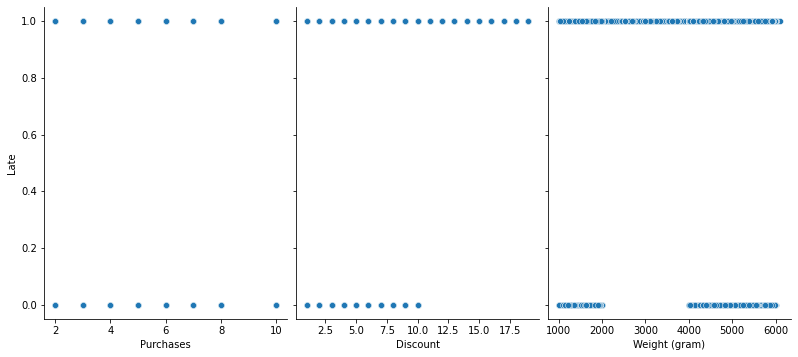

In [139]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df_remot, x_vars=['Purchases', 'Discount', 'Weight (gram)'], y_vars=['Late'], size=5, aspect=0.75)

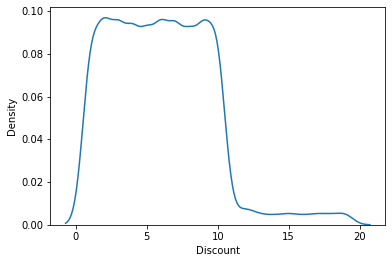

In [140]:
sns.kdeplot(df_remot['Discount'])

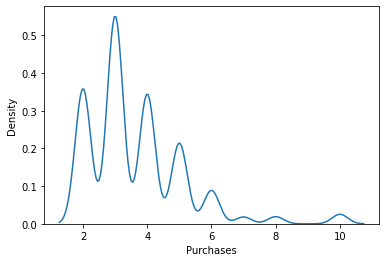

In [141]:
sns.kdeplot(df_remot['Purchases'])

## Standarisasi dengan Standarscaller

In [142]:
df_remot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 3 to 10998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Calls                    8790 non-null   int64
 1   Cost                     8790 non-null   int64
 2   Purchases                8790 non-null   int64
 3   Discount                 8790 non-null   int64
 4   Weight (gram)            8790 non-null   int64
 5   Late                     8790 non-null   int64
 6   Gender(num)              8790 non-null   int64
 7   Product_Importance(num)  8790 non-null   int64
 8   Warehouse_A              8790 non-null   uint8
 9   Warehouse_B              8790 non-null   uint8
 10  Warehouse_C              8790 non-null   uint8
 11  Warehouse_D              8790 non-null   uint8
 12  Shipment_Flight          8790 non-null   uint8
 13  Shipment_Road            8790 non-null   uint8
dtypes: int64(8), uint8(6)
memory usage: 927.6 KB


In [144]:
from sklearn.preprocessing import StandardScaler
df_remot['customer care calls std'] = StandardScaler().fit_transform(df_remot['Calls'].values.reshape(len(df_remot), 1))
df_remot['cost of the product std'] = StandardScaler().fit_transform(df_remot['Cost'].values.reshape(len(df_remot), 1))
df_remot['prior purchases std'] = StandardScaler().fit_transform(df_remot['Purchases'].values.reshape(len(df_remot), 1))
df_remot['product importance std'] = StandardScaler().fit_transform(df_remot['Product_Importance(num)'].values.reshape(len(df_remot), 1))
df_remot['discount offered std'] = StandardScaler().fit_transform(df_remot['Discount'].values.reshape(len(df_remot), 1))
df_remot['weight in gram std'] = StandardScaler().fit_transform(df_remot['Weight (gram)'].values.reshape(len(df_remot), 1))

In [145]:
df_remot.head()

Calls  Cost  Purchases  Discount  Weight (gram)  Late  Gender(num)  \
3       3   176          4        10           1177     1            1   
5       3   162          3        12           1417     1            0   
6       3   250          3         3           2371     1            0   
8       3   150          3        11           1861     1            0   
10      3   189          2        12           2888     1            1   

    Product_Importance(num)  Warehouse_A  Warehouse_B  Warehouse_C  \
3                         1            0            1            0   
5                         1            0            0            0   
6                         0            0            0            0   
8                         0            1            0            0   
10                        1            0            0            1   

    Warehouse_D  Shipment_Flight  Shipment_Road  customer care calls std  \
3             0                1              0                -0.970013   
5             0                1              0                -0.970013   
6             1                1              0                -0.970013   
8             0                1              0                -0.970013   
10            0                1              0                -0.970013   

    cost of the product std  prior purchases std  product importance std  \
3                 -0.785046             0.242925                0.636274   
5                 -1.076270            -0.417753                0.636274   
6                  0.754277            -0.417753               -0.936518   
8                 -1.325890            -0.417753               -0.936518   
10                -0.514625            -1.078432                0.636274   

    discount offered std  weight in gram std  
3               1.142258           -1.712137  
5               1.709851           -1.564028  
6              -0.844319           -0.975298  
8               1.426054           -1.290028  
10              1.709851           -0.656249

In [147]:
df_remot['Late'].value_counts(normalize=True)

0    0.504664
1    0.495336
Name: Late, dtype: float64

## Model Evaluasion

In [148]:
#model evaluation automatization function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score #import evaluation matrix from sklearn

def eval_classification(model, Xtrain, Ytrain, Xtest, Ytest):                 #define a model evaluation function
    print("Test Data Evaluation:")
    Ypred = model.predict(Xtest)                                              #predict Y using testing data
    print("Accuracy (Test Set): %.3f" % accuracy_score(Ytest, Ypred))         #accuracy score
    print("Precision (Test Set): %.3f" % precision_score(Ytest, Ypred))       #precision score
    print("Recall (Test Set): %.3f" % recall_score(Ytest, Ypred))             #recall score
    print("F1-Score (Test Set): %.3f" % f1_score(Ytest, Ypred))               #f1 score
    
    Ypred_proba = model.predict_proba(Xtest)                                                          #predict Y (probability) using testing data 
    print("AUC (Test Set) : %.3f" % roc_auc_score(Ytest, Ypred_proba[:, 1]))                          #roc auc score
    print("Average Precision (Test Set) : %.3f" % average_precision_score(Ytest, Ypred_proba[:, 1]))  #average precision score
    print(" ")
    
    print("Train Data Evaluation:")
    Ypred_train = model.predict(Xtrain)                                          #predict Y using training data
    print("Accuracy (Train Set): %.3f" % accuracy_score(Ytrain, Ypred_train))    #accuracy score
    print("Precision (Train Set): %.3f" % precision_score(Ytrain, Ypred_train))  #precision score
    print("Recall (Train Set): %.3f" % recall_score(Ytrain, Ypred_train))        #recall score
    print("F1-Score (Train Set): %.3f" % f1_score(Ytrain, Ypred_train))          #f1 score
    
    Ypred_train_proba = model.predict_proba(Xtrain)                                                            #predict Y (probability) using training data
    print("AUC (Train Set) : %.3f" % roc_auc_score(Ytrain, Ypred_train_proba[:, 1]))                           #roc auc score
    print("Average Precision (Train Set) : %.3f" % average_precision_score(Ytrain, Ypred_train_proba[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [149]:
df_remot.columns

Index(['Calls', 'Cost', 'Purchases', 'Discount', 'Weight (gram)', 'Late',
       'Gender(num)', 'Product_Importance(num)', 'Warehouse_A', 'Warehouse_B',
       'Warehouse_C', 'Warehouse_D', 'Shipment_Flight', 'Shipment_Road',
       'customer care calls std', 'cost of the product std',
       'prior purchases std', 'product importance std', 'discount offered std',
       'weight in gram std'],
      dtype='object')

### Logistic Regression

In [152]:
# train test split
X = df_remot.drop(columns=["Late", "Calls", "Cost", "Purchases", "Product_Importance(num)", "Discount", "Weight (gram)", "Gender(num)"])
y = df_remot['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [153]:
X_train.head()

Warehouse_A  Warehouse_B  Warehouse_C  Warehouse_D  Shipment_Flight  \
9414             0            0            0            1                0   
10694            1            0            0            0                1   
1009             0            0            0            0                0   
9950             1            0            0            0                0   
2541             0            1            0            0                0   

       Shipment_Road  customer care calls std  cost of the product std  \
9414               0                 2.464595                 1.815162   
10694              0                -0.111361                 0.525459   
1009               0                -0.111361                -1.492303   
9950               0                 0.747291                 0.504657   
2541               0                 0.747291                -1.201080   

       prior purchases std  product importance std  discount offered std  \
9414              0.242925               -0.936518              1.142258   
10694            -0.417753                0.636274              0.290867   
1009              0.242925               -0.936518              0.574664   
9950              0.903604               -0.936518             -0.560523   
2541             -1.078432               -0.936518             -1.411913   

       weight in gram std  
9414            -1.285091  
10694            0.962450  
1009            -1.341866  
9950            -1.227699  
2541            -1.730650

In [154]:
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, y_train)
eval_classification(model_log_reg, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.565
Precision (Test Set): 0.552
Recall (Test Set): 0.532
F1-Score (Test Set): 0.542
AUC (Test Set) : 0.596
Average Precision (Test Set) : 0.636
 
Train Data Evaluation:
Accuracy (Train Set): 0.559
Precision (Train Set): 0.564
Recall (Train Set): 0.522
F1-Score (Train Set): 0.542
AUC (Train Set) : 0.586
Average Precision (Train Set) : 0.632


### KNN

In [155]:
# train test split
X = df_remot.drop(columns=["Late", "Calls", "Cost", "Purchases", "Product_Importance(num)", "Discount", "Weight (gram)", "Gender(num)"])
y = df_remot['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [156]:
from sklearn.neighbors import KNeighborsClassifier  #import knn from sklearn
knn = KNeighborsClassifier()                        #initialize algorithm with specified name model
knn.fit(X_train, y_train)                           #fit algorithm with train data
eval_classification(knn, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.548
Precision (Test Set): 0.536
Recall (Test Set): 0.500
F1-Score (Test Set): 0.517
AUC (Test Set) : 0.579
Average Precision (Test Set) : 0.575
 
Train Data Evaluation:
Accuracy (Train Set): 0.709
Precision (Train Set): 0.723
Recall (Train Set): 0.678
F1-Score (Train Set): 0.700
AUC (Train Set) : 0.782
Average Precision (Train Set) : 0.755


### Random Forest

In [157]:
# train test split
X = df_remot.drop(columns=["Late", "Calls", "Cost", "Purchases", "Product_Importance(num)", "Discount", "Weight (gram)", "Gender(num)"])
y = df_remot['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [158]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
eval_classification(model_rf, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.577
Precision (Test Set): 0.573
Recall (Test Set): 0.494
F1-Score (Test Set): 0.531
AUC (Test Set) : 0.612
Average Precision (Test Set) : 0.665
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


### Decission Tree

In [159]:
# train test split
X = df_remot.drop(columns=["Late", "Calls", "Cost", "Purchases", "Product_Importance(num)", "Discount", "Weight (gram)", "Gender(num)"])
y = df_remot['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [160]:
from sklearn.tree import DecisionTreeClassifier       #import decision tree from sklearn
dt = DecisionTreeClassifier(random_state=42)     #initialize algorithm with specified name model
dt.fit(X_train, y_train)                         #fit algorithm with train data
eval_classification(dt, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.553
Precision (Test Set): 0.536
Recall (Test Set): 0.565
F1-Score (Test Set): 0.551
AUC (Test Set) : 0.553
Average Precision (Test Set) : 0.514
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


### XGBoost

In [161]:
# train test split
X = df_remot.drop(columns=["Late", "Calls", "Cost", "Purchases", "Product_Importance(num)", "Discount", "Weight (gram)", "Gender(num)"])
y = df_remot['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [162]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
eval_classification(model_xgb, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.616
Precision (Test Set): 0.703
Recall (Test Set): 0.358
F1-Score (Test Set): 0.474
AUC (Test Set) : 0.623
Average Precision (Test Set) : 0.685
 
Train Data Evaluation:
Accuracy (Train Set): 0.633
Precision (Train Set): 0.775
Recall (Train Set): 0.376
F1-Score (Train Set): 0.506
AUC (Train Set) : 0.705
Average Precision (Train Set) : 0.744


### Adaboost

In [163]:
# train test split
X = df_remot.drop(columns=["Late", "Calls", "Cost", "Purchases", "Product_Importance(num)", "Discount", "Weight (gram)", "Gender(num)"])
y = df_remot['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [164]:
model_ab = AdaBoostClassifier()
model_ab.fit(X_train,y_train)
eval_classification(model_ab, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.595
Precision (Test Set): 0.627
Recall (Test Set): 0.406
F1-Score (Test Set): 0.493
AUC (Test Set) : 0.614
Average Precision (Test Set) : 0.662
 
Train Data Evaluation:
Accuracy (Train Set): 0.606
Precision (Train Set): 0.671
Recall (Train Set): 0.414
F1-Score (Train Set): 0.512
AUC (Train Set) : 0.640
Average Precision (Train Set) : 0.686


## Model dengan tunning hyperparam

### Logistic Regression

In [165]:
# train test split
X = df_remot.drop(columns=["Late", "Calls", "Cost", "Purchases", "Product_Importance(num)", "Discount", "Weight (gram)", "Gender(num)"])
y = df_remot['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [166]:
penalty = ['l1', 'l2']
C = [0.00001, 0.0001, 0.001, 0.01, 0.1]
hyperparameters_logreg = dict(penalty=penalty, C=C)
model_logreg = LogisticRegression()
model_logreg_tun = GridSearchCV(model_logreg, hyperparameters_logreg, cv=5, scoring='roc_auc')
model_logreg_tun.fit(X_train, y_train)
eval_classification(model_logreg_tun, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

Test Data Evaluation:
Accuracy (Test Set): 0.567
Precision (Test Set): 0.555
Recall (Test Set): 0.532
F1-Score (Test Set): 0.544
AUC (Test Set) : 0.596
Average Precision (Test Set) : 0.636
 
Train Data Evaluation:
Accuracy (Train Set): 0.555
Precision (Train Set): 0.560
Recall (Train Set): 0.518
F1-Score (Train Set): 0.538
AUC (Train Set) : 0.585
Average Precision (Train Set) : 0.632


In [167]:
# best param
model_logreg_tun.best_params_

{'C': 0.01, 'penalty': 'l2'}

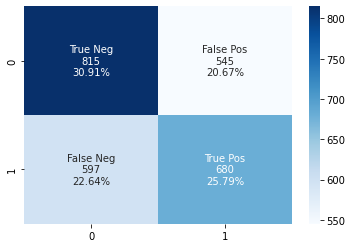

In [168]:
y_pred = model_logreg_tun.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

### KNN

In [169]:
# train test split
X = df_remot.drop(columns=["Late", "Calls", "Cost", "Purchases", "Product_Importance(num)", "Discount", "Weight (gram)", "Gender(num)"])
y = df_remot['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [170]:
#list of hyperparameter
n_neighbors = list(range(1,51))
p=[1,2,3]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

#init model
knn_model = KNeighborsClassifier()
knn_model_tun = RandomizedSearchCV(knn_model, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

#fit model & evaluation
knn_model_tun.fit(X_train, y_train)
eval_classification(knn_model_tun, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.578
Precision (Test Set): 0.583
Recall (Test Set): 0.447
F1-Score (Test Set): 0.506
AUC (Test Set) : 0.602
Average Precision (Test Set) : 0.637
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [171]:
# best param
knn_model_tun.best_params_

{'algorithm': 'brute', 'n_neighbors': 38, 'p': 1, 'weights': 'distance'}

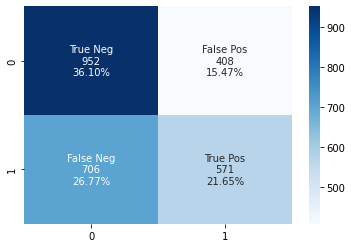

In [172]:
y_pred = knn_model_tun.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

### Random Forest

In [173]:
# train test split
X = df_remot.drop(columns=["Late", "Calls", "Cost", "Purchases", "Product_Importance(num)", "Discount", "Weight (gram)", "Gender(num)"])
y = df_remot['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [174]:
hyperparameters_rf = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], #the number of features to consider when looking for the best split
                       n_jobs = [-1] #the number of jobs to run in parallel computation. -1 means using all processors
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters_rf, cv=5, random_state=42, scoring='roc_auc')
rf_tuned.fit(X_train,y_train)
eval_classification(rf_tuned, X_train, y_train, X_test, y_test)


Test Data Evaluation:
Accuracy (Test Set): 0.584
Precision (Test Set): 0.584
Recall (Test Set): 0.492
F1-Score (Test Set): 0.534
AUC (Test Set) : 0.619
Average Precision (Test Set) : 0.677
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 0.999
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [175]:
# best param
rf_tuned.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 110,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 400,
 'n_jobs': -1}

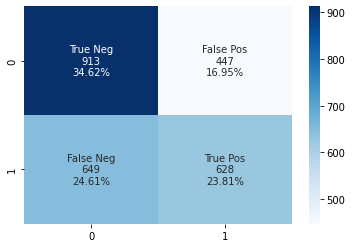

In [176]:
y_pred = rf_tuned.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

### Decission Tree

In [177]:
# train test split
X = df_remot.drop(columns=["Late", "Calls", "Cost", "Purchases", "Product_Importance(num)", "Discount", "Weight (gram)", "Gender(num)"])
y = df_remot['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [178]:
#list of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] #maximum number of levels in tree
min_samples_split = [2, 5, 10, 100, 200] #minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50, 100] #minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2'] #number of features to consider at every split
criterion = ['gini', 'entropy'] #the function to measure the quality of a split
splitter = ['best', 'random'] #the strategy used to choose the split at each node

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

#initiate model
dt = DecisionTreeClassifier(random_state=42)
dt_tun = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
dt_tun.fit(X_train, y_train) #fit model

eval_classification(dt_tun, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.583
Precision (Test Set): 0.596
Recall (Test Set): 0.431
F1-Score (Test Set): 0.501
AUC (Test Set) : 0.603
Average Precision (Test Set) : 0.649
 
Train Data Evaluation:
Accuracy (Train Set): 0.601
Precision (Train Set): 0.648
Recall (Train Set): 0.444
F1-Score (Train Set): 0.527
AUC (Train Set) : 0.646
Average Precision (Train Set) : 0.672


In [179]:
# best param
dt_tun.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'splitter': 'best'}

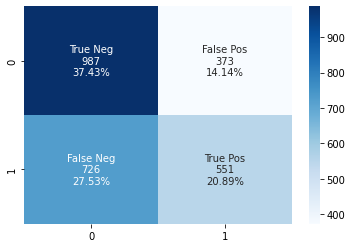

In [180]:
y_pred = dt_tun.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

### XGBoost

In [181]:
# train test split
X = df_remot.drop(columns=["Late", "Calls", "Cost", "Purchases", "Product_Importance(num)", "Discount", "Weight (gram)", "Gender(num)"])
y = df_remot['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [182]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
xg_tuned.fit(X_train,y_train)
eval_classification(xg_tuned, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.581
Precision (Test Set): 0.576
Recall (Test Set): 0.515
F1-Score (Test Set): 0.544
AUC (Test Set) : 0.617
Average Precision (Test Set) : 0.670
 
Train Data Evaluation:
Accuracy (Train Set): 0.932
Precision (Train Set): 0.950
Recall (Train Set): 0.913
F1-Score (Train Set): 0.931
AUC (Train Set) : 0.984
Average Precision (Train Set) : 0.983


In [183]:
# best param
xg_tuned.best_params_

{'alpha': 0.6000000000000001,
 'colsample_bytree': 0.7000000000000001,
 'eta': 0.31313131313131315,
 'gamma': 1.0,
 'lambda': 0.6000000000000001,
 'max_depth': 50,
 'min_child_weight': 4,
 'tree_method': 'approx'}

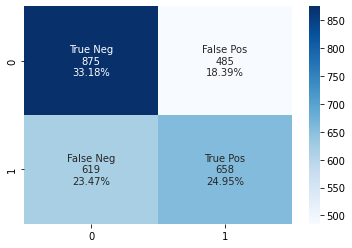

In [184]:
y_pred = xg_tuned.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

### AdaBoost

In [185]:
# train test split
X = df_remot.drop(columns=["Late", "Calls", "Cost", "Purchases", "Product_Importance(num)", "Discount", "Weight (gram)", "Gender(num)"])
y = df_remot['Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("training: ", X_train.shape[0])
print("testing: ", y_test.shape[0])

training:  6153
testing:  2637


In [186]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
ab_tuned.fit(X_train,y_train)
eval_classification(ab_tuned, X_train, y_train, X_test, y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.595
Precision (Test Set): 0.621
Recall (Test Set): 0.419
F1-Score (Test Set): 0.500
AUC (Test Set) : 0.615
Average Precision (Test Set) : 0.655
 
Train Data Evaluation:
Accuracy (Train Set): 0.600
Precision (Train Set): 0.657
Recall (Train Set): 0.416
F1-Score (Train Set): 0.510
AUC (Train Set) : 0.629
Average Precision (Train Set) : 0.667


In [187]:
# best param
ab_tuned.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.06169346733668341,
 'n_estimators': 212}

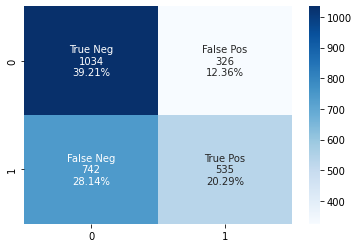

In [188]:
y_pred = ab_tuned.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

# 4. Data dengan Z-Score Outlier Handling

In [ ]:
df_zs = pd.read_excel("https://raw.githubusercontent.com/Decentraland-Team-Final-Project/Report-Final-Project-/main/Dataset/df_shipping_stage_2.xlsx")
df_zs.head()

ID Warehouse_Block  ... std_Discount_Offered  std_Weight_in_gms
0   1               D  ...             1.889983          -1.468240
1   2               F  ...             2.815636          -0.333893
2   3               A  ...             2.136824          -0.159002
3   4               B  ...            -0.208162          -1.502484
4   5               C  ...             2.013404          -0.703244

[5 rows x 37 columns]

In [ ]:
df_zs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10999 non-null  int64  
 1   Warehouse_Block           10999 non-null  object 
 2   Mode_of_Shipment          10999 non-null  object 
 3   Customer_Care_Calls       10999 non-null  int64  
 4   Customer_Rating(num)      10999 non-null  int64  
 5   Cost_of_The_Product       10999 non-null  int64  
 6   Prior_Purchases           10999 non-null  int64  
 7   Product_Importance        10999 non-null  object 
 8   Gender                    10999 non-null  object 
 9   Discount_Offered          10999 non-null  int64  
 10  Weight_in_gms             10999 non-null  int64  
 11  Late_Shipment(num)        10999 non-null  int64  
 12  Customer_Rating(cat)      10999 non-null  object 
 13  Late_Shipment(cat)        10999 non-null  object 
 14  Gender

Variable List Classification Based on It's Types

In [ ]:
#classify column/variable based on it's types
integer = ['Customer_Care_Calls', 'Cost_of_The_Product', 'Prior_Purchases', 'Discount_Offered', 'Weight_in_gms']
category = ['Warehouse_Block', 'Mode_of_Shipment', 'Product_Importance', 'Gender', 'Customer_Rating(cat)', 'Late_Shipment(cat)']
normalization = ['norm_Customer_Care_Calls', 'norm_Cost_of_The_Product', 'norm_Prior_Purchases', 'norm_Discount_Offered', 'norm_Weight_in_gms']
standardization = ['std_Customer_Care_Calls', 'std_Cost_of_The_Product', 'std_Prior_Purchases', 'std_Discount_Offered', 'std_Weight_in_gms']
log = ['log_Discount_Offered', 'log_Prior_Purchases']
rts = ['rts_Weight_in_gms']
binary = ['Late_Shipment(num)', 'Gender(num)', 'Warehouse_Block_A', 'Warehouse_Block_B', 'Warehouse_Block_C', 'Warehouse_Block_D', 'Warehouse_Block_F',
          'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship']
ordinal = ['Customer_Rating(num)', 'Product_Importance(num)']

Initialize Function to Predict and Evaluate Model in Every Algorithm

In [ ]:
#model evaluation automatization function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score #import evaluation matrix from sklearn

def eval_classification(model, Xtrain, Ytrain, Xtest, Ytest):                 #define a model evaluation function
    print("Test Data Evaluation:")
    Ypred = model.predict(Xtest)                                              #predict Y using testing data
    print("Accuracy (Test Set): %.3f" % accuracy_score(Ytest, Ypred))         #accuracy score
    print("Precision (Test Set): %.3f" % precision_score(Ytest, Ypred))       #precision score
    print("Recall (Test Set): %.3f" % recall_score(Ytest, Ypred))             #recall score
    print("F1-Score (Test Set): %.3f" % f1_score(Ytest, Ypred))               #f1 score
    
    Ypred_proba = model.predict_proba(Xtest)                                                          #predict Y (probability) using testing data 
    print("AUC (Test Set) : %.3f" % roc_auc_score(Ytest, Ypred_proba[:, 1]))                          #roc auc score
    print("Average Precision (Test Set) : %.3f" % average_precision_score(Ytest, Ypred_proba[:, 1]))  #average precision score
    print(" ")
    
    print("Train Data Evaluation:")
    Ypred_train = model.predict(Xtrain)                                          #predict Y using training data
    print("Accuracy (Train Set): %.3f" % accuracy_score(Ytrain, Ypred_train))    #accuracy score
    print("Precision (Train Set): %.3f" % precision_score(Ytrain, Ypred_train))  #precision score
    print("Recall (Train Set): %.3f" % recall_score(Ytrain, Ypred_train))        #recall score
    print("F1-Score (Train Set): %.3f" % f1_score(Ytrain, Ypred_train))          #f1 score
    
    Ypred_train_proba = model.predict_proba(Xtrain)                                                            #predict Y (probability) using training data
    print("AUC (Train Set) : %.3f" % roc_auc_score(Ytrain, Ypred_train_proba[:, 1]))                           #roc auc score
    print("Average Precision (Train Set) : %.3f" % average_precision_score(Ytrain, Ypred_train_proba[:, 1]))

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [ ]:
#filter outliers using z-score
from scipy import stats

In [ ]:
print(f'Jumlah baris sebelum outlier dihilangkan: {len(df_zs)}')

filtered_entries = np.array([True] * len(df_zs))

for column in integer:
    zscore = abs(stats.zscore(df_zs[column])) #count absolute z-score
    filtered_entries = (zscore < 3) & filtered_entries # keep sample with absolute z-score < 3
    
df_outlierhandling_z = df_zs[filtered_entries] #create a new data frame with filter

print(f'Jumlah baris setelah memfilter outlier: {len(df_outlierhandling_z)}')

Jumlah baris sebelum outlier dihilangkan: 10999
Jumlah baris setelah memfilter outlier: 10642


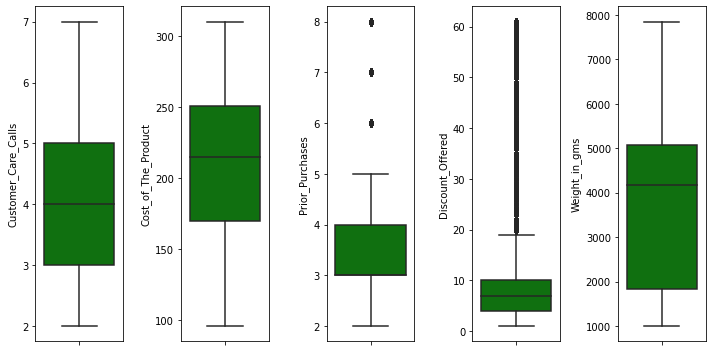

In [ ]:
#boxplot after filter
features = integer
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df_outlierhandling_z[features[i]], color='green', orient='v')
  plt.tight_layout()

## Split Training and Testing Data

In [ ]:
#define feature(X) and target(Y)
X = df_outlierhandling_z.drop(columns=['ID',
                                       'Warehouse_Block', 'Mode_of_Shipment', 'Product_Importance', 'Gender', 'Customer_Rating(cat)', 'Late_Shipment(cat)',
                                       'norm_Customer_Care_Calls', 'norm_Cost_of_The_Product', 'norm_Prior_Purchases', 'norm_Discount_Offered', 'norm_Weight_in_gms',
                                       'std_Customer_Care_Calls', 'std_Cost_of_The_Product', 'std_Prior_Purchases', 'std_Discount_Offered', 'std_Weight_in_gms',
                                       'log_Discount_Offered', 'log_Prior_Purchases', 'rts_Weight_in_gms', 'Warehouse_Block_F', 'Mode_of_Shipment_Ship', 
                                       'Late_Shipment(num)'])
Y = df_outlierhandling_z['Late_Shipment(num)'] #target/label

#splitting the data into train and test
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression  #import logistic regression from sklearn
logreg = LogisticRegression(random_state=42)         #initialize algorithm with specified name model
logreg.fit(X_train, Y_train)                         #fit algorithm with train data
Y_pred = logreg.predict(X_test)                      #predict Y using testing data

In [ ]:
#confussion matrix
from sklearn.metrics import confusion_matrix #import package from sklearn
confusion_matrix(Y_test, Y_pred)             #see confusion matrix

array([[ 780,  541],
       [ 618, 1254]])

In [ ]:
#call model evaluation function
eval_classification(logreg, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.637
Precision (Test Set): 0.699
Recall (Test Set): 0.670
F1-Score (Test Set): 0.684
AUC (Test Set) : 0.711
Average Precision (Test Set) : 0.824
 
Train Data Evaluation:
Accuracy (Train Set): 0.627
Precision (Train Set): 0.692
Recall (Train Set): 0.666
F1-Score (Train Set): 0.679
AUC (Train Set) : 0.705
Average Precision (Train Set) : 0.824


In [ ]:
#hyperparameter tuning (using random search)

from sklearn.model_selection import RandomizedSearchCV

#tested hyperparameters list
penalty = ['l2','l1', 'elasticnet']
C = [0.0001, 0.001, 0.002] #inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

#initiate model
lr = LogisticRegression(random_state=42) #init Logres dengan Gridsearch, cross validation = 5
rs = RandomizedSearchCV(lr, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

#fit model & evaluation
rs.fit(X_train, Y_train)
Y_pred = rs.predict(X_test)

eval_classification(rs, X_train, Y_train, X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test Data Evaluation:
Accuracy (Test Set): 0.633
Precision (Test Set): 0.691
Recall (Test Set): 0.675
F1-Score (Test Set): 0.683
AUC (Test Set) : 0.713
Average Precision (Test Set) : 0.825
 
Train Data Evaluation:
Accuracy (Train Set): 0.624
Precision (Train Set): 0.687
Recall (Train Set): 0.672
F1-Score (Train Set): 0.679
AUC (Train Set) : 0.705
Average Precision (Train Set) : 0.823


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

In [ ]:
#best hyperparameter? (using random search)
print('Best penalty:', rs.best_estimator_.get_params()['penalty'])
print('Best C:', rs.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 0.0001


In [ ]:
print('Train score: ' + str(rs.score(X_train, Y_train)))
print('Test score:' + str(rs.score(X_test, Y_test)))

Train score: 0.7047083306285111
Test score:0.7130787508815518


## k-Nearest Neighbor (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  #import knn from sklearn
knn = KNeighborsClassifier()                        #initialize algorithm with specified name model
knn.fit(X_train, Y_train)                           #fit algorithm with train data
Y_pred = knn.predict(X_test)                        #predict Y using testing data 

In [ ]:
#confussion matrix
from sklearn.metrics import confusion_matrix #import package from sklearn
confusion_matrix(Y_test, Y_pred)             #see confusion matrix

array([[ 801,  520],
       [ 608, 1264]])

In [ ]:
#call model evaluation function
eval_classification(knn, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.647
Precision (Test Set): 0.709
Recall (Test Set): 0.675
F1-Score (Test Set): 0.691
AUC (Test Set) : 0.726
Average Precision (Test Set) : 0.806
 
Train Data Evaluation:
Accuracy (Train Set): 0.769
Precision (Train Set): 0.824
Recall (Train Set): 0.776
F1-Score (Train Set): 0.799
AUC (Train Set) : 0.859
Average Precision (Train Set) : 0.888


In [ ]:
#hyperparameter tuning (using random search)

#list of hyperparameter
n_neighbors = list(range(1,51))
p=[1,2,3]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

#init model
kn = KNeighborsClassifier()
rs = RandomizedSearchCV(kn, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

#fit model & evaluation
rs.fit(X_train, Y_train)
Y_pred = rs.predict(X_test)
eval_classification(rs, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.659
Precision (Test Set): 0.787
Recall (Test Set): 0.574
F1-Score (Test Set): 0.664
AUC (Test Set) : 0.724
Average Precision (Test Set) : 0.831
 
Train Data Evaluation:
Accuracy (Train Set): 0.691
Precision (Train Set): 0.839
Recall (Train Set): 0.591
F1-Score (Train Set): 0.693
AUC (Train Set) : 0.776
Average Precision (Train Set) : 0.859


In [ ]:
#best hyperparameter? (using random search)
print('Best n_neighbors:', rs.best_estimator_.get_params()['n_neighbors'])
print('Best p:', rs.best_estimator_.get_params()['p'])
print('Best algorithm:', rs.best_estimator_.get_params()['algorithm'])
print('weights:', rs.best_estimator_.get_params()['weights'])

Best n_neighbors: 44
Best p: 2
Best algorithm: kd_tree
weights: uniform


In [ ]:
print('Train score: ' + str(rs.score(X_train, Y_train)))
print('Test score:' + str(rs.score(X_test, Y_test)))

Train score: 0.7763305673261955
Test score:0.7236682906629917


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier       #import decision tree from sklearn
dectree = DecisionTreeClassifier(random_state=42)     #initialize algorithm with specified name model
dectree.fit(X_train, Y_train)                         #fit algorithm with train data
Y_pred = dectree.predict(X_test)                      #predict Y using testing data

In [ ]:
#confussion matrix
from sklearn.metrics import confusion_matrix #import package from sklearn
confusion_matrix(Y_test, Y_pred)             #see confusion matrix

array([[ 735,  586],
       [ 557, 1315]])

In [ ]:
#call model evaluation function
eval_classification(dectree, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.642
Precision (Test Set): 0.692
Recall (Test Set): 0.702
F1-Score (Test Set): 0.697
AUC (Test Set) : 0.629
Average Precision (Test Set) : 0.660
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


In [ ]:
#hyperparameter tuning (using random search)
from sklearn.model_selection import RandomizedSearchCV

#list of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] #maximum number of levels in tree
min_samples_split = [2, 5, 10, 100, 200] #minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50, 100] #minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2'] #number of features to consider at every split
criterion = ['gini', 'entropy'] #the function to measure the quality of a split
splitter = ['best', 'random'] #the strategy used to choose the split at each node

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

#initiate model
dt = DecisionTreeClassifier(random_state=42)
rs = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
rs.fit(X_train, Y_train) #fit model

#predict & evaluation
Y_pred = rs.predict(X_test)
eval_classification(rs, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.630
Precision (Test Set): 0.706
Recall (Test Set): 0.634
F1-Score (Test Set): 0.668
AUC (Test Set) : 0.699
Average Precision (Test Set) : 0.813
 
Train Data Evaluation:
Accuracy (Train Set): 0.674
Precision (Train Set): 0.756
Recall (Train Set): 0.664
F1-Score (Train Set): 0.707
AUC (Train Set) : 0.755
Average Precision (Train Set) : 0.845


In [ ]:
#best hyperparameter? (using random search)
print('Best max_depth:', rs.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', rs.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', rs.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', rs.best_estimator_.get_params()['max_features'])
print('Best criterion:', rs.best_estimator_.get_params()['criterion'])
print('Best splitter:', rs.best_estimator_.get_params()['splitter'])

Best max_depth: 16
Best min_samples_split: 2
Best min_samples_leaf: 100
Best max_features: sqrt
Best criterion: entropy
Best splitter: best


In [ ]:
print('Train score: ' + str(rs.score(X_train, Y_train)))
print('Test score:' + str(rs.score(X_test, Y_test)))

Train score: 0.7545920046202094
Test score:0.6989951522739183


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier    #import random forrest from sklearn
ranfor = RandomForestClassifier(random_state=42)       #initialize algorithm with specified name model
ranfor.fit(X_train, Y_train)                           #fit algorithm with train data

Y_pred = ranfor.predict(X_test)                        #predict Y using testing data 

In [ ]:
eval_classification(ranfor, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.654
Precision (Test Set): 0.741
Recall (Test Set): 0.628
F1-Score (Test Set): 0.680
AUC (Test Set) : 0.725
Average Precision (Test Set) : 0.837
 
Train Data Evaluation:
Accuracy (Train Set): 1.000
Precision (Train Set): 1.000
Recall (Train Set): 1.000
F1-Score (Train Set): 1.000
AUC (Train Set) : 1.000
Average Precision (Train Set) : 1.000


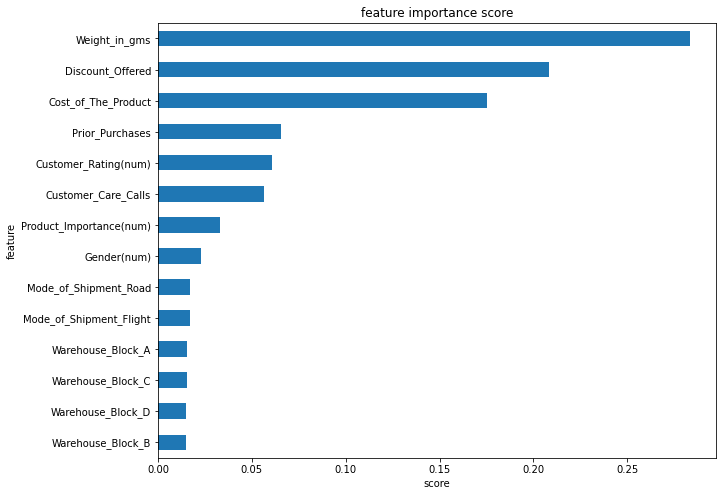

In [ ]:
show_feature_importance(ranfor)

In [ ]:

#List Hyperparameters
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], #total subtree 
                       bootstrap = [True], #use bootstrapping or no
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  #maximum depth of the tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], #total node minimum samples required for new leaf splitting
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], #total leaf minimum samples to form a new leaf
                       max_features = ['auto', 'sqrt', 'log2'], #the number of features to consider when looking for the best split
                       n_jobs = [-1], #the number of jobs to run in parallel computation. -1 means using all processors
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
rs.fit(X_train,Y_train)

#predict & evaluation
Y_pred = rs.predict(X_test)
eval_classification(rs, X_train, Y_train, X_test, Y_test)

In [ ]:
#best hyperparameter? (using random search)
print('n_estimators:', rs.best_estimator_.get_params()['n_estimators'])
print('bootstrap:', rs.best_estimator_.get_params()['bootstrap'])
print('criterion:', rs.best_estimator_.get_params()['criterion'])
print('max_depth:', rs.best_estimator_.get_params()['max_depth'])
print('min_samples_split:', rs.best_estimator_.get_params()['min_samples_split'])
print('min_samples_leaf:', rs.best_estimator_.get_params()['min_samples_leaf'])
print('max_features:', rs.best_estimator_.get_params()['max_features'])
print('n_jobs:', rs.best_estimator_.get_params()['n_jobs'])

In [ ]:
show_feature_importance(rs.best_estimator_)

## AdaBoost

In [ ]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train,Y_train)

Y_pred = ab.predict(X_test)

In [ ]:
eval_classification(ab, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.663
Precision (Test Set): 0.782
Recall (Test Set): 0.589
F1-Score (Test Set): 0.672
AUC (Test Set) : 0.739
Average Precision (Test Set) : 0.843
 
Train Data Evaluation:
Accuracy (Train Set): 0.680
Precision (Train Set): 0.804
Recall (Train Set): 0.608
F1-Score (Train Set): 0.692
AUC (Train Set) : 0.757
Average Precision (Train Set) : 0.856


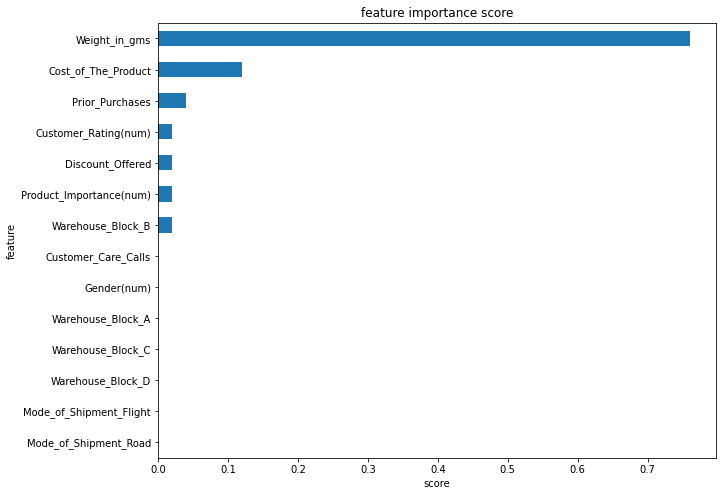

In [ ]:
show_feature_importance(ab)

In [ ]:
# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
adb = AdaBoostClassifier(random_state=42)
rs = RandomizedSearchCV(adb, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
rs.fit(X_train, Y_train)

# Predict & Evaluation
Y_pred = rs.predict(X_test)#Check performa dari model
eval_classification(rs, X_train, Y_train, X_test, Y_test)

In [ ]:
#best hyperparameter? (using random search)
print('n_estimators:', rs.best_estimator_.get_params()['n_estimators'])
print('learning_rate:', rs.best_estimator_.get_params()['learning_rate'])
print('algorithm:', rs.best_estimator_.get_params()['algorithm'])

n_estimators: 1700
learning_rate: 0.011421052631578946
algorithm: SAMME.R


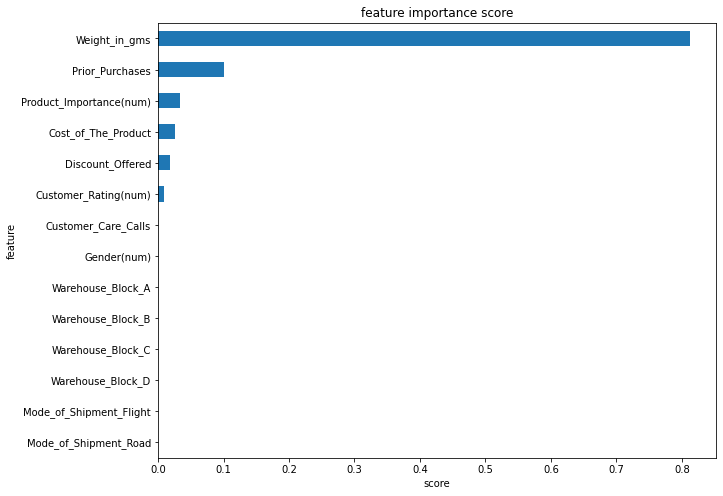

In [ ]:
show_feature_importance(rs.best_estimator_)

## XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, Y_train)

Y_pred = xg.predict(X_test)

In [ ]:
eval_classification(xg, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.669
Precision (Test Set): 0.847
Recall (Test Set): 0.530
F1-Score (Test Set): 0.652
AUC (Test Set) : 0.732
Average Precision (Test Set) : 0.842
 
Train Data Evaluation:
Accuracy (Train Set): 0.706
Precision (Train Set): 0.910
Recall (Train Set): 0.559
F1-Score (Train Set): 0.693
AUC (Train Set) : 0.797
Average Precision (Train Set) : 0.880


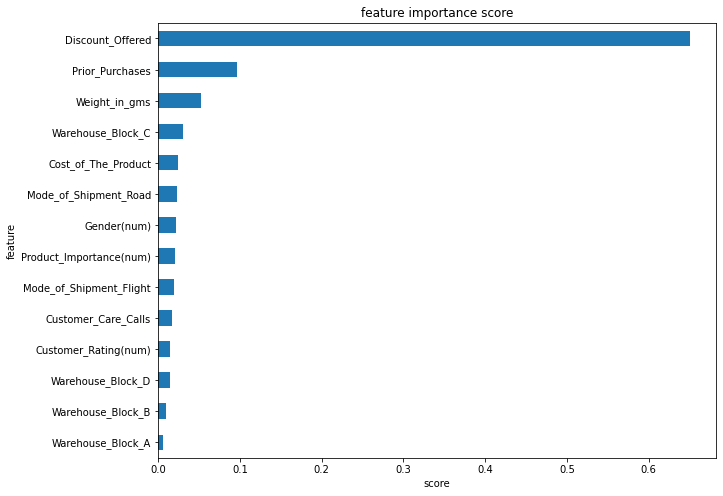

In [ ]:
show_feature_importance(xg)

In [ ]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xgb = XGBClassifier(random_state=42)
rs = RandomizedSearchCV(xgb, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
rs.fit(X_train, Y_train)

# Predict & Evaluation
Y_pred = rs.predict(X_test)#Check performa dari model
eval_classification(rs, X_train, Y_train, X_test, Y_test)

Test Data Evaluation:
Accuracy (Test Set): 0.665
Precision (Test Set): 0.761
Recall (Test Set): 0.624
F1-Score (Test Set): 0.686
AUC (Test Set) : 0.732
Average Precision (Test Set) : 0.844
 
Train Data Evaluation:
Accuracy (Train Set): 0.780
Precision (Train Set): 0.879
Recall (Train Set): 0.728
F1-Score (Train Set): 0.796
AUC (Train Set) : 0.880
Average Precision (Train Set) : 0.924


In [ ]:
#best hyperparameter? (using random search)
print('max_depth:', rs.best_estimator_.get_params()['max_depth'])
print('min_child_weight:', rs.best_estimator_.get_params()['min_child_weight'])
print('gamma:', rs.best_estimator_.get_params()['gamma'])
print('tree_method:', rs.best_estimator_.get_params()['tree_method'])
print('colsample_bytree:', rs.best_estimator_.get_params()['colsample_bytree'])
print('eta:', rs.best_estimator_.get_params()['eta'])
print('lambda:', rs.best_estimator_.get_params()['lambda'])
print('alpha:', rs.best_estimator_.get_params()['alpha'])

max_depth: 50
min_child_weight: 18
gamma: 0.5
tree_method: approx
colsample_bytree: 0.30000000000000004
eta: 0.33333333333333337
lambda: 0.8
alpha: 0.8


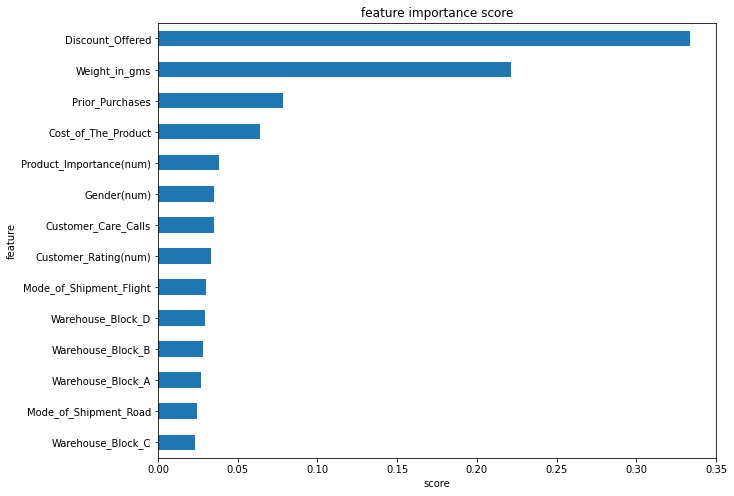

In [ ]:
show_feature_importance(rs.best_estimator_)

# Iterasi Feature Importance dengan Adaboost

## Model 1

In [ ]:
# Splitting Features & Target
X1 = dfori[['Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']] # Features
Y1 = dfori['Reached.on.Time_Y.N'] # Target

#splitting the data into train and test
from sklearn.model_selection import train_test_split 
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = 0.3, random_state = 42)

In [ ]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train1, Y_train1)

Y_pred = ab.predict(X_test1)
eval_classification(ab, X_train1, Y_train1, X_test1, Y_test1)

Test Data Evaluation:
Accuracy (Test Set): 0.644
Precision (Test Set): 0.695
Recall (Test Set): 0.728
F1-Score (Test Set): 0.711
AUC (Test Set) : 0.739
Average Precision (Test Set) : 0.850
 
Train Data Evaluation:
Accuracy (Train Set): 0.650
Precision (Train Set): 0.693
Recall (Train Set): 0.737
F1-Score (Train Set): 0.715
AUC (Train Set) : 0.751
Average Precision (Train Set) : 0.852


In [ ]:
# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
adb = AdaBoostClassifier(random_state=42)
rs = RandomizedSearchCV(adb, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
rs.fit(X_train1, Y_train1)

# Predict & Evaluation
Y_pred = rs.predict(X_test1)#Check performa dari model
eval_classification(rs, X_train1, Y_train1, X_test1, Y_test1)

Test Data Evaluation:
Accuracy (Test Set): 0.679
Precision (Test Set): 0.806
Recall (Test Set): 0.615
F1-Score (Test Set): 0.698
AUC (Test Set) : 0.743
Average Precision (Test Set) : 0.847
 
Train Data Evaluation:
Accuracy (Train Set): 0.678
Precision (Train Set): 0.797
Recall (Train Set): 0.615
F1-Score (Train Set): 0.694
AUC (Train Set) : 0.752
Average Precision (Train Set) : 0.847


## Model 2

In [ ]:
# Split Feature and Label
X2 = df_log[['Cost_of_the_Product', 'Weight_in_gms', 'log_Discount_Offered', 'log_Prior_Purchases' ]]
Y2 = df_log['Reached.on.Time_Y.N'] # target / label

#splitting the data into train and test
from sklearn.model_selection import train_test_split 
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.3, random_state = 42)

In [ ]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train2, Y_train2)

Y_pred = ab.predict(X_test2)
eval_classification(ab, X_train2, Y_train2, X_test2, Y_test2)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.85
Recall (Test Set): 0.58
F1-Score (Test Set): 0.69
AUC: 0.75


In [ ]:
# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
adb = AdaBoostClassifier(random_state=42)
rs = RandomizedSearchCV(adb, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
rs.fit(X_train2, Y_train2)

# Predict & Evaluation
Y_pred = rs.predict(X_test2)#Check performa dari model
eval_classification(rs, X_train2, Y_train2, X_test2, Y_test2)

Test Data Evaluation:
Accuracy (Test Set): 0.679
Precision (Test Set): 0.806
Recall (Test Set): 0.615
F1-Score (Test Set): 0.698
AUC (Test Set) : 0.743
Average Precision (Test Set) : 0.847
 
Train Data Evaluation:
Accuracy (Train Set): 0.678
Precision (Train Set): 0.797
Recall (Train Set): 0.615
F1-Score (Train Set): 0.694
AUC (Train Set) : 0.752
Average Precision (Train Set) : 0.847


## Model 3

In [ ]:
# train test split
X3 = df_shipping[['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered', 'Prior_purchases' ]]
Y3 = df_shipping['Reached.on.Time_Y.N']
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X2, Y2, test_size=0.3, random_state=42)
print("training: ", X_train2.shape[0])
print("testing: ", Y_test2.shape[0])

training:  7699
testing:  3300


In [ ]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train3, Y_train3)

Y_pred = ab.predict(X_test3)
eval_classification(ab, X_train3, Y_train3, X_test3, Y_test3)

Test Data Evaluation:
Accuracy (Test Set): 0.683
Precision (Test Set): 0.848
Recall (Test Set): 0.577
F1-Score (Test Set): 0.687
AUC (Test Set) : 0.746
Average Precision (Test Set) : 0.856
 
Train Data Evaluation:
Accuracy (Train Set): 0.689
Precision (Train Set): 0.854
Recall (Train Set): 0.576
F1-Score (Train Set): 0.688
AUC (Train Set) : 0.761
Average Precision (Train Set) : 0.860


In [ ]:
# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
adb = AdaBoostClassifier(random_state=42)
rs = RandomizedSearchCV(adb, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
rs.fit(X_train3, Y_train3)

# Predict & Evaluation
Y_pred = rs.predict(X_test3)#Check performa dari model
eval_classification(rs, X_train3, Y_train3, X_test3, Y_test3)

## Model 4

In [ ]:
#define feature(X) and target(Y)
X4 = df_outlierhandling_z[['Cost_of_The_Product', 'Prior_Purchases', 'Discount_Offered', 'Weight_in_gms']]
Y4 = df_outlierhandling_z['Late_Shipment(num)'] #target/label

#splitting the data into train and test
from sklearn.model_selection import train_test_split 
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, Y4, test_size = 0.3, random_state = 42)

In [ ]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train4, Y_train4)

Y_pred = ab.predict(X_test4)

In [ ]:
eval_classification(ab, X_train4, Y_train4, X_test4, Y_test4)

Test Data Evaluation:
Accuracy (Test Set): 0.669
Precision (Test Set): 0.807
Recall (Test Set): 0.573
F1-Score (Test Set): 0.670
AUC (Test Set) : 0.735
Average Precision (Test Set) : 0.840
 
Train Data Evaluation:
Accuracy (Train Set): 0.681
Precision (Train Set): 0.832
Recall (Train Set): 0.578
F1-Score (Train Set): 0.682
AUC (Train Set) : 0.753
Average Precision (Train Set) : 0.852


In [ ]:
# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
adb = AdaBoostClassifier(random_state=42)
rs = RandomizedSearchCV(adb, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
rs.fit(X_train4, Y_train4)

# Predict & Evaluation
Y_pred = rs.predict(X_test4)#Check performa dari model
eval_classification(rs, X_train4, Y_train4, X_test4, Y_test4)

Test Data Evaluation:
Accuracy (Test Set): 0.671
Precision (Test Set): 0.774
Recall (Test Set): 0.619
F1-Score (Test Set): 0.688
AUC (Test Set) : 0.741
Average Precision (Test Set) : 0.831
 
Train Data Evaluation:
Accuracy (Train Set): 0.670
Precision (Train Set): 0.776
Recall (Train Set): 0.622
F1-Score (Train Set): 0.690
AUC (Train Set) : 0.743
Average Precision (Train Set) : 0.835


# Business Recomendation

In [190]:
url_dataset = "https://raw.githubusercontent.com/Decentraland-Team-Final-Project/Report-Final-Project-/main/Dataset/E-Commerce%20Shipping%20Data.csv"
df_shipping = pd.read_csv(url_dataset)
df_shipping.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [191]:
#On Time Rate Growth Calculation 
Total = df_shipping['ID'].count()
Late =  df_shipping[df_shipping['Reached.on.Time_Y.N']==1]['ID'].count()
OnTime =  df_shipping[df_shipping['Reached.on.Time_Y.N']==0]['ID'].count()
PredRate = 0.747
PredLate = round(Late*PredRate)
PredOnTime = Late-PredLate

print('----- Existing -----')
print('\t\t\t','count', 'percentage')
print('Delivery : \t\t', Total)
print('Late : \t\t\t', Late, ',', round(Late/Total*100,1),'%')
print('On Time : \t\t', OnTime, ',', round(OnTime/Total*100,1),'%')
print()
print('----- After Modeling -----')
print('\t\t\t','count', 'percentage')
print('Delivery : \t\t', Total)
print('Late : \t\t\t', Late, ',', round(Late/Total*100,1),'%')
print('  Predicted Late : \t', round(PredLate), ',', round(PredLate/Late*100,1),'%')
print('  Predicted On Time : \t', round(PredOnTime), ',', round(PredOnTime/Late*100,1),'%')
print('Late After Pred : \t', Late-PredLate, ',', round((Late-PredLate)/Total*100,1),'%')
print('On Time : \t\t', OnTime, ',', round(OnTime/Total*100,1),'%')
print('On Time After Pred : \t', OnTime+PredLate, ',', round((OnTime+PredLate)/Total*100,1)*0.95,'%')
print('On Time Growth rate : \t', round(((((OnTime+PredLate)*0.95)-OnTime)/((OnTime + PredLate) * 0.95))*100,1), '%')

----- Existing -----
			 count percentage
Delivery : 		 10999
Late : 			 6563 , 59.7 %
On Time : 		 4436 , 40.3 %

----- After Modeling -----
			 count percentage
Delivery : 		 10999
Late : 			 6563 , 59.7 %
  Predicted Late : 	 4903 , 74.7 %
  Predicted On Time : 	 1660 , 25.3 %
Late After Pred : 	 1660 , 15.1 %
On Time : 		 4436 , 40.3 %
On Time After Pred : 	 9339 , 80.655 %
On Time Growth rate : 	 50.0 %


Based on the data, On time rate potentially increase by 108% from the previous 40.3% to become 83.9% after action based on predictive mode

In [192]:
df_shipping['Price Discount'] = (df_shipping['Discount_offered'] / 100) * df_shipping['Cost_of_the_Product']

In [193]:
df_shipping.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  Price Discount  
0                44           1233                    1           77.88  
1                59           3088                    1          127.44  
2                48           3374                    1           87.84  
3                10           1177                    1           17.60  
4                46           2484                    1           84.64

In [194]:
#Potential Revenue Loss Saved Calculation
TotalIncome = df_shipping['Cost_of_the_Product'].sum()
TotalDiscount = df_shipping['Price Discount'].sum()
TotalRevenue = TotalIncome - TotalDiscount
AvgRevenue = round(TotalRevenue / Total, 2)

print('Total Income : \t\t$', '{:,}'.format(TotalIncome)) #dikasi margin (turun)
print('Total Discount : \t$', '{:,}'.format(TotalDiscount))
print('Total Revenue : \t$', '{:,}'.format(TotalRevenue))
print('Average Revenue : \t$', '{:,}'.format(AvgRevenue))
print()
print('Potential Revenue')
print('Late : \t\t\t$', '{:,.2f}'.format(AvgRevenue * Late))
print('Predicted Late : \t$', '{:,.2f}'.format(AvgRevenue * PredLate))

Total Income : 		$ 2,311,955
Total Discount : 	$ 297,334.61999999994
Total Revenue : 	$ 2,014,620.3800000001
Average Revenue : 	$ 183.16

Potential Revenue
Late : 			$ 1,202,079.08
Predicted Late : 	$ 898,033.48


Possibility of revenue loss potentially saved by $965,008.46 after action based on predictive modeling

In [195]:
# Filtering customers late & give 5 rating
df_shipping[(df_shipping['Reached.on.Time_Y.N']==1) & (df_shipping['Customer_rating']==1)]

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
5          6               F           Flight                    3   
7          8               F           Flight                    4   
21        22               B             Ship                    3   
25        26               F             Ship                    3   
26        27               A             Ship                    4   
...      ...             ...              ...                  ...   
10972  10973               C           Flight                    4   
10982  10983               A             Ship                    5   
10984  10985               C             Ship                    5   
10985  10986               F             Ship                    5   
10994  10995               A             Ship                    4   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
5                    1                  162                3   
7                    1                  233                2   
21                   1                  232                4   
25                   1                  225                4   
26                   1                  172                3   
...                ...                  ...              ...   
10972                1                  249                5   
10982                1                  275                5   
10984                1                  257                5   
10985                1                  229                5   
10994                1                  252                5   

      Product_importance Gender  Discount_offered  Weight_in_gms  \
5                 medium      F                12           1417   
7                    low      F                48           2804   
21                medium      F                51           2899   
25                   low      M                29           3496   
26                  high      F                24           1066   
...                  ...    ...               ...            ...   
10972                low      F                10           1762   
10982                low      M                 7           1623   
10984             medium      M                 1           1102   
10985                low      F                10           1040   
10994             medium      F                 1           1538   

       Reached.on.Time_Y.N  Price Discount  
5                        1           19.44  
7                        1          111.84  
21                       1          118.32  
25                       1           65.25  
26                       1           41.28  
...                    ...             ...  
10972                    1           24.90  
10982                    1           19.25  
10984                    1            2.57  
10985                    1           22.90  
10994                    1            2.52  

[1313 rows x 13 columns]

In [196]:
#20% from late customer give 5 rating
late5percent=(1313/6563)*100
late5percent

20.006094773731526

In [197]:
#Rating Growth Calculation 
TotalRating = df_shipping['Customer_rating'].sum()
AvgRating = round(TotalRating / Total, 2)
print('Total Rating : \t\t\t', '{:,}'.format(TotalRating))
print('Average Rating : \t\t', AvgRating)
print()
print('Predicted Late Rating : \t', '{:,}'.format(TotalRating), '+' , '{:,}'.format(PredLate-round(PredLate*0.2)), '=', '{:,}'.format(TotalRating + PredLate-round(PredLate*0.2)) )
print('Predicted Late Estimated Rating goes up by 1 (except Rating = 5)')
print()
print('Avg Rating after Prediction : \t', round(((TotalRating + PredLate-round(PredLate*0.2))/Total), 2))
print('On Time Growth rate : \t\t', round((((TotalRating + PredLate-round(PredLate*0.2))/Total)/((TotalRating)/Total)-1)*100,1), '%')

Total Rating : 			 32,893
Average Rating : 		 2.99

Predicted Late Rating : 	 32,893 + 3,922 = 36,815
Predicted Late Estimated Rating goes up by 1 (except Rating = 5)

Avg Rating after Prediction : 	 3.35
On Time Growth rate : 		 11.9 %
